# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 26478 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (    0 of 26478) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 26478) |                    | Elapsed Time: 0:00:25 ETA: 18:56:00

  0% (   25 of 26478) |                     | Elapsed Time: 0:00:25 ETA: 7:37:50

  0% (   41 of 26478) |                     | Elapsed Time: 0:00:26 ETA: 4:41:19

  0% (   57 of 26478) |                     | Elapsed Time: 0:00:26 ETA: 3:23:51

  0% (   73 of 26478) |                     | Elapsed Time: 0:00:26 ETA: 0:05:48

  0% (   89 of 26478) |                     | Elapsed Time: 0:00:26 ETA: 0:05:58

  0% (  105 of 26478) |                     | Elapsed Time: 0:00:27 ETA: 0:05:44

  0% (  121 of 26478) |                     | Elapsed Time: 0:00:27 ETA: 0:05:43

  0% (  137 of 26478) |                     | Elapsed Time: 0:00:27 ETA: 0:05:42

  0% (  153 of 26478) |                     | Elapsed Time: 0:00:27 ETA: 0:05:40

  0% (  169 of 26478) |                     | Elapsed Time: 0:00:27 ETA: 0:05:41

  0% (  185 of 26478) |                     | Elapsed Time: 0:00:28 ETA: 0:05:40

  0% (  201 of 26478) |                     | Elapsed Time: 0:00:28 ETA: 0:05:41

  0% (  217 of 26478) |                     | Elapsed Time: 0:00:28 ETA: 0:05:45

  0% (  233 of 26478) |                     | Elapsed Time: 0:00:28 ETA: 0:05:44

  0% (  249 of 26478) |                     | Elapsed Time: 0:00:28 ETA: 0:05:47

  1% (  265 of 26478) |                     | Elapsed Time: 0:00:29 ETA: 0:05:46

  1% (  282 of 26478) |                     | Elapsed Time: 0:00:29 ETA: 0:05:41

  1% (  298 of 26478) |                     | Elapsed Time: 0:00:29 ETA: 0:05:41

  1% (  314 of 26478) |                     | Elapsed Time: 0:00:29 ETA: 0:05:39

  1% (  330 of 26478) |                     | Elapsed Time: 0:00:29 ETA: 0:05:39

  1% (  339 of 26478) |                     | Elapsed Time: 0:00:30 ETA: 0:10:27

  1% (  355 of 26478) |                     | Elapsed Time: 0:00:31 ETA: 0:10:33

  1% (  371 of 26478) |                     | Elapsed Time: 0:00:31 ETA: 0:10:34

  1% (  387 of 26478) |                     | Elapsed Time: 0:00:31 ETA: 0:10:34

  1% (  403 of 26478) |                     | Elapsed Time: 0:00:31 ETA: 0:05:42

  1% (  420 of 26478) |                     | Elapsed Time: 0:00:31 ETA: 0:05:40

  1% (  437 of 26478) |                     | Elapsed Time: 0:00:32 ETA: 0:05:35

  1% (  454 of 26478) |                     | Elapsed Time: 0:00:32 ETA: 0:05:31

  1% (  472 of 26478) |                     | Elapsed Time: 0:00:32 ETA: 0:05:25

  1% (  490 of 26478) |                     | Elapsed Time: 0:00:32 ETA: 0:05:20

  1% (  507 of 26478) |                     | Elapsed Time: 0:00:32 ETA: 0:05:23

  1% (  524 of 26478) |                     | Elapsed Time: 0:00:33 ETA: 0:05:22

  2% (  540 of 26478) |                     | Elapsed Time: 0:00:33 ETA: 0:05:27

  2% (  557 of 26478) |                     | Elapsed Time: 0:00:33 ETA: 0:05:30

  2% (  574 of 26478) |                     | Elapsed Time: 0:00:33 ETA: 0:05:29

  2% (  590 of 26478) |                     | Elapsed Time: 0:00:34 ETA: 0:05:33

  2% (  607 of 26478) |                     | Elapsed Time: 0:00:34 ETA: 0:05:31

  2% (  625 of 26478) |                     | Elapsed Time: 0:00:34 ETA: 0:05:26

  2% (  642 of 26478) |                     | Elapsed Time: 0:00:34 ETA: 0:05:25

  2% (  662 of 26478) |                     | Elapsed Time: 0:00:34 ETA: 0:05:25

  2% (  679 of 26478) |                     | Elapsed Time: 0:00:35 ETA: 0:05:25

  2% (  697 of 26478) |                     | Elapsed Time: 0:00:35 ETA: 0:05:26

  2% (  713 of 26478) |                     | Elapsed Time: 0:00:35 ETA: 0:05:26

  2% (  730 of 26478) |                     | Elapsed Time: 0:00:35 ETA: 0:05:27

  2% (  747 of 26478) |                     | Elapsed Time: 0:00:35 ETA: 0:05:22

  2% (  764 of 26478) |                     | Elapsed Time: 0:00:36 ETA: 0:05:23

  2% (  781 of 26478) |                     | Elapsed Time: 0:00:36 ETA: 0:05:24

  3% (  799 of 26478) |                     | Elapsed Time: 0:00:36 ETA: 0:05:17

  3% (  816 of 26478) |                     | Elapsed Time: 0:00:36 ETA: 0:05:18

  3% (  833 of 26478) |                     | Elapsed Time: 0:00:37 ETA: 0:05:17

  3% (  851 of 26478) |                     | Elapsed Time: 0:00:37 ETA: 0:05:16

  3% (  868 of 26478) |                     | Elapsed Time: 0:00:37 ETA: 0:05:16

  3% (  885 of 26478) |                     | Elapsed Time: 0:00:37 ETA: 0:05:20

  3% (  901 of 26478) |                     | Elapsed Time: 0:00:37 ETA: 0:05:24

  3% (  917 of 26478) |                     | Elapsed Time: 0:00:38 ETA: 0:05:26

  3% (  933 of 26478) |                     | Elapsed Time: 0:00:38 ETA: 0:05:29

  3% (  951 of 26478) |                     | Elapsed Time: 0:00:38 ETA: 0:05:25

  3% (  969 of 26478) |                     | Elapsed Time: 0:00:38 ETA: 0:05:17

  3% (  986 of 26478) |                     | Elapsed Time: 0:00:38 ETA: 0:05:14

  3% ( 1002 of 26478) |                     | Elapsed Time: 0:00:39 ETA: 0:05:15

  3% ( 1020 of 26478) |                     | Elapsed Time: 0:00:39 ETA: 0:05:12

  3% ( 1038 of 26478) |                     | Elapsed Time: 0:00:39 ETA: 0:05:14

  3% ( 1055 of 26478) |                     | Elapsed Time: 0:00:39 ETA: 0:05:17

  4% ( 1072 of 26478) |                     | Elapsed Time: 0:00:40 ETA: 0:05:16

  4% ( 1090 of 26478) |                     | Elapsed Time: 0:00:40 ETA: 0:05:11

  4% ( 1108 of 26478) |                     | Elapsed Time: 0:00:40 ETA: 0:05:07

  4% ( 1126 of 26478) |                     | Elapsed Time: 0:00:40 ETA: 0:05:05

  4% ( 1144 of 26478) |                     | Elapsed Time: 0:00:40 ETA: 0:05:04

  4% ( 1161 of 26478) |                     | Elapsed Time: 0:00:41 ETA: 0:05:06

  4% ( 1179 of 26478) |                     | Elapsed Time: 0:00:41 ETA: 0:05:07

  4% ( 1196 of 26478) |                     | Elapsed Time: 0:00:41 ETA: 0:05:09

  4% ( 1214 of 26478) |                     | Elapsed Time: 0:00:41 ETA: 0:05:07

  4% ( 1231 of 26478) |                     | Elapsed Time: 0:00:41 ETA: 0:05:11

  4% ( 1245 of 26478) |                     | Elapsed Time: 0:00:42 ETA: 0:05:26

  4% ( 1259 of 26478) |                     | Elapsed Time: 0:00:42 ETA: 0:05:42

  4% ( 1273 of 26478) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:00

  4% ( 1287 of 26478) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:24

  4% ( 1301 of 26478) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:21

  4% ( 1315 of 26478) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:23

  5% ( 1331 of 26478) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:24

  5% ( 1345 of 26478) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:24

  5% ( 1359 of 26478) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:24

  5% ( 1373 of 26478) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:24

  5% ( 1387 of 26478) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:20

  5% ( 1401 of 26478) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:17

  5% ( 1415 of 26478) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:15

  5% ( 1429 of 26478) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:11

  5% ( 1444 of 26478) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:09

  5% ( 1458 of 26478) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:08

  5% ( 1472 of 26478) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:09

  5% ( 1487 of 26478) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:06

  5% ( 1501 of 26478) |#                    | Elapsed Time: 0:00:46 ETA: 0:06:08

  5% ( 1515 of 26478) |#                    | Elapsed Time: 0:00:46 ETA: 0:06:11

  5% ( 1529 of 26478) |#                    | Elapsed Time: 0:00:46 ETA: 0:06:11

  5% ( 1543 of 26478) |#                    | Elapsed Time: 0:00:46 ETA: 0:06:13

  5% ( 1557 of 26478) |#                    | Elapsed Time: 0:00:46 ETA: 0:06:15

  5% ( 1571 of 26478) |#                    | Elapsed Time: 0:00:47 ETA: 0:06:15

  5% ( 1585 of 26478) |#                    | Elapsed Time: 0:00:47 ETA: 0:06:14

  6% ( 1599 of 26478) |#                    | Elapsed Time: 0:00:47 ETA: 0:06:18

  6% ( 1614 of 26478) |#                    | Elapsed Time: 0:00:47 ETA: 0:06:12

  6% ( 1628 of 26478) |#                    | Elapsed Time: 0:00:47 ETA: 0:06:09

  6% ( 1643 of 26478) |#                    | Elapsed Time: 0:00:48 ETA: 0:06:03

  6% ( 1663 of 26478) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:49

  6% ( 1679 of 26478) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:36

  6% ( 1695 of 26478) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:34

  6% ( 1711 of 26478) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:28

  6% ( 1727 of 26478) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:27

  6% ( 1743 of 26478) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:25

  6% ( 1759 of 26478) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:22

  6% ( 1775 of 26478) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:22

  6% ( 1791 of 26478) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:20

  6% ( 1808 of 26478) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:19

  6% ( 1824 of 26478) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:20

  6% ( 1839 of 26478) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:25

  7% ( 1855 of 26478) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:25

  7% ( 1871 of 26478) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:23

  7% ( 1887 of 26478) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:24

  7% ( 1903 of 26478) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:23

  7% ( 1919 of 26478) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:17

  7% ( 1936 of 26478) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:16

  7% ( 1952 of 26478) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:15

  7% ( 1968 of 26478) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:16

  7% ( 1986 of 26478) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:11

  7% ( 2003 of 26478) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:12

  7% ( 2019 of 26478) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:10

  7% ( 2036 of 26478) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:10

  7% ( 2052 of 26478) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:11

  7% ( 2068 of 26478) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:13

  7% ( 2084 of 26478) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:20

  7% ( 2102 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:14

  8% ( 2119 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:11

  8% ( 2137 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:09

  8% ( 2154 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:02

  8% ( 2171 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:02

  8% ( 2188 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:02

  8% ( 2204 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:06

  8% ( 2220 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:07

  8% ( 2236 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:06

  8% ( 2252 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:08

  8% ( 2268 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:10

  8% ( 2282 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:21

  8% ( 2299 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:20

  8% ( 2317 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:29

  8% ( 2335 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:28

  8% ( 2349 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:45

  8% ( 2364 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:43

  8% ( 2379 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:44

  9% ( 2394 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:53

  9% ( 2409 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:46

  9% ( 2424 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:46

  9% ( 2441 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:32

  9% ( 2457 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:27

  9% ( 2473 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:24

  9% ( 2486 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:36

  9% ( 2502 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:35

  9% ( 2518 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:37

  9% ( 2534 of 26478) |##                   | Elapsed Time: 0:00:59 ETA: 0:05:35

  9% ( 2550 of 26478) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:20

  9% ( 2567 of 26478) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:10

  9% ( 2585 of 26478) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:05

  9% ( 2602 of 26478) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:04

  9% ( 2618 of 26478) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:05

  9% ( 2634 of 26478) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:02

 10% ( 2656 of 26478) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:09

 10% ( 2672 of 26478) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:15

 10% ( 2688 of 26478) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:16

 10% ( 2704 of 26478) |##                   | Elapsed Time: 0:01:02 ETA: 0:05:16

 10% ( 2720 of 26478) |##                   | Elapsed Time: 0:01:02 ETA: 0:05:16

 10% ( 2736 of 26478) |##                   | Elapsed Time: 0:01:02 ETA: 0:05:17

 10% ( 2752 of 26478) |##                   | Elapsed Time: 0:01:02 ETA: 0:05:16

 10% ( 2768 of 26478) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:16

 10% ( 2784 of 26478) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:17

 10% ( 2800 of 26478) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:16

 10% ( 2817 of 26478) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:11

 10% ( 2835 of 26478) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:04

 10% ( 2851 of 26478) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:06

 10% ( 2867 of 26478) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:59

 10% ( 2883 of 26478) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:06

 10% ( 2899 of 26478) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:10

 11% ( 2915 of 26478) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:15

 11% ( 2931 of 26478) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:11

 11% ( 2947 of 26478) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:09

 11% ( 2963 of 26478) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:09

 11% ( 2979 of 26478) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:06

 11% ( 2995 of 26478) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:05

 11% ( 3011 of 26478) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:04

 11% ( 3027 of 26478) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:04

 11% ( 3043 of 26478) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:04

 11% ( 3059 of 26478) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:04

 11% ( 3075 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:04

 11% ( 3091 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:03

 11% ( 3107 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:04

 11% ( 3123 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:03

 11% ( 3139 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:03

 11% ( 3155 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:05

 11% ( 3171 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:06

 12% ( 3187 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:07

 12% ( 3203 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:05

 12% ( 3219 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:05

 12% ( 3235 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:05:04

 12% ( 3251 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:05:06

 12% ( 3267 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:05:06

 12% ( 3283 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:05:06

 12% ( 3299 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:05:06

 12% ( 3310 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:10:24

 12% ( 3326 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:10:25

 12% ( 3342 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:10:28

 12% ( 3358 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:10:31

 12% ( 3374 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:05:15

 12% ( 3390 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:13

 12% ( 3406 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:11

 12% ( 3422 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:08

 12% ( 3438 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:08

 13% ( 3454 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:07

 13% ( 3470 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:05

 13% ( 3486 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:04

 13% ( 3502 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:02

 13% ( 3518 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:01

 13% ( 3534 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:01

 13% ( 3550 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:02

 13% ( 3566 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:00

 13% ( 3582 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:00

 13% ( 3598 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:59

 13% ( 3614 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:58

 13% ( 3630 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:58

 13% ( 3649 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:05:02

 13% ( 3665 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:05:02

 13% ( 3681 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:05:02

 13% ( 3697 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:05:03

 14% ( 3713 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:05:04

 14% ( 3729 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:58

 14% ( 3745 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:59

 14% ( 3761 of 26478) |##                   | Elapsed Time: 0:01:17 ETA: 0:04:59

 14% ( 3777 of 26478) |##                   | Elapsed Time: 0:01:17 ETA: 0:05:00

 14% ( 3793 of 26478) |###                  | Elapsed Time: 0:01:17 ETA: 0:05:00

 14% ( 3809 of 26478) |###                  | Elapsed Time: 0:01:17 ETA: 0:05:01

 14% ( 3825 of 26478) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:59

 14% ( 3841 of 26478) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:59

 14% ( 3857 of 26478) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:58

 14% ( 3873 of 26478) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:57

 14% ( 3889 of 26478) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:57

 14% ( 3905 of 26478) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:56

 14% ( 3921 of 26478) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:55

 14% ( 3937 of 26478) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:57

 14% ( 3953 of 26478) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:57

 15% ( 3972 of 26478) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:55

 15% ( 3988 of 26478) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:55

 15% ( 4004 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:51

 15% ( 4020 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:51

 15% ( 4036 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:51

 15% ( 4052 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:50

 15% ( 4068 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:49

 15% ( 4084 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:48

 15% ( 4100 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:48

 15% ( 4116 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:47

 15% ( 4132 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:48

 15% ( 4148 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:48

 15% ( 4164 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:47

 15% ( 4180 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:47

 15% ( 4196 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:45

 15% ( 4212 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:46

 15% ( 4228 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:45

 16% ( 4244 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:48

 16% ( 4260 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:50

 16% ( 4276 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:51

 16% ( 4292 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:52

 16% ( 4311 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:53

 16% ( 4327 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:52

 16% ( 4343 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:51

 16% ( 4359 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:53

 16% ( 4375 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:53

 16% ( 4391 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:52

 16% ( 4407 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:50

 16% ( 4423 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:47

 16% ( 4439 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:46

 16% ( 4455 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:46

 16% ( 4471 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:49

 16% ( 4488 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:48

 17% ( 4505 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:46

 17% ( 4523 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:39

 17% ( 4541 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:34

 17% ( 4558 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:28

 17% ( 4575 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:28

 17% ( 4592 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:31

 17% ( 4610 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:29

 17% ( 4634 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:28

 17% ( 4651 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:26

 17% ( 4667 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:27

 17% ( 4684 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:30

 17% ( 4699 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:40

 17% ( 4715 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:47

 17% ( 4730 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:54

 17% ( 4748 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:45

 17% ( 4765 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:42

 18% ( 4781 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:39

 18% ( 4798 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:30

 18% ( 4814 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:33

 18% ( 4830 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:38

 18% ( 4846 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:41

 18% ( 4863 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:41

 18% ( 4880 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:37

 18% ( 4896 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:35

 18% ( 4913 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:32

 18% ( 4929 of 26478) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:29

 18% ( 4945 of 26478) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:36

 18% ( 4965 of 26478) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:36

 18% ( 4982 of 26478) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:37

 18% ( 4998 of 26478) |###                  | Elapsed Time: 0:01:33 ETA: 0:04:40

 18% ( 5014 of 26478) |###                  | Elapsed Time: 0:01:33 ETA: 0:04:40

 19% ( 5031 of 26478) |###                  | Elapsed Time: 0:01:33 ETA: 0:04:39

 19% ( 5048 of 26478) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:38

 19% ( 5065 of 26478) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:29

 19% ( 5081 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:30

 19% ( 5098 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:31

 19% ( 5115 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:32

 19% ( 5133 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:29

 19% ( 5150 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:27

 19% ( 5167 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:28

 19% ( 5185 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:22

 19% ( 5203 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:21

 19% ( 5221 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:19

 19% ( 5238 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:17

 19% ( 5255 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:17

 19% ( 5271 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:22

 19% ( 5289 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:23

 20% ( 5305 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:26

 20% ( 5323 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:24

 20% ( 5341 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:22

 20% ( 5359 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:17

 20% ( 5376 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:19

 20% ( 5394 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:15

 20% ( 5411 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:19

 20% ( 5427 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:22

 20% ( 5445 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:20

 20% ( 5461 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:23

 20% ( 5478 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:24

 20% ( 5495 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:25

 20% ( 5511 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:27

 20% ( 5528 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:26

 20% ( 5544 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:27

 21% ( 5562 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:24

 21% ( 5579 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:20

 21% ( 5597 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:17

 21% ( 5615 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:14

 21% ( 5635 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:13

 21% ( 5653 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:10

 21% ( 5670 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:11

 21% ( 5687 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:13

 21% ( 5704 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:13

 21% ( 5722 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:12

 21% ( 5740 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:10

 21% ( 5758 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:08

 21% ( 5776 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:09

 21% ( 5793 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:10

 21% ( 5811 of 26478) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:10

 22% ( 5828 of 26478) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:10

 22% ( 5845 of 26478) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:12

 22% ( 5863 of 26478) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:13

 22% ( 5880 of 26478) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:14

 22% ( 5898 of 26478) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:12

 22% ( 5915 of 26478) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:12

 22% ( 5933 of 26478) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:12

 22% ( 5958 of 26478) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:07

 22% ( 5976 of 26478) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:08

 22% ( 5993 of 26478) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:08

 22% ( 6011 of 26478) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:07

 22% ( 6028 of 26478) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:09

 22% ( 6045 of 26478) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:11

 22% ( 6063 of 26478) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:10

 22% ( 6081 of 26478) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:09

 23% ( 6099 of 26478) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:07

 23% ( 6117 of 26478) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:05

 23% ( 6135 of 26478) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:03

 23% ( 6153 of 26478) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:04

 23% ( 6171 of 26478) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:05

 23% ( 6188 of 26478) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:08

 23% ( 6205 of 26478) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:08

 23% ( 6223 of 26478) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:09

 23% ( 6240 of 26478) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:10

 23% ( 6257 of 26478) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:11

 23% ( 6275 of 26478) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:07

 23% ( 6297 of 26478) |####                 | Elapsed Time: 0:01:49 ETA: 0:04:12

 23% ( 6314 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:09

 23% ( 6332 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:07

 23% ( 6350 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:07

 24% ( 6368 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:07

 24% ( 6386 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:00

 24% ( 6404 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:59

 24% ( 6420 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:06

 24% ( 6438 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:06

 24% ( 6456 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:06

 24% ( 6474 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:05

 24% ( 6491 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:00

 24% ( 6508 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:02

 24% ( 6525 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:03

 24% ( 6543 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:03

 24% ( 6560 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:04

 24% ( 6577 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:05

 24% ( 6595 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:02

 25% ( 6620 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:01

 25% ( 6638 of 26478) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:00

 25% ( 6654 of 26478) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:03

 25% ( 6671 of 26478) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:04

 25% ( 6689 of 26478) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:06

 25% ( 6707 of 26478) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:06

 25% ( 6724 of 26478) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:07

 25% ( 6740 of 26478) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:07

 25% ( 6756 of 26478) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:11

 25% ( 6773 of 26478) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:12

 25% ( 6790 of 26478) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:15

 25% ( 6807 of 26478) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:09

 25% ( 6822 of 26478) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:10

 25% ( 6837 of 26478) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:15

 25% ( 6855 of 26478) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:10

 25% ( 6873 of 26478) |#####                | Elapsed Time: 0:01:56 ETA: 0:04:09

 26% ( 6890 of 26478) |#####                | Elapsed Time: 0:01:56 ETA: 0:04:10

 26% ( 6906 of 26478) |#####                | Elapsed Time: 0:01:56 ETA: 0:04:03

 26% ( 6923 of 26478) |#####                | Elapsed Time: 0:01:56 ETA: 0:04:03

 26% ( 6940 of 26478) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:04

 26% ( 6960 of 26478) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:05

 26% ( 6977 of 26478) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:05

 26% ( 6994 of 26478) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:05

 26% ( 7011 of 26478) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:05

 26% ( 7020 of 26478) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:04

 26% ( 7030 of 26478) |#####                | Elapsed Time: 0:01:59 ETA: 0:09:23

 26% ( 7046 of 26478) |#####                | Elapsed Time: 0:01:59 ETA: 0:09:31

 26% ( 7062 of 26478) |#####                | Elapsed Time: 0:01:59 ETA: 0:09:40

 26% ( 7078 of 26478) |#####                | Elapsed Time: 0:01:59 ETA: 0:09:50

 26% ( 7094 of 26478) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:23

 26% ( 7112 of 26478) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:15

 26% ( 7130 of 26478) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:09

 26% ( 7146 of 26478) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:06

 27% ( 7163 of 26478) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:04

 27% ( 7179 of 26478) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:08

 27% ( 7195 of 26478) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:17

 27% ( 7211 of 26478) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:23

 27% ( 7227 of 26478) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:16

 27% ( 7243 of 26478) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:19

 27% ( 7259 of 26478) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:19

 27% ( 7275 of 26478) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:18

 27% ( 7290 of 26478) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:32

 27% ( 7306 of 26478) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:31

 27% ( 7322 of 26478) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:29

 27% ( 7338 of 26478) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:29

 27% ( 7354 of 26478) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:18

 27% ( 7370 of 26478) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:18

 27% ( 7386 of 26478) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:19

 27% ( 7402 of 26478) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:19

 28% ( 7418 of 26478) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:18

 28% ( 7434 of 26478) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:19

 28% ( 7450 of 26478) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:18

 28% ( 7466 of 26478) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:18

 28% ( 7481 of 26478) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:21

 28% ( 7496 of 26478) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:22

 28% ( 7512 of 26478) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:21

 28% ( 7529 of 26478) |#####                | Elapsed Time: 0:02:06 ETA: 0:04:16

 28% ( 7545 of 26478) |#####                | Elapsed Time: 0:02:06 ETA: 0:04:12

 28% ( 7561 of 26478) |#####                | Elapsed Time: 0:02:06 ETA: 0:04:09

 28% ( 7577 of 26478) |######               | Elapsed Time: 0:02:06 ETA: 0:04:05

 28% ( 7593 of 26478) |######               | Elapsed Time: 0:02:06 ETA: 0:04:04

 28% ( 7613 of 26478) |######               | Elapsed Time: 0:02:07 ETA: 0:04:03

 28% ( 7630 of 26478) |######               | Elapsed Time: 0:02:07 ETA: 0:04:00

 28% ( 7646 of 26478) |######               | Elapsed Time: 0:02:07 ETA: 0:04:01

 28% ( 7662 of 26478) |######               | Elapsed Time: 0:02:07 ETA: 0:04:03

 28% ( 7678 of 26478) |######               | Elapsed Time: 0:02:07 ETA: 0:04:03

 29% ( 7694 of 26478) |######               | Elapsed Time: 0:02:08 ETA: 0:04:07

 29% ( 7709 of 26478) |######               | Elapsed Time: 0:02:08 ETA: 0:04:12

 29% ( 7724 of 26478) |######               | Elapsed Time: 0:02:08 ETA: 0:04:14

 29% ( 7740 of 26478) |######               | Elapsed Time: 0:02:08 ETA: 0:04:14

 29% ( 7756 of 26478) |######               | Elapsed Time: 0:02:09 ETA: 0:04:13

 29% ( 7772 of 26478) |######               | Elapsed Time: 0:02:09 ETA: 0:04:13

 29% ( 7788 of 26478) |######               | Elapsed Time: 0:02:09 ETA: 0:04:07

 29% ( 7804 of 26478) |######               | Elapsed Time: 0:02:09 ETA: 0:04:07

 29% ( 7820 of 26478) |######               | Elapsed Time: 0:02:09 ETA: 0:04:06

 29% ( 7836 of 26478) |######               | Elapsed Time: 0:02:10 ETA: 0:04:06

 29% ( 7852 of 26478) |######               | Elapsed Time: 0:02:10 ETA: 0:04:05

 29% ( 7868 of 26478) |######               | Elapsed Time: 0:02:10 ETA: 0:04:04

 29% ( 7884 of 26478) |######               | Elapsed Time: 0:02:10 ETA: 0:04:02

 29% ( 7900 of 26478) |######               | Elapsed Time: 0:02:10 ETA: 0:04:00

 29% ( 7916 of 26478) |######               | Elapsed Time: 0:02:11 ETA: 0:03:59

 29% ( 7932 of 26478) |######               | Elapsed Time: 0:02:11 ETA: 0:03:59

 30% ( 7952 of 26478) |######               | Elapsed Time: 0:02:11 ETA: 0:04:00

 30% ( 7968 of 26478) |######               | Elapsed Time: 0:02:11 ETA: 0:04:00

 30% ( 7984 of 26478) |######               | Elapsed Time: 0:02:12 ETA: 0:04:00

 30% ( 8000 of 26478) |######               | Elapsed Time: 0:02:12 ETA: 0:04:00

 30% ( 8016 of 26478) |######               | Elapsed Time: 0:02:12 ETA: 0:03:59

 30% ( 8032 of 26478) |######               | Elapsed Time: 0:02:12 ETA: 0:03:59

 30% ( 8048 of 26478) |######               | Elapsed Time: 0:02:12 ETA: 0:04:00

 30% ( 8066 of 26478) |######               | Elapsed Time: 0:02:13 ETA: 0:03:56

 30% ( 8084 of 26478) |######               | Elapsed Time: 0:02:13 ETA: 0:03:52

 30% ( 8101 of 26478) |######               | Elapsed Time: 0:02:13 ETA: 0:03:50

 30% ( 8119 of 26478) |######               | Elapsed Time: 0:02:13 ETA: 0:03:46

 30% ( 8137 of 26478) |######               | Elapsed Time: 0:02:13 ETA: 0:03:41

 30% ( 8155 of 26478) |######               | Elapsed Time: 0:02:14 ETA: 0:03:40

 30% ( 8173 of 26478) |######               | Elapsed Time: 0:02:14 ETA: 0:03:39

 30% ( 8189 of 26478) |######               | Elapsed Time: 0:02:14 ETA: 0:03:41

 30% ( 8206 of 26478) |######               | Elapsed Time: 0:02:14 ETA: 0:03:43

 31% ( 8223 of 26478) |######               | Elapsed Time: 0:02:14 ETA: 0:03:45

 31% ( 8241 of 26478) |######               | Elapsed Time: 0:02:15 ETA: 0:03:45

 31% ( 8259 of 26478) |######               | Elapsed Time: 0:02:15 ETA: 0:03:44

 31% ( 8284 of 26478) |######               | Elapsed Time: 0:02:15 ETA: 0:03:43

 31% ( 8301 of 26478) |######               | Elapsed Time: 0:02:15 ETA: 0:03:41

 31% ( 8318 of 26478) |######               | Elapsed Time: 0:02:16 ETA: 0:03:41

 31% ( 8336 of 26478) |######               | Elapsed Time: 0:02:16 ETA: 0:03:41

 31% ( 8354 of 26478) |######               | Elapsed Time: 0:02:16 ETA: 0:03:40

 31% ( 8372 of 26478) |######               | Elapsed Time: 0:02:16 ETA: 0:03:38

 31% ( 8390 of 26478) |######               | Elapsed Time: 0:02:17 ETA: 0:03:37

 31% ( 8408 of 26478) |######               | Elapsed Time: 0:02:17 ETA: 0:03:39

 31% ( 8426 of 26478) |######               | Elapsed Time: 0:02:17 ETA: 0:03:39

 31% ( 8442 of 26478) |######               | Elapsed Time: 0:02:17 ETA: 0:03:43

 31% ( 8458 of 26478) |######               | Elapsed Time: 0:02:17 ETA: 0:03:45

 32% ( 8476 of 26478) |######               | Elapsed Time: 0:02:18 ETA: 0:03:45

 32% ( 8492 of 26478) |######               | Elapsed Time: 0:02:18 ETA: 0:03:47

 32% ( 8508 of 26478) |######               | Elapsed Time: 0:02:18 ETA: 0:03:51

 32% ( 8524 of 26478) |######               | Elapsed Time: 0:02:18 ETA: 0:03:53

 32% ( 8540 of 26478) |######               | Elapsed Time: 0:02:18 ETA: 0:03:55

 32% ( 8556 of 26478) |######               | Elapsed Time: 0:02:19 ETA: 0:03:59

 32% ( 8570 of 26478) |######               | Elapsed Time: 0:02:19 ETA: 0:04:02

 32% ( 8586 of 26478) |######               | Elapsed Time: 0:02:19 ETA: 0:04:01

 32% ( 8606 of 26478) |######               | Elapsed Time: 0:02:19 ETA: 0:04:01

 32% ( 8622 of 26478) |######               | Elapsed Time: 0:02:20 ETA: 0:03:59

 32% ( 8638 of 26478) |######               | Elapsed Time: 0:02:20 ETA: 0:03:55

 32% ( 8654 of 26478) |######               | Elapsed Time: 0:02:20 ETA: 0:03:53

 32% ( 8671 of 26478) |######               | Elapsed Time: 0:02:20 ETA: 0:03:50

 32% ( 8688 of 26478) |######               | Elapsed Time: 0:02:20 ETA: 0:03:48

 32% ( 8704 of 26478) |######               | Elapsed Time: 0:02:21 ETA: 0:03:46

 32% ( 8719 of 26478) |######               | Elapsed Time: 0:02:21 ETA: 0:03:47

 32% ( 8736 of 26478) |######               | Elapsed Time: 0:02:21 ETA: 0:03:48

 33% ( 8754 of 26478) |######               | Elapsed Time: 0:02:21 ETA: 0:03:46

 33% ( 8770 of 26478) |######               | Elapsed Time: 0:02:21 ETA: 0:03:50

 33% ( 8786 of 26478) |######               | Elapsed Time: 0:02:22 ETA: 0:03:54

 33% ( 8802 of 26478) |######               | Elapsed Time: 0:02:22 ETA: 0:03:50

 33% ( 8818 of 26478) |######               | Elapsed Time: 0:02:22 ETA: 0:03:54

 33% ( 8834 of 26478) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:56

 33% ( 8850 of 26478) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:53

 33% ( 8867 of 26478) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:50

 33% ( 8883 of 26478) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:50

 33% ( 8900 of 26478) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:49

 33% ( 8917 of 26478) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:46

 33% ( 8937 of 26478) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:43

 33% ( 8953 of 26478) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:43

 33% ( 8969 of 26478) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:41

 33% ( 8985 of 26478) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:42

 33% ( 9001 of 26478) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:44

 34% ( 9017 of 26478) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:44

 34% ( 9033 of 26478) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:45

 34% ( 9049 of 26478) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:47

 34% ( 9065 of 26478) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:49

 34% ( 9081 of 26478) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:48

 34% ( 9099 of 26478) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:42

 34% ( 9115 of 26478) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:42

 34% ( 9130 of 26478) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:41

 34% ( 9144 of 26478) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:47

 34% ( 9160 of 26478) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:49

 34% ( 9176 of 26478) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:48

 34% ( 9193 of 26478) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:47

 34% ( 9210 of 26478) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:39

 34% ( 9226 of 26478) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:39

 34% ( 9242 of 26478) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:40

 34% ( 9258 of 26478) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:41

 35% ( 9276 of 26478) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:45

 35% ( 9293 of 26478) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:44

 35% ( 9309 of 26478) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:45

 35% ( 9327 of 26478) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:42

 35% ( 9345 of 26478) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:38

 35% ( 9362 of 26478) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:35

 35% ( 9379 of 26478) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:32

 35% ( 9397 of 26478) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:31

 35% ( 9415 of 26478) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:26

 35% ( 9433 of 26478) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:25

 35% ( 9450 of 26478) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:24

 35% ( 9466 of 26478) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:28

 35% ( 9483 of 26478) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:32

 35% ( 9499 of 26478) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:38

 35% ( 9517 of 26478) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:37

 36% ( 9535 of 26478) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:33

 36% ( 9553 of 26478) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:28

 36% ( 9571 of 26478) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:23

 36% ( 9589 of 26478) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:21

 36% ( 9608 of 26478) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:20

 36% ( 9626 of 26478) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:21

 36% ( 9644 of 26478) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:20

 36% ( 9661 of 26478) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:22

 36% ( 9679 of 26478) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:22

 36% ( 9697 of 26478) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:20

 36% ( 9714 of 26478) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:21

 36% ( 9732 of 26478) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:20

 36% ( 9750 of 26478) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:19

 36% ( 9768 of 26478) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:18

 36% ( 9785 of 26478) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:20

 37% ( 9802 of 26478) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:21

 37% ( 9819 of 26478) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:24

 37% ( 9837 of 26478) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:25

 37% ( 9853 of 26478) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:27

 37% ( 9869 of 26478) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:29

 37% ( 9885 of 26478) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:30

 37% ( 9902 of 26478) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:31

 37% ( 9919 of 26478) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:30

 37% ( 9938 of 26478) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:35

 37% ( 9954 of 26478) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:35

 37% ( 9970 of 26478) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:37

 37% ( 9986 of 26478) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:41

 37% (10002 of 26478) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:38

 37% (10018 of 26478) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:37

 37% (10034 of 26478) |#######              | Elapsed Time: 0:02:38 ETA: 0:03:39

 37% (10056 of 26478) |#######              | Elapsed Time: 0:02:38 ETA: 0:03:41

 38% (10072 of 26478) |#######              | Elapsed Time: 0:02:38 ETA: 0:03:41

 38% (10088 of 26478) |########             | Elapsed Time: 0:02:38 ETA: 0:03:38

 38% (10105 of 26478) |########             | Elapsed Time: 0:02:38 ETA: 0:03:35

 38% (10120 of 26478) |########             | Elapsed Time: 0:02:39 ETA: 0:03:37

 38% (10137 of 26478) |########             | Elapsed Time: 0:02:39 ETA: 0:03:32

 38% (10155 of 26478) |########             | Elapsed Time: 0:02:39 ETA: 0:03:30

 38% (10172 of 26478) |########             | Elapsed Time: 0:02:39 ETA: 0:03:30

 38% (10189 of 26478) |########             | Elapsed Time: 0:02:40 ETA: 0:03:27

 38% (10206 of 26478) |########             | Elapsed Time: 0:02:40 ETA: 0:03:22

 38% (10224 of 26478) |########             | Elapsed Time: 0:02:40 ETA: 0:03:22

 38% (10240 of 26478) |########             | Elapsed Time: 0:02:40 ETA: 0:03:23

 38% (10255 of 26478) |########             | Elapsed Time: 0:02:40 ETA: 0:03:28

 38% (10269 of 26478) |########             | Elapsed Time: 0:02:41 ETA: 0:03:35

 38% (10286 of 26478) |########             | Elapsed Time: 0:02:41 ETA: 0:03:34

 38% (10304 of 26478) |########             | Elapsed Time: 0:02:41 ETA: 0:03:31

 38% (10320 of 26478) |########             | Elapsed Time: 0:02:41 ETA: 0:03:32

 39% (10338 of 26478) |########             | Elapsed Time: 0:02:41 ETA: 0:03:21

 39% (10355 of 26478) |########             | Elapsed Time: 0:02:42 ETA: 0:03:19

 39% (10373 of 26478) |########             | Elapsed Time: 0:02:42 ETA: 0:03:19

 39% (10389 of 26478) |########             | Elapsed Time: 0:02:42 ETA: 0:03:21

 39% (10406 of 26478) |########             | Elapsed Time: 0:02:42 ETA: 0:03:21

 39% (10423 of 26478) |########             | Elapsed Time: 0:02:42 ETA: 0:03:20

 39% (10440 of 26478) |########             | Elapsed Time: 0:02:43 ETA: 0:03:21

 39% (10457 of 26478) |########             | Elapsed Time: 0:02:43 ETA: 0:03:20

 39% (10474 of 26478) |########             | Elapsed Time: 0:02:43 ETA: 0:03:20

 39% (10491 of 26478) |########             | Elapsed Time: 0:02:43 ETA: 0:03:16

 39% (10509 of 26478) |########             | Elapsed Time: 0:02:44 ETA: 0:03:15

 39% (10526 of 26478) |########             | Elapsed Time: 0:02:44 ETA: 0:03:13

 39% (10543 of 26478) |########             | Elapsed Time: 0:02:44 ETA: 0:03:16

 39% (10561 of 26478) |########             | Elapsed Time: 0:02:44 ETA: 0:03:14

 39% (10578 of 26478) |########             | Elapsed Time: 0:02:44 ETA: 0:03:16

 40% (10601 of 26478) |########             | Elapsed Time: 0:02:45 ETA: 0:03:15

 40% (10619 of 26478) |########             | Elapsed Time: 0:02:45 ETA: 0:03:10

 40% (10637 of 26478) |########             | Elapsed Time: 0:02:45 ETA: 0:03:09

 40% (10655 of 26478) |########             | Elapsed Time: 0:02:45 ETA: 0:03:07

 40% (10673 of 26478) |########             | Elapsed Time: 0:02:46 ETA: 0:03:06

 40% (10691 of 26478) |########             | Elapsed Time: 0:02:46 ETA: 0:03:08

 40% (10709 of 26478) |########             | Elapsed Time: 0:02:46 ETA: 0:03:08

 40% (10727 of 26478) |########             | Elapsed Time: 0:02:46 ETA: 0:03:08

 40% (10745 of 26478) |########             | Elapsed Time: 0:02:46 ETA: 0:03:09

 40% (10763 of 26478) |########             | Elapsed Time: 0:02:47 ETA: 0:03:09

 40% (10781 of 26478) |########             | Elapsed Time: 0:02:47 ETA: 0:03:09

 40% (10799 of 26478) |########             | Elapsed Time: 0:02:47 ETA: 0:03:10

 40% (10816 of 26478) |########             | Elapsed Time: 0:02:47 ETA: 0:03:11

 40% (10834 of 26478) |########             | Elapsed Time: 0:02:47 ETA: 0:03:10

 40% (10851 of 26478) |########             | Elapsed Time: 0:02:48 ETA: 0:03:10

 41% (10867 of 26478) |########             | Elapsed Time: 0:02:48 ETA: 0:03:16

 41% (10881 of 26478) |########             | Elapsed Time: 0:02:48 ETA: 0:03:25

 41% (10895 of 26478) |########             | Elapsed Time: 0:02:48 ETA: 0:03:39

 41% (10909 of 26478) |########             | Elapsed Time: 0:02:49 ETA: 0:03:52

 41% (10923 of 26478) |########             | Elapsed Time: 0:02:49 ETA: 0:04:03

 41% (10937 of 26478) |########             | Elapsed Time: 0:02:49 ETA: 0:04:09

 41% (10952 of 26478) |########             | Elapsed Time: 0:02:49 ETA: 0:04:03

 41% (10965 of 26478) |########             | Elapsed Time: 0:02:49 ETA: 0:04:03

 41% (10983 of 26478) |########             | Elapsed Time: 0:02:50 ETA: 0:03:48

 41% (11001 of 26478) |########             | Elapsed Time: 0:02:50 ETA: 0:03:31

 41% (11016 of 26478) |########             | Elapsed Time: 0:02:50 ETA: 0:03:26

 41% (11031 of 26478) |########             | Elapsed Time: 0:02:50 ETA: 0:03:23

 41% (11047 of 26478) |########             | Elapsed Time: 0:02:51 ETA: 0:03:21

 41% (11063 of 26478) |########             | Elapsed Time: 0:02:51 ETA: 0:03:26

 41% (11079 of 26478) |########             | Elapsed Time: 0:02:51 ETA: 0:03:26

 41% (11095 of 26478) |########             | Elapsed Time: 0:02:51 ETA: 0:03:22

 41% (11111 of 26478) |########             | Elapsed Time: 0:02:51 ETA: 0:03:21

 42% (11127 of 26478) |########             | Elapsed Time: 0:02:52 ETA: 0:03:24

 42% (11142 of 26478) |########             | Elapsed Time: 0:02:52 ETA: 0:03:26

 42% (11158 of 26478) |########             | Elapsed Time: 0:02:52 ETA: 0:03:25

 42% (11174 of 26478) |########             | Elapsed Time: 0:02:52 ETA: 0:03:23

 42% (11190 of 26478) |########             | Elapsed Time: 0:02:52 ETA: 0:03:20

 42% (11206 of 26478) |########             | Elapsed Time: 0:02:53 ETA: 0:03:15

 42% (11224 of 26478) |########             | Elapsed Time: 0:02:53 ETA: 0:03:13

 42% (11241 of 26478) |########             | Elapsed Time: 0:02:53 ETA: 0:03:13

 42% (11262 of 26478) |########             | Elapsed Time: 0:02:53 ETA: 0:03:14

 42% (11279 of 26478) |########             | Elapsed Time: 0:02:54 ETA: 0:03:15

 42% (11295 of 26478) |########             | Elapsed Time: 0:02:54 ETA: 0:03:20

 42% (11312 of 26478) |########             | Elapsed Time: 0:02:54 ETA: 0:03:20

 42% (11329 of 26478) |########             | Elapsed Time: 0:02:54 ETA: 0:03:17

 42% (11347 of 26478) |########             | Elapsed Time: 0:02:54 ETA: 0:03:12

 42% (11363 of 26478) |#########            | Elapsed Time: 0:02:55 ETA: 0:03:09

 42% (11379 of 26478) |#########            | Elapsed Time: 0:02:55 ETA: 0:03:08

 43% (11395 of 26478) |#########            | Elapsed Time: 0:02:55 ETA: 0:03:09

 43% (11411 of 26478) |#########            | Elapsed Time: 0:02:55 ETA: 0:03:14

 43% (11427 of 26478) |#########            | Elapsed Time: 0:02:55 ETA: 0:03:17

 43% (11443 of 26478) |#########            | Elapsed Time: 0:02:56 ETA: 0:03:17

 43% (11459 of 26478) |#########            | Elapsed Time: 0:02:56 ETA: 0:03:16

 43% (11483 of 26478) |#########            | Elapsed Time: 0:02:56 ETA: 0:03:14

 43% (11498 of 26478) |#########            | Elapsed Time: 0:02:56 ETA: 0:03:14

 43% (11516 of 26478) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:08

 43% (11534 of 26478) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:02

 43% (11552 of 26478) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:00

 43% (11566 of 26478) |#########            | Elapsed Time: 0:02:59 ETA: 0:07:31

 43% (11585 of 26478) |#########            | Elapsed Time: 0:02:59 ETA: 0:07:44

 43% (11601 of 26478) |#########            | Elapsed Time: 0:02:59 ETA: 0:07:46

 43% (11617 of 26478) |#########            | Elapsed Time: 0:02:59 ETA: 0:07:57

 43% (11633 of 26478) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:13

 43% (11649 of 26478) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:14

 44% (11665 of 26478) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:13

 44% (11681 of 26478) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:12

 44% (11697 of 26478) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:10

 44% (11713 of 26478) |#########            | Elapsed Time: 0:03:01 ETA: 0:03:09

 44% (11729 of 26478) |#########            | Elapsed Time: 0:03:01 ETA: 0:03:09

 44% (11745 of 26478) |#########            | Elapsed Time: 0:03:01 ETA: 0:03:10

 44% (11760 of 26478) |#########            | Elapsed Time: 0:03:01 ETA: 0:03:15

 44% (11776 of 26478) |#########            | Elapsed Time: 0:03:01 ETA: 0:03:16

 44% (11792 of 26478) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:16

 44% (11809 of 26478) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:14

 44% (11825 of 26478) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:10

 44% (11840 of 26478) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:13

 44% (11856 of 26478) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:15

 44% (11872 of 26478) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:18

 44% (11888 of 26478) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:20

 44% (11904 of 26478) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:17

 45% (11924 of 26478) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:16

 45% (11941 of 26478) |#########            | Elapsed Time: 0:03:04 ETA: 0:03:13

 45% (11959 of 26478) |#########            | Elapsed Time: 0:03:04 ETA: 0:03:08

 45% (11977 of 26478) |#########            | Elapsed Time: 0:03:04 ETA: 0:03:01

 45% (11994 of 26478) |#########            | Elapsed Time: 0:03:04 ETA: 0:02:59

 45% (12011 of 26478) |#########            | Elapsed Time: 0:03:04 ETA: 0:02:54

 45% (12028 of 26478) |#########            | Elapsed Time: 0:03:05 ETA: 0:02:55

 45% (12044 of 26478) |#########            | Elapsed Time: 0:03:05 ETA: 0:02:59

 45% (12063 of 26478) |#########            | Elapsed Time: 0:03:05 ETA: 0:02:57

 45% (12081 of 26478) |#########            | Elapsed Time: 0:03:05 ETA: 0:02:52

 45% (12098 of 26478) |#########            | Elapsed Time: 0:03:05 ETA: 0:02:54

 45% (12115 of 26478) |#########            | Elapsed Time: 0:03:06 ETA: 0:02:51

 45% (12133 of 26478) |#########            | Elapsed Time: 0:03:06 ETA: 0:02:52

 45% (12150 of 26478) |#########            | Elapsed Time: 0:03:06 ETA: 0:02:56

 45% (12168 of 26478) |#########            | Elapsed Time: 0:03:06 ETA: 0:02:58

 46% (12184 of 26478) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:58

 46% (12200 of 26478) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:58

 46% (12217 of 26478) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:58

 46% (12233 of 26478) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:59

 46% (12255 of 26478) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:58

 46% (12271 of 26478) |#########            | Elapsed Time: 0:03:08 ETA: 0:03:01

 46% (12287 of 26478) |#########            | Elapsed Time: 0:03:08 ETA: 0:03:01

 46% (12305 of 26478) |#########            | Elapsed Time: 0:03:08 ETA: 0:03:00

 46% (12322 of 26478) |#########            | Elapsed Time: 0:03:08 ETA: 0:03:00

 46% (12340 of 26478) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:58

 46% (12357 of 26478) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:54

 46% (12374 of 26478) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:53

 46% (12391 of 26478) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:53

 46% (12408 of 26478) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:54

 46% (12424 of 26478) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:57

 46% (12440 of 26478) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:58

 47% (12456 of 26478) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:59

 47% (12472 of 26478) |#########            | Elapsed Time: 0:03:10 ETA: 0:03:00

 47% (12488 of 26478) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:59

 47% (12504 of 26478) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:59

 47% (12520 of 26478) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:58

 47% (12536 of 26478) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:58

 47% (12553 of 26478) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:57

 47% (12569 of 26478) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:59

 47% (12586 of 26478) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:59

 47% (12602 of 26478) |#########            | Elapsed Time: 0:03:12 ETA: 0:03:00

 47% (12618 of 26478) |##########           | Elapsed Time: 0:03:12 ETA: 0:03:01

 47% (12634 of 26478) |##########           | Elapsed Time: 0:03:12 ETA: 0:03:01

 47% (12650 of 26478) |##########           | Elapsed Time: 0:03:12 ETA: 0:03:01

 47% (12666 of 26478) |##########           | Elapsed Time: 0:03:13 ETA: 0:03:00

 47% (12683 of 26478) |##########           | Elapsed Time: 0:03:13 ETA: 0:03:00

 47% (12701 of 26478) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:56

 48% (12719 of 26478) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:52

 48% (12736 of 26478) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:50

 48% (12752 of 26478) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:49

 48% (12768 of 26478) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:51

 48% (12783 of 26478) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:55

 48% (12799 of 26478) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:56

 48% (12816 of 26478) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:55

 48% (12833 of 26478) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:54

 48% (12851 of 26478) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:50

 48% (12869 of 26478) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:50

 48% (12886 of 26478) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:49

 48% (12909 of 26478) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:48

 48% (12925 of 26478) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:48

 48% (12942 of 26478) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:48

 48% (12959 of 26478) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:49

 49% (12976 of 26478) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:49

 49% (12994 of 26478) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:49

 49% (13010 of 26478) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:49

 49% (13027 of 26478) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:48

 49% (13044 of 26478) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:46

 49% (13062 of 26478) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:45

 49% (13079 of 26478) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:45

 49% (13095 of 26478) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:50

 49% (13111 of 26478) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:52

 49% (13127 of 26478) |##########           | Elapsed Time: 0:03:19 ETA: 0:02:57

 49% (13143 of 26478) |##########           | Elapsed Time: 0:03:19 ETA: 0:03:02

 49% (13159 of 26478) |##########           | Elapsed Time: 0:03:19 ETA: 0:03:03

 49% (13175 of 26478) |##########           | Elapsed Time: 0:03:19 ETA: 0:03:03

 49% (13191 of 26478) |##########           | Elapsed Time: 0:03:19 ETA: 0:03:03

 49% (13207 of 26478) |##########           | Elapsed Time: 0:03:20 ETA: 0:03:02

 49% (13223 of 26478) |##########           | Elapsed Time: 0:03:20 ETA: 0:03:01

 50% (13240 of 26478) |##########           | Elapsed Time: 0:03:20 ETA: 0:03:00

 50% (13256 of 26478) |##########           | Elapsed Time: 0:03:20 ETA: 0:02:59

 50% (13273 of 26478) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:56

 50% (13291 of 26478) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:49

 50% (13309 of 26478) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:45

 50% (13325 of 26478) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:45

 50% (13341 of 26478) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:44

 50% (13359 of 26478) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:42

 50% (13376 of 26478) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:44

 50% (13394 of 26478) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:41

 50% (13412 of 26478) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:35

 50% (13430 of 26478) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:35

 50% (13448 of 26478) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:34

 50% (13466 of 26478) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:32

 50% (13484 of 26478) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:33

 50% (13502 of 26478) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:35

 51% (13519 of 26478) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:36

 51% (13537 of 26478) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:38

 51% (13555 of 26478) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:37

 51% (13579 of 26478) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:36

 51% (13597 of 26478) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:35

 51% (13613 of 26478) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:37

 51% (13629 of 26478) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:41

 51% (13647 of 26478) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:41

 51% (13665 of 26478) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:41

 51% (13682 of 26478) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:41

 51% (13699 of 26478) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:35

 51% (13716 of 26478) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:33

 51% (13730 of 26478) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:40

 51% (13746 of 26478) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:42

 51% (13763 of 26478) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:43

 52% (13781 of 26478) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:45

 52% (13799 of 26478) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:41

 52% (13817 of 26478) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:36

 52% (13835 of 26478) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:32

 52% (13852 of 26478) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:32

 52% (13868 of 26478) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:33

 52% (13883 of 26478) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:38

 52% (13901 of 26478) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:44

 52% (13917 of 26478) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:50

 52% (13932 of 26478) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:55

 52% (13948 of 26478) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:55

 52% (13963 of 26478) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:55

 52% (13979 of 26478) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:52

 52% (13996 of 26478) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:47

 52% (14013 of 26478) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:42

 52% (14030 of 26478) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:38

 53% (14046 of 26478) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:38

 53% (14063 of 26478) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:39

 53% (14081 of 26478) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:37

 53% (14099 of 26478) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:36

 53% (14117 of 26478) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:34

 53% (14135 of 26478) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:29

 53% (14153 of 26478) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:29

 53% (14171 of 26478) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:28

 53% (14189 of 26478) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:28

 53% (14207 of 26478) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:28

 53% (14232 of 26478) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:28

 53% (14249 of 26478) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:29

 53% (14266 of 26478) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:31

 53% (14284 of 26478) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:28

 54% (14302 of 26478) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:26

 54% (14318 of 26478) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:26

 54% (14334 of 26478) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:28

 54% (14350 of 26478) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:31

 54% (14366 of 26478) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:37

 54% (14382 of 26478) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:40

 54% (14398 of 26478) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:39

 54% (14414 of 26478) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:38

 54% (14431 of 26478) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:35

 54% (14449 of 26478) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:33

 54% (14465 of 26478) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:31

 54% (14481 of 26478) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:30

 54% (14497 of 26478) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:32

 54% (14513 of 26478) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:32

 54% (14530 of 26478) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:32

 54% (14546 of 26478) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:31

 55% (14563 of 26478) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:33

 55% (14575 of 26478) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:44

 55% (14593 of 26478) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:43

 55% (14610 of 26478) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:41

 55% (14628 of 26478) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:35

 55% (14646 of 26478) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:24

 55% (14664 of 26478) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:23

 55% (14682 of 26478) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:22

 55% (14700 of 26478) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:22

 55% (14718 of 26478) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:22

 55% (14736 of 26478) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:22

 55% (14754 of 26478) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:21

 55% (14772 of 26478) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:20

 55% (14790 of 26478) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:19

 55% (14808 of 26478) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:18

 55% (14826 of 26478) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:18

 56% (14844 of 26478) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:17

 56% (14862 of 26478) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:17

 56% (14880 of 26478) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:17

 56% (14903 of 26478) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:17

 56% (14921 of 26478) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:16

 56% (14939 of 26478) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:16

 56% (14956 of 26478) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:17

 56% (14974 of 26478) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:18

 56% (14992 of 26478) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:18

 56% (15008 of 26478) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:21

 56% (15025 of 26478) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:21

 56% (15043 of 26478) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:20

 56% (15061 of 26478) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:19

 56% (15079 of 26478) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:19

 57% (15097 of 26478) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:16

 57% (15115 of 26478) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:15

 57% (15133 of 26478) |############         | Elapsed Time: 0:03:44 ETA: 0:02:15

 57% (15148 of 26478) |############         | Elapsed Time: 0:03:44 ETA: 0:02:20

 57% (15164 of 26478) |############         | Elapsed Time: 0:03:44 ETA: 0:02:25

 57% (15180 of 26478) |############         | Elapsed Time: 0:03:44 ETA: 0:02:30

 57% (15195 of 26478) |############         | Elapsed Time: 0:03:45 ETA: 0:02:37

 57% (15211 of 26478) |############         | Elapsed Time: 0:03:45 ETA: 0:02:39

 57% (15233 of 26478) |############         | Elapsed Time: 0:03:45 ETA: 0:02:36

 57% (15250 of 26478) |############         | Elapsed Time: 0:03:45 ETA: 0:02:32

 57% (15268 of 26478) |############         | Elapsed Time: 0:03:45 ETA: 0:02:28

 57% (15286 of 26478) |############         | Elapsed Time: 0:03:46 ETA: 0:02:23

 57% (15302 of 26478) |############         | Elapsed Time: 0:03:46 ETA: 0:02:20

 57% (15318 of 26478) |############         | Elapsed Time: 0:03:46 ETA: 0:02:19

 57% (15335 of 26478) |############         | Elapsed Time: 0:03:46 ETA: 0:02:19

 57% (15351 of 26478) |############         | Elapsed Time: 0:03:47 ETA: 0:02:21

 58% (15367 of 26478) |############         | Elapsed Time: 0:03:47 ETA: 0:02:22

 58% (15383 of 26478) |############         | Elapsed Time: 0:03:47 ETA: 0:02:22

 58% (15400 of 26478) |############         | Elapsed Time: 0:03:47 ETA: 0:02:23

 58% (15414 of 26478) |############         | Elapsed Time: 0:03:47 ETA: 0:02:30

 58% (15428 of 26478) |############         | Elapsed Time: 0:03:48 ETA: 0:02:36

 58% (15442 of 26478) |############         | Elapsed Time: 0:03:48 ETA: 0:02:44

 58% (15456 of 26478) |############         | Elapsed Time: 0:03:48 ETA: 0:02:53

 58% (15470 of 26478) |############         | Elapsed Time: 0:03:48 ETA: 0:02:56

 58% (15483 of 26478) |############         | Elapsed Time: 0:03:48 ETA: 0:02:55

 58% (15497 of 26478) |############         | Elapsed Time: 0:03:49 ETA: 0:02:51

 58% (15512 of 26478) |############         | Elapsed Time: 0:03:49 ETA: 0:02:45

 58% (15529 of 26478) |############         | Elapsed Time: 0:03:49 ETA: 0:02:36

 58% (15546 of 26478) |############         | Elapsed Time: 0:03:49 ETA: 0:02:26

 58% (15564 of 26478) |############         | Elapsed Time: 0:03:50 ETA: 0:02:20

 58% (15579 of 26478) |############         | Elapsed Time: 0:03:50 ETA: 0:02:18

 58% (15595 of 26478) |############         | Elapsed Time: 0:03:50 ETA: 0:02:20

 58% (15611 of 26478) |############         | Elapsed Time: 0:03:50 ETA: 0:02:21

 59% (15626 of 26478) |############         | Elapsed Time: 0:03:50 ETA: 0:02:28

 59% (15641 of 26478) |############         | Elapsed Time: 0:03:51 ETA: 0:02:29

 59% (15657 of 26478) |############         | Elapsed Time: 0:03:51 ETA: 0:02:31

 59% (15673 of 26478) |############         | Elapsed Time: 0:03:51 ETA: 0:02:30

 59% (15691 of 26478) |############         | Elapsed Time: 0:03:51 ETA: 0:02:27

 59% (15709 of 26478) |############         | Elapsed Time: 0:03:51 ETA: 0:02:19

 59% (15727 of 26478) |############         | Elapsed Time: 0:03:52 ETA: 0:02:14

 59% (15745 of 26478) |############         | Elapsed Time: 0:03:52 ETA: 0:02:10

 59% (15763 of 26478) |############         | Elapsed Time: 0:03:52 ETA: 0:02:08

 59% (15781 of 26478) |############         | Elapsed Time: 0:03:52 ETA: 0:02:07

 59% (15799 of 26478) |############         | Elapsed Time: 0:03:53 ETA: 0:02:07

 59% (15817 of 26478) |############         | Elapsed Time: 0:03:53 ETA: 0:02:07

 59% (15835 of 26478) |############         | Elapsed Time: 0:03:53 ETA: 0:02:07

 59% (15853 of 26478) |############         | Elapsed Time: 0:03:53 ETA: 0:02:06

 59% (15871 of 26478) |############         | Elapsed Time: 0:03:53 ETA: 0:02:06

 60% (15896 of 26478) |############         | Elapsed Time: 0:03:54 ETA: 0:02:07

 60% (15914 of 26478) |############         | Elapsed Time: 0:03:54 ETA: 0:02:06

 60% (15932 of 26478) |############         | Elapsed Time: 0:03:54 ETA: 0:02:06

 60% (15950 of 26478) |############         | Elapsed Time: 0:03:54 ETA: 0:02:06

 60% (15968 of 26478) |############         | Elapsed Time: 0:03:55 ETA: 0:02:05

 60% (15985 of 26478) |############         | Elapsed Time: 0:03:55 ETA: 0:02:06

 60% (16002 of 26478) |############         | Elapsed Time: 0:03:55 ETA: 0:02:08

 60% (16020 of 26478) |############         | Elapsed Time: 0:03:55 ETA: 0:02:08

 60% (16038 of 26478) |############         | Elapsed Time: 0:03:55 ETA: 0:02:08

 60% (16056 of 26478) |############         | Elapsed Time: 0:03:56 ETA: 0:02:07

 60% (16074 of 26478) |############         | Elapsed Time: 0:03:56 ETA: 0:02:05

 60% (16092 of 26478) |############         | Elapsed Time: 0:03:56 ETA: 0:02:04

 60% (16108 of 26478) |############         | Elapsed Time: 0:03:56 ETA: 0:02:07

 60% (16124 of 26478) |############         | Elapsed Time: 0:03:57 ETA: 0:02:09

 60% (16140 of 26478) |############         | Elapsed Time: 0:03:57 ETA: 0:02:12

 61% (16157 of 26478) |############         | Elapsed Time: 0:03:57 ETA: 0:02:12

 61% (16175 of 26478) |############         | Elapsed Time: 0:03:57 ETA: 0:02:10

 61% (16192 of 26478) |############         | Elapsed Time: 0:03:57 ETA: 0:02:08

 61% (16210 of 26478) |############         | Elapsed Time: 0:03:58 ETA: 0:02:05

 61% (16227 of 26478) |############         | Elapsed Time: 0:03:58 ETA: 0:02:04

 61% (16245 of 26478) |############         | Elapsed Time: 0:03:58 ETA: 0:02:04

 61% (16263 of 26478) |############         | Elapsed Time: 0:03:58 ETA: 0:02:03

 61% (16281 of 26478) |############         | Elapsed Time: 0:03:58 ETA: 0:02:02

 61% (16299 of 26478) |############         | Elapsed Time: 0:03:59 ETA: 0:02:02

 61% (16317 of 26478) |############         | Elapsed Time: 0:03:59 ETA: 0:02:01

 61% (16335 of 26478) |############         | Elapsed Time: 0:03:59 ETA: 0:02:00

 61% (16353 of 26478) |############         | Elapsed Time: 0:03:59 ETA: 0:02:00

 61% (16370 of 26478) |############         | Elapsed Time: 0:04:00 ETA: 0:02:00

 61% (16386 of 26478) |############         | Elapsed Time: 0:04:00 ETA: 0:02:03

 61% (16402 of 26478) |#############        | Elapsed Time: 0:04:00 ETA: 0:02:05

 62% (16418 of 26478) |#############        | Elapsed Time: 0:04:00 ETA: 0:02:08

 62% (16434 of 26478) |#############        | Elapsed Time: 0:04:00 ETA: 0:02:10

 62% (16451 of 26478) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:09

 62% (16468 of 26478) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:08

 62% (16485 of 26478) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:08

 62% (16502 of 26478) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:06

 62% (16520 of 26478) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:04

 62% (16538 of 26478) |#############        | Elapsed Time: 0:04:02 ETA: 0:02:00

 62% (16556 of 26478) |#############        | Elapsed Time: 0:04:02 ETA: 0:02:01

 62% (16573 of 26478) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:59

 62% (16591 of 26478) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:58

 62% (16609 of 26478) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:59

 62% (16627 of 26478) |#############        | Elapsed Time: 0:04:03 ETA: 0:01:58

 62% (16644 of 26478) |#############        | Elapsed Time: 0:04:03 ETA: 0:01:57

 62% (16661 of 26478) |#############        | Elapsed Time: 0:04:03 ETA: 0:01:58

 62% (16677 of 26478) |#############        | Elapsed Time: 0:04:03 ETA: 0:02:00

 63% (16694 of 26478) |#############        | Elapsed Time: 0:04:04 ETA: 0:02:02

 63% (16711 of 26478) |#############        | Elapsed Time: 0:04:04 ETA: 0:02:01

 63% (16729 of 26478) |#############        | Elapsed Time: 0:04:04 ETA: 0:02:00

 63% (16747 of 26478) |#############        | Elapsed Time: 0:04:04 ETA: 0:01:57

 63% (16765 of 26478) |#############        | Elapsed Time: 0:04:04 ETA: 0:01:54

 63% (16784 of 26478) |#############        | Elapsed Time: 0:04:05 ETA: 0:01:51

 63% (16802 of 26478) |#############        | Elapsed Time: 0:04:05 ETA: 0:01:52

 63% (16820 of 26478) |#############        | Elapsed Time: 0:04:05 ETA: 0:01:53

 63% (16837 of 26478) |#############        | Elapsed Time: 0:04:05 ETA: 0:01:55

 63% (16855 of 26478) |#############        | Elapsed Time: 0:04:05 ETA: 0:01:56

 63% (16880 of 26478) |#############        | Elapsed Time: 0:04:06 ETA: 0:01:58

 63% (16897 of 26478) |#############        | Elapsed Time: 0:04:06 ETA: 0:01:57

 63% (16915 of 26478) |#############        | Elapsed Time: 0:04:06 ETA: 0:01:55

 63% (16933 of 26478) |#############        | Elapsed Time: 0:04:06 ETA: 0:01:54

 64% (16951 of 26478) |#############        | Elapsed Time: 0:04:07 ETA: 0:01:53

 64% (16969 of 26478) |#############        | Elapsed Time: 0:04:07 ETA: 0:01:52

 64% (16984 of 26478) |#############        | Elapsed Time: 0:04:07 ETA: 0:01:55

 64% (16998 of 26478) |#############        | Elapsed Time: 0:04:07 ETA: 0:02:01

 64% (17014 of 26478) |#############        | Elapsed Time: 0:04:07 ETA: 0:02:06

 64% (17029 of 26478) |#############        | Elapsed Time: 0:04:08 ETA: 0:02:10

 64% (17047 of 26478) |#############        | Elapsed Time: 0:04:08 ETA: 0:02:09

 64% (17064 of 26478) |#############        | Elapsed Time: 0:04:08 ETA: 0:02:02

 64% (17082 of 26478) |#############        | Elapsed Time: 0:04:08 ETA: 0:01:55

 64% (17101 of 26478) |#############        | Elapsed Time: 0:04:08 ETA: 0:01:49

 64% (17116 of 26478) |#############        | Elapsed Time: 0:04:09 ETA: 0:01:52

 64% (17132 of 26478) |#############        | Elapsed Time: 0:04:09 ETA: 0:01:54

 64% (17148 of 26478) |#############        | Elapsed Time: 0:04:09 ETA: 0:01:58

 64% (17159 of 26478) |#############        | Elapsed Time: 0:04:11 ETA: 0:06:22

 64% (17173 of 26478) |#############        | Elapsed Time: 0:04:11 ETA: 0:06:32

 64% (17190 of 26478) |#############        | Elapsed Time: 0:04:12 ETA: 0:06:25

 65% (17211 of 26478) |#############        | Elapsed Time: 0:04:12 ETA: 0:06:25

 65% (17227 of 26478) |#############        | Elapsed Time: 0:04:12 ETA: 0:02:05

 65% (17243 of 26478) |#############        | Elapsed Time: 0:04:12 ETA: 0:02:00

 65% (17259 of 26478) |#############        | Elapsed Time: 0:04:12 ETA: 0:02:01

 65% (17273 of 26478) |#############        | Elapsed Time: 0:04:13 ETA: 0:02:04

 65% (17287 of 26478) |#############        | Elapsed Time: 0:04:13 ETA: 0:02:07

 65% (17301 of 26478) |#############        | Elapsed Time: 0:04:13 ETA: 0:02:09

 65% (17315 of 26478) |#############        | Elapsed Time: 0:04:13 ETA: 0:02:13

 65% (17330 of 26478) |#############        | Elapsed Time: 0:04:14 ETA: 0:02:12

 65% (17346 of 26478) |#############        | Elapsed Time: 0:04:14 ETA: 0:02:11

 65% (17361 of 26478) |#############        | Elapsed Time: 0:04:14 ETA: 0:02:10

 65% (17375 of 26478) |#############        | Elapsed Time: 0:04:14 ETA: 0:02:09

 65% (17390 of 26478) |#############        | Elapsed Time: 0:04:14 ETA: 0:02:09

 65% (17404 of 26478) |#############        | Elapsed Time: 0:04:15 ETA: 0:02:09

 65% (17419 of 26478) |#############        | Elapsed Time: 0:04:15 ETA: 0:02:09

 65% (17436 of 26478) |#############        | Elapsed Time: 0:04:15 ETA: 0:02:06

 65% (17453 of 26478) |#############        | Elapsed Time: 0:04:15 ETA: 0:02:02

 65% (17470 of 26478) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:57

 66% (17488 of 26478) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:53

 66% (17506 of 26478) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:51

 66% (17524 of 26478) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:50

 66% (17542 of 26478) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:50

 66% (17560 of 26478) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:50

 66% (17577 of 26478) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:49

 66% (17595 of 26478) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:47

 66% (17613 of 26478) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:45

 66% (17630 of 26478) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:45

 66% (17646 of 26478) |#############        | Elapsed Time: 0:04:18 ETA: 0:01:46

 66% (17664 of 26478) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:47

 66% (17680 of 26478) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:49

 66% (17697 of 26478) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:49

 66% (17715 of 26478) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:49

 66% (17732 of 26478) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:48

 67% (17750 of 26478) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:48

 67% (17767 of 26478) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:48

 67% (17784 of 26478) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:48

 67% (17802 of 26478) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:47

 67% (17820 of 26478) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:47

 67% (17838 of 26478) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:46

 67% (17856 of 26478) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:45

 67% (17873 of 26478) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:45

 67% (17891 of 26478) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:44

 67% (17909 of 26478) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:44

 67% (17927 of 26478) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:42

 67% (17945 of 26478) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:41

 67% (17963 of 26478) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:40

 67% (17980 of 26478) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:41

 67% (17997 of 26478) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:41

 68% (18015 of 26478) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:42

 68% (18033 of 26478) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:43

 68% (18051 of 26478) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:43

 68% (18067 of 26478) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:44

 68% (18083 of 26478) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:48

 68% (18099 of 26478) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:51

 68% (18115 of 26478) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:54

 68% (18130 of 26478) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:56

 68% (18146 of 26478) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:55

 68% (18163 of 26478) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:52

 68% (18180 of 26478) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:49

 68% (18204 of 26478) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:46

 68% (18222 of 26478) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:41

 68% (18240 of 26478) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:40

 68% (18258 of 26478) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:39

 69% (18276 of 26478) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:38

 69% (18293 of 26478) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:38

 69% (18309 of 26478) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:39

 69% (18325 of 26478) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:41

 69% (18341 of 26478) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:42

 69% (18355 of 26478) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:47

 69% (18373 of 26478) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:45

 69% (18390 of 26478) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:44

 69% (18408 of 26478) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:41

 69% (18426 of 26478) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:38

 69% (18444 of 26478) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:36

 69% (18462 of 26478) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:36

 69% (18479 of 26478) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:36

 69% (18498 of 26478) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:34

 69% (18516 of 26478) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:35

 70% (18535 of 26478) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:34

 70% (18553 of 26478) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:33

 70% (18570 of 26478) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:34

 70% (18587 of 26478) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:36

 70% (18603 of 26478) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:36

 70% (18621 of 26478) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:37

 70% (18638 of 26478) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:37

 70% (18655 of 26478) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:38

 70% (18672 of 26478) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:37

 70% (18689 of 26478) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:38

 70% (18705 of 26478) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:39

 70% (18721 of 26478) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:41

 70% (18738 of 26478) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:39

 70% (18754 of 26478) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:40

 70% (18772 of 26478) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:37

 70% (18790 of 26478) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:34

 71% (18806 of 26478) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:33

 71% (18822 of 26478) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:34

 71% (18840 of 26478) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:33

 71% (18866 of 26478) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:33

 71% (18884 of 26478) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:32

 71% (18902 of 26478) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:31

 71% (18920 of 26478) |###############      | Elapsed Time: 0:04:33 ETA: 0:01:30

 71% (18938 of 26478) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:30

 71% (18956 of 26478) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:30

 71% (18974 of 26478) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:30

 71% (18992 of 26478) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:30

 71% (19010 of 26478) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:30

 71% (19028 of 26478) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:30

 71% (19046 of 26478) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:29

 71% (19064 of 26478) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:29

 72% (19081 of 26478) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:30

 72% (19097 of 26478) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:32

 72% (19113 of 26478) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:34

 72% (19129 of 26478) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:37

 72% (19145 of 26478) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:38

 72% (19161 of 26478) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:38

 72% (19177 of 26478) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:38

 72% (19197 of 26478) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:35

 72% (19213 of 26478) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:34

 72% (19229 of 26478) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:34

 72% (19244 of 26478) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:35

 72% (19260 of 26478) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:35

 72% (19276 of 26478) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:35

 72% (19294 of 26478) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:33

 72% (19312 of 26478) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:30

 73% (19329 of 26478) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:29

 73% (19346 of 26478) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:28

 73% (19361 of 26478) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:30

 73% (19379 of 26478) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:31

 73% (19397 of 26478) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:30

 73% (19415 of 26478) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:29

 73% (19433 of 26478) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:26

 73% (19450 of 26478) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:27

 73% (19464 of 26478) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:30

 73% (19478 of 26478) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:34

 73% (19492 of 26478) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:38

 73% (19506 of 26478) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:43

 73% (19520 of 26478) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:45

 73% (19537 of 26478) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:42

 73% (19555 of 26478) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:36

 73% (19573 of 26478) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:31

 73% (19591 of 26478) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:26

 74% (19608 of 26478) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:23

 74% (19626 of 26478) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:21

 74% (19644 of 26478) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:21

 74% (19660 of 26478) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:23

 74% (19678 of 26478) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:23

 74% (19696 of 26478) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:22

 74% (19714 of 26478) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:22

 74% (19731 of 26478) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:22

 74% (19747 of 26478) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:22

 74% (19763 of 26478) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:24

 74% (19779 of 26478) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:26

 74% (19798 of 26478) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:23

 74% (19815 of 26478) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:23

 74% (19831 of 26478) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:22

 74% (19848 of 26478) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:20

 75% (19867 of 26478) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:21

 75% (19883 of 26478) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:23

 75% (19901 of 26478) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:22

 75% (19919 of 26478) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:21

 75% (19937 of 26478) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:22

 75% (19955 of 26478) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:20

 75% (19973 of 26478) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:19

 75% (19990 of 26478) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:20

 75% (20006 of 26478) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:21

 75% (20022 of 26478) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:22

 75% (20040 of 26478) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:20

 75% (20056 of 26478) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:21

 75% (20073 of 26478) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:20

 75% (20091 of 26478) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:17

 75% (20108 of 26478) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:19

 76% (20126 of 26478) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:18

 76% (20144 of 26478) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:17

 76% (20160 of 26478) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:18

 76% (20178 of 26478) |################     | Elapsed Time: 0:04:49 ETA: 0:01:17

 76% (20199 of 26478) |################     | Elapsed Time: 0:04:50 ETA: 0:01:16

 76% (20217 of 26478) |################     | Elapsed Time: 0:04:50 ETA: 0:01:16

 76% (20233 of 26478) |################     | Elapsed Time: 0:04:50 ETA: 0:01:17

 76% (20249 of 26478) |################     | Elapsed Time: 0:04:50 ETA: 0:01:18

 76% (20267 of 26478) |################     | Elapsed Time: 0:04:50 ETA: 0:01:18

 76% (20285 of 26478) |################     | Elapsed Time: 0:04:51 ETA: 0:01:19

 76% (20302 of 26478) |################     | Elapsed Time: 0:04:51 ETA: 0:01:19

 76% (20319 of 26478) |################     | Elapsed Time: 0:04:51 ETA: 0:01:17

 76% (20329 of 26478) |################     | Elapsed Time: 0:04:51 ETA: 0:01:34

 76% (20345 of 26478) |################     | Elapsed Time: 0:04:52 ETA: 0:01:35

 76% (20363 of 26478) |################     | Elapsed Time: 0:04:52 ETA: 0:01:35

 76% (20381 of 26478) |################     | Elapsed Time: 0:04:52 ETA: 0:01:34

 77% (20397 of 26478) |################     | Elapsed Time: 0:04:52 ETA: 0:01:18

 77% (20414 of 26478) |################     | Elapsed Time: 0:04:52 ETA: 0:01:16

 77% (20430 of 26478) |################     | Elapsed Time: 0:04:53 ETA: 0:01:16

 77% (20447 of 26478) |################     | Elapsed Time: 0:04:53 ETA: 0:01:16

 77% (20465 of 26478) |################     | Elapsed Time: 0:04:53 ETA: 0:01:15

 77% (20482 of 26478) |################     | Elapsed Time: 0:04:53 ETA: 0:01:14

 77% (20500 of 26478) |################     | Elapsed Time: 0:04:54 ETA: 0:01:13

 77% (20521 of 26478) |################     | Elapsed Time: 0:04:54 ETA: 0:01:14

 77% (20537 of 26478) |################     | Elapsed Time: 0:04:54 ETA: 0:01:15

 77% (20552 of 26478) |################     | Elapsed Time: 0:04:54 ETA: 0:01:17

 77% (20569 of 26478) |################     | Elapsed Time: 0:04:54 ETA: 0:01:16

 77% (20586 of 26478) |################     | Elapsed Time: 0:04:55 ETA: 0:01:16

 77% (20604 of 26478) |################     | Elapsed Time: 0:04:55 ETA: 0:01:15

 77% (20621 of 26478) |################     | Elapsed Time: 0:04:55 ETA: 0:01:12

 77% (20639 of 26478) |################     | Elapsed Time: 0:04:55 ETA: 0:01:11

 78% (20656 of 26478) |################     | Elapsed Time: 0:04:56 ETA: 0:01:11

 78% (20674 of 26478) |################     | Elapsed Time: 0:04:56 ETA: 0:01:11

 78% (20692 of 26478) |################     | Elapsed Time: 0:04:56 ETA: 0:01:10

 78% (20710 of 26478) |################     | Elapsed Time: 0:04:56 ETA: 0:01:09

 78% (20728 of 26478) |################     | Elapsed Time: 0:04:56 ETA: 0:01:08

 78% (20744 of 26478) |################     | Elapsed Time: 0:04:57 ETA: 0:01:09

 78% (20760 of 26478) |################     | Elapsed Time: 0:04:57 ETA: 0:01:10

 78% (20776 of 26478) |################     | Elapsed Time: 0:04:57 ETA: 0:01:12

 78% (20793 of 26478) |################     | Elapsed Time: 0:04:57 ETA: 0:01:13

 78% (20811 of 26478) |################     | Elapsed Time: 0:04:57 ETA: 0:01:11

 78% (20828 of 26478) |################     | Elapsed Time: 0:04:58 ETA: 0:01:10

 78% (20845 of 26478) |################     | Elapsed Time: 0:04:58 ETA: 0:01:10

 78% (20861 of 26478) |################     | Elapsed Time: 0:04:58 ETA: 0:01:09

 78% (20879 of 26478) |################     | Elapsed Time: 0:04:58 ETA: 0:01:09

 78% (20897 of 26478) |################     | Elapsed Time: 0:04:59 ETA: 0:01:08

 78% (20915 of 26478) |################     | Elapsed Time: 0:04:59 ETA: 0:01:07

 79% (20933 of 26478) |################     | Elapsed Time: 0:04:59 ETA: 0:01:06

 79% (20951 of 26478) |################     | Elapsed Time: 0:04:59 ETA: 0:01:05

 79% (20965 of 26478) |################     | Elapsed Time: 0:04:59 ETA: 0:01:07

 79% (20981 of 26478) |################     | Elapsed Time: 0:05:00 ETA: 0:01:09

 79% (20999 of 26478) |################     | Elapsed Time: 0:05:00 ETA: 0:01:09

 79% (21017 of 26478) |################     | Elapsed Time: 0:05:00 ETA: 0:01:09

 79% (21035 of 26478) |################     | Elapsed Time: 0:05:00 ETA: 0:01:07

 79% (21052 of 26478) |################     | Elapsed Time: 0:05:00 ETA: 0:01:06

 79% (21070 of 26478) |################     | Elapsed Time: 0:05:01 ETA: 0:01:05

 79% (21088 of 26478) |################     | Elapsed Time: 0:05:01 ETA: 0:01:04

 79% (21106 of 26478) |################     | Elapsed Time: 0:05:01 ETA: 0:01:04

 79% (21122 of 26478) |################     | Elapsed Time: 0:05:01 ETA: 0:01:06

 79% (21139 of 26478) |################     | Elapsed Time: 0:05:02 ETA: 0:01:07

 79% (21154 of 26478) |################     | Elapsed Time: 0:05:02 ETA: 0:01:09

 79% (21170 of 26478) |################     | Elapsed Time: 0:05:02 ETA: 0:01:11

 80% (21192 of 26478) |################     | Elapsed Time: 0:05:02 ETA: 0:01:09

 80% (21208 of 26478) |################     | Elapsed Time: 0:05:02 ETA: 0:01:08

 80% (21223 of 26478) |################     | Elapsed Time: 0:05:03 ETA: 0:01:10

 80% (21240 of 26478) |################     | Elapsed Time: 0:05:03 ETA: 0:01:07

 80% (21258 of 26478) |################     | Elapsed Time: 0:05:03 ETA: 0:01:06

 80% (21277 of 26478) |################     | Elapsed Time: 0:05:03 ETA: 0:01:04

 80% (21295 of 26478) |################     | Elapsed Time: 0:05:03 ETA: 0:01:02

 80% (21313 of 26478) |################     | Elapsed Time: 0:05:04 ETA: 0:01:00

 80% (21330 of 26478) |################     | Elapsed Time: 0:05:04 ETA: 0:01:00

 80% (21348 of 26478) |################     | Elapsed Time: 0:05:04 ETA: 0:00:59

 80% (21365 of 26478) |################     | Elapsed Time: 0:05:04 ETA: 0:01:00

 80% (21382 of 26478) |################     | Elapsed Time: 0:05:05 ETA: 0:01:01

 80% (21399 of 26478) |################     | Elapsed Time: 0:05:05 ETA: 0:01:02

 80% (21416 of 26478) |################     | Elapsed Time: 0:05:05 ETA: 0:01:03

 80% (21433 of 26478) |################     | Elapsed Time: 0:05:05 ETA: 0:01:02

 80% (21446 of 26478) |#################    | Elapsed Time: 0:05:05 ETA: 0:01:06

 81% (21461 of 26478) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:07

 81% (21479 of 26478) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:07

 81% (21495 of 26478) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:06

 81% (21514 of 26478) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:04

 81% (21532 of 26478) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:01

 81% (21548 of 26478) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:01

 81% (21565 of 26478) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:02

 81% (21581 of 26478) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:03

 81% (21597 of 26478) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:04

 81% (21615 of 26478) |#################    | Elapsed Time: 0:05:08 ETA: 0:01:01

 81% (21633 of 26478) |#################    | Elapsed Time: 0:05:08 ETA: 0:01:00

 81% (21650 of 26478) |#################    | Elapsed Time: 0:05:08 ETA: 0:00:58

 81% (21665 of 26478) |#################    | Elapsed Time: 0:05:08 ETA: 0:00:58

 81% (21680 of 26478) |#################    | Elapsed Time: 0:05:08 ETA: 0:01:00

 81% (21696 of 26478) |#################    | Elapsed Time: 0:05:09 ETA: 0:01:01

 82% (21720 of 26478) |#################    | Elapsed Time: 0:05:09 ETA: 0:01:02

 82% (21736 of 26478) |#################    | Elapsed Time: 0:05:09 ETA: 0:01:01

 82% (21752 of 26478) |#################    | Elapsed Time: 0:05:09 ETA: 0:01:00

 82% (21769 of 26478) |#################    | Elapsed Time: 0:05:09 ETA: 0:01:00

 82% (21787 of 26478) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:59

 82% (21805 of 26478) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:58

 82% (21822 of 26478) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:57

 82% (21845 of 26478) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:56

 82% (21861 of 26478) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:57

 82% (21875 of 26478) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:59

 82% (21892 of 26478) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:59

 82% (21909 of 26478) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:58

 82% (21926 of 26478) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:58

 82% (21942 of 26478) |#################    | Elapsed Time: 0:05:12 ETA: 0:00:57

 82% (21959 of 26478) |#################    | Elapsed Time: 0:05:12 ETA: 0:00:55

 82% (21975 of 26478) |#################    | Elapsed Time: 0:05:12 ETA: 0:00:57

 83% (21991 of 26478) |#################    | Elapsed Time: 0:05:12 ETA: 0:00:57

 83% (22007 of 26478) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:57

 83% (22024 of 26478) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:56

 83% (22042 of 26478) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:55

 83% (22060 of 26478) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:53

 83% (22079 of 26478) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:51

 83% (22097 of 26478) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:50

 83% (22113 of 26478) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:51

 83% (22128 of 26478) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:53

 83% (22141 of 26478) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:58

 83% (22155 of 26478) |#################    | Elapsed Time: 0:05:14 ETA: 0:01:01

 83% (22176 of 26478) |#################    | Elapsed Time: 0:05:15 ETA: 0:01:04

 83% (22190 of 26478) |#################    | Elapsed Time: 0:05:15 ETA: 0:01:03

 83% (22206 of 26478) |#################    | Elapsed Time: 0:05:15 ETA: 0:01:01

 83% (22222 of 26478) |#################    | Elapsed Time: 0:05:15 ETA: 0:00:59

 83% (22238 of 26478) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:58

 84% (22255 of 26478) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:56

 84% (22272 of 26478) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:54

 84% (22290 of 26478) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:52

 84% (22306 of 26478) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:52

 84% (22323 of 26478) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:51

 84% (22341 of 26478) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:49

 84% (22358 of 26478) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:50

 84% (22374 of 26478) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:52

 84% (22390 of 26478) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:52

 84% (22406 of 26478) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:53

 84% (22421 of 26478) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:56

 84% (22439 of 26478) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:54

 84% (22457 of 26478) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:52

 84% (22475 of 26478) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:50

 84% (22491 of 26478) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:49

 85% (22517 of 26478) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:47

 85% (22535 of 26478) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:46

 85% (22551 of 26478) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:47

 85% (22567 of 26478) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:47

 85% (22583 of 26478) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:48

 85% (22598 of 26478) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:51

 85% (22616 of 26478) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:51

 85% (22634 of 26478) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:49

 85% (22651 of 26478) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:48

 85% (22668 of 26478) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:46

 85% (22685 of 26478) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:47

 85% (22701 of 26478) |##################   | Elapsed Time: 0:05:21 ETA: 0:00:47

 85% (22718 of 26478) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:48

 85% (22736 of 26478) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:46

 85% (22752 of 26478) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:47

 85% (22769 of 26478) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:46

 86% (22784 of 26478) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:48

 86% (22799 of 26478) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:49

 86% (22815 of 26478) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:49

 86% (22838 of 26478) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:48

 86% (22854 of 26478) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:48

 86% (22871 of 26478) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:48

 86% (22888 of 26478) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:46

 86% (22905 of 26478) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:45

 86% (22922 of 26478) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:45

 86% (22939 of 26478) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:45

 86% (22957 of 26478) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:43

 86% (22973 of 26478) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:44

 86% (22990 of 26478) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:43

 86% (23006 of 26478) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:45

 86% (23023 of 26478) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:44

 87% (23039 of 26478) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:45

 87% (23056 of 26478) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:44

 87% (23073 of 26478) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:44

 87% (23089 of 26478) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:44

 87% (23106 of 26478) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:43

 87% (23123 of 26478) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:43

 87% (23138 of 26478) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:44

 87% (23154 of 26478) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:44

 87% (23177 of 26478) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:43

 87% (23195 of 26478) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:42

 87% (23213 of 26478) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:40

 87% (23231 of 26478) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:39

 87% (23247 of 26478) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:38

 87% (23263 of 26478) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:38

 87% (23280 of 26478) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:39

 87% (23297 of 26478) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:40

 88% (23314 of 26478) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:40

 88% (23328 of 26478) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:41

 88% (23346 of 26478) |##################   | Elapsed Time: 0:05:30 ETA: 0:00:40

 88% (23362 of 26478) |##################   | Elapsed Time: 0:05:30 ETA: 0:00:40

 88% (23379 of 26478) |##################   | Elapsed Time: 0:05:30 ETA: 0:00:41

 88% (23397 of 26478) |##################   | Elapsed Time: 0:05:30 ETA: 0:00:39

 88% (23415 of 26478) |##################   | Elapsed Time: 0:05:31 ETA: 0:00:37

 88% (23433 of 26478) |##################   | Elapsed Time: 0:05:31 ETA: 0:00:36

 88% (23451 of 26478) |##################   | Elapsed Time: 0:05:31 ETA: 0:00:35

 88% (23466 of 26478) |##################   | Elapsed Time: 0:05:31 ETA: 0:00:36

 88% (23482 of 26478) |##################   | Elapsed Time: 0:05:31 ETA: 0:00:37

 88% (23500 of 26478) |##################   | Elapsed Time: 0:05:32 ETA: 0:00:38

 88% (23515 of 26478) |##################   | Elapsed Time: 0:05:32 ETA: 0:00:39

 88% (23532 of 26478) |##################   | Elapsed Time: 0:05:32 ETA: 0:00:39

 88% (23549 of 26478) |##################   | Elapsed Time: 0:05:32 ETA: 0:00:38

 89% (23566 of 26478) |##################   | Elapsed Time: 0:05:32 ETA: 0:00:38

 89% (23584 of 26478) |##################   | Elapsed Time: 0:05:33 ETA: 0:00:35

 89% (23600 of 26478) |##################   | Elapsed Time: 0:05:33 ETA: 0:00:36

 89% (23617 of 26478) |##################   | Elapsed Time: 0:05:33 ETA: 0:00:35

 89% (23636 of 26478) |##################   | Elapsed Time: 0:05:33 ETA: 0:00:34

 89% (23652 of 26478) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:35

 89% (23669 of 26478) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:35

 89% (23684 of 26478) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:35

 89% (23700 of 26478) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:36

 89% (23715 of 26478) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:37

 89% (23733 of 26478) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:36

 89% (23751 of 26478) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:35

 89% (23767 of 26478) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:34

 89% (23784 of 26478) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:34

 89% (23802 of 26478) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:33

 89% (23820 of 26478) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:33

 90% (23839 of 26478) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:33

 90% (23856 of 26478) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:33

 90% (23874 of 26478) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:32

 90% (23891 of 26478) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:32

 90% (23909 of 26478) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:32

 90% (23924 of 26478) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:32

 90% (23936 of 26478) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:35

 90% (23950 of 26478) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:37

 90% (23966 of 26478) |###################  | Elapsed Time: 0:05:38 ETA: 0:00:37

 90% (23975 of 26478) |###################  | Elapsed Time: 0:05:38 ETA: 0:00:36

 90% (23988 of 26478) |###################  | Elapsed Time: 0:05:40 ETA: 0:02:04

 90% (24002 of 26478) |###################  | Elapsed Time: 0:05:40 ETA: 0:02:00

 90% (24017 of 26478) |###################  | Elapsed Time: 0:05:41 ETA: 0:01:57

 90% (24033 of 26478) |###################  | Elapsed Time: 0:05:41 ETA: 0:01:56

 90% (24049 of 26478) |###################  | Elapsed Time: 0:05:41 ETA: 0:00:33

 90% (24064 of 26478) |###################  | Elapsed Time: 0:05:41 ETA: 0:00:34

 90% (24079 of 26478) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:32

 90% (24094 of 26478) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:33

 91% (24109 of 26478) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:33

 91% (24124 of 26478) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:33

 91% (24137 of 26478) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:34

 91% (24153 of 26478) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:33

 91% (24170 of 26478) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:31

 91% (24185 of 26478) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:31

 91% (24202 of 26478) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:30

 91% (24218 of 26478) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:29

 91% (24234 of 26478) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:29

 91% (24250 of 26478) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:29

 91% (24265 of 26478) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:28

 91% (24281 of 26478) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:29

 91% (24297 of 26478) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:29

 91% (24312 of 26478) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:29

 91% (24330 of 26478) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:27

 91% (24348 of 26478) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:26

 92% (24365 of 26478) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:26

 92% (24382 of 26478) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:26

 92% (24398 of 26478) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:25

 92% (24414 of 26478) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:26

 92% (24430 of 26478) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:26

 92% (24443 of 26478) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:27

 92% (24459 of 26478) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:27

 92% (24476 of 26478) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:26

 92% (24502 of 26478) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:25

 92% (24520 of 26478) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:24

 92% (24537 of 26478) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:23

 92% (24550 of 26478) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:24

 92% (24563 of 26478) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:25

 92% (24577 of 26478) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:27

 92% (24593 of 26478) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:27

 92% (24610 of 26478) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:26

 93% (24628 of 26478) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:24

 93% (24646 of 26478) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:23

 93% (24664 of 26478) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:22

 93% (24682 of 26478) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:22

 93% (24698 of 26478) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (24715 of 26478) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (24732 of 26478) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (24747 of 26478) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (24765 of 26478) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:22

 93% (24782 of 26478) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:21

 93% (24800 of 26478) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:20

 93% (24824 of 26478) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:20

 93% (24840 of 26478) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:20

 93% (24857 of 26478) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:20

 93% (24875 of 26478) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:20

 94% (24894 of 26478) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:19

 94% (24911 of 26478) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:19

 94% (24927 of 26478) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (24943 of 26478) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (24959 of 26478) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (24975 of 26478) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (24992 of 26478) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (25011 of 26478) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:18

 94% (25028 of 26478) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:17

 94% (25044 of 26478) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:17

 94% (25060 of 26478) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:17

 94% (25077 of 26478) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:17

 94% (25093 of 26478) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:18

 94% (25111 of 26478) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:17

 94% (25126 of 26478) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:17

 94% (25143 of 26478) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:17

 95% (25162 of 26478) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:17

 95% (25178 of 26478) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:17

 95% (25195 of 26478) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:16

 95% (25211 of 26478) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:16

 95% (25229 of 26478) |#################### | Elapsed Time: 0:05:56 ETA: 0:00:16

 95% (25245 of 26478) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:15

 95% (25262 of 26478) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:15

 95% (25280 of 26478) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:14

 95% (25295 of 26478) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:15

 95% (25312 of 26478) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:14

 95% (25330 of 26478) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:14

 95% (25346 of 26478) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:14

 95% (25361 of 26478) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:14

 95% (25378 of 26478) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:14

 95% (25396 of 26478) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:14

 95% (25413 of 26478) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:13

 96% (25428 of 26478) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:13

 96% (25444 of 26478) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:13

 96% (25461 of 26478) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:13

 96% (25477 of 26478) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:13

 96% (25495 of 26478) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:12

 96% (25512 of 26478) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:12

 96% (25528 of 26478) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:12

 96% (25544 of 26478) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:12

 96% (25559 of 26478) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:11

 96% (25576 of 26478) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:11

 96% (25593 of 26478) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:11

 96% (25610 of 26478) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:11

 96% (25628 of 26478) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:10

 96% (25647 of 26478) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:09

 96% (25664 of 26478) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:09

 96% (25681 of 26478) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:09

 97% (25699 of 26478) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:09

 97% (25716 of 26478) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (25732 of 26478) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (25749 of 26478) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (25765 of 26478) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (25780 of 26478) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (25795 of 26478) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:09

 97% (25817 of 26478) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:09

 97% (25833 of 26478) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:08

 97% (25849 of 26478) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:08

 97% (25866 of 26478) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:08

 97% (25883 of 26478) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:07

 97% (25899 of 26478) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:07

 97% (25917 of 26478) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:07

 97% (25934 of 26478) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:06

 98% (25950 of 26478) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (25967 of 26478) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (25983 of 26478) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (26000 of 26478) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (26017 of 26478) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:06

 98% (26034 of 26478) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26051 of 26478) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26066 of 26478) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26082 of 26478) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26098 of 26478) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26115 of 26478) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26129 of 26478) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26148 of 26478) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26166 of 26478) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26183 of 26478) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 98% (26200 of 26478) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 99% (26216 of 26478) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 99% (26231 of 26478) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 99% (26249 of 26478) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26265 of 26478) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26282 of 26478) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26300 of 26478) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26314 of 26478) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26332 of 26478) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26347 of 26478) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26363 of 26478) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26378 of 26478) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26394 of 26478) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26409 of 26478) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

 99% (26424 of 26478) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

 99% (26441 of 26478) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

 99% (26456 of 26478) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

100% (26478 of 26478) |####################| Elapsed Time: 0:06:13 Time: 0:06:13


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *** | ns. | *** | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | **  |


H_00 | *** | *   | **  | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *** | ns. | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |


H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *   | **  | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *   | ns. | *   |


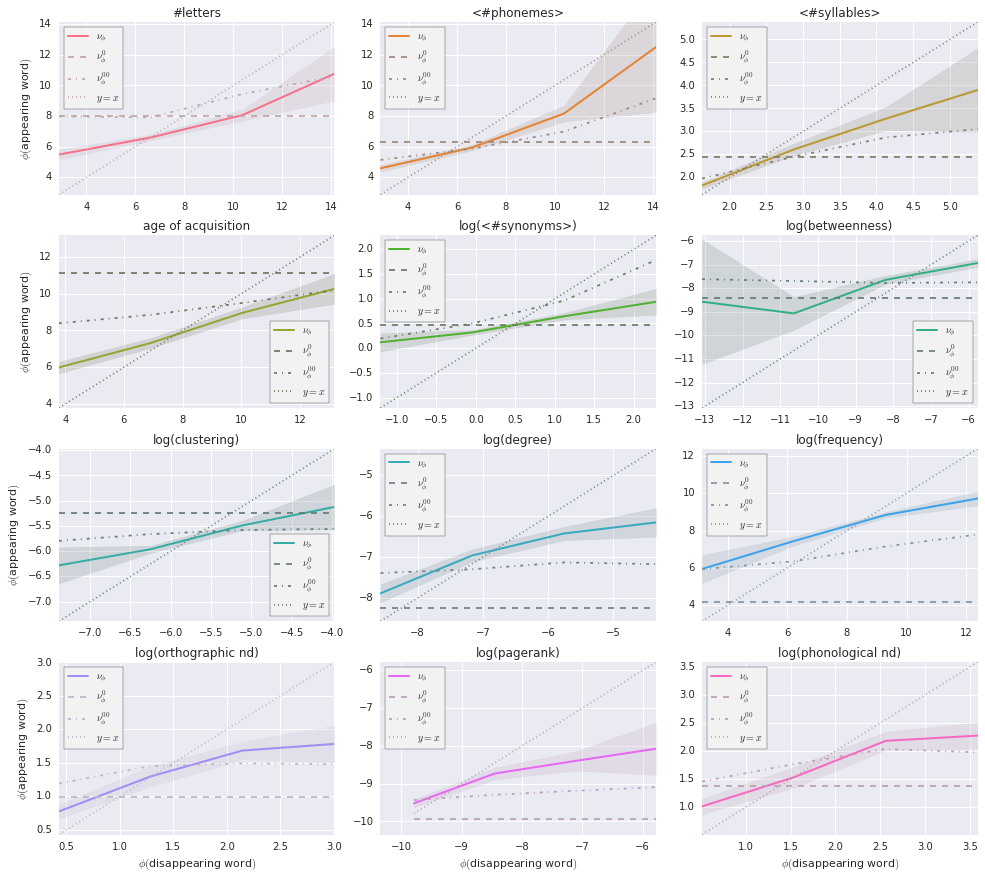

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

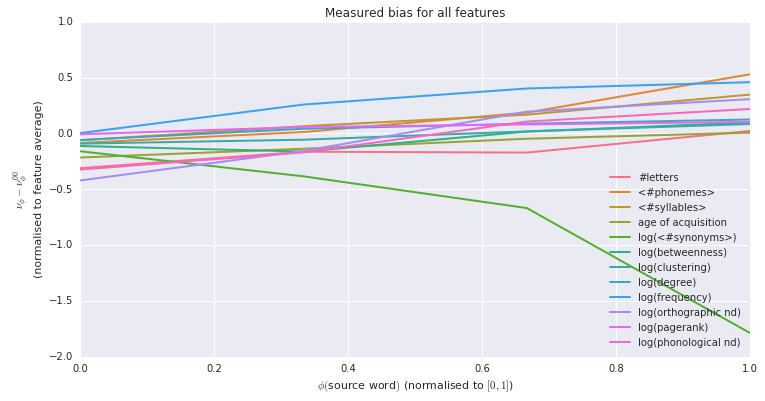

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | **  | *   |


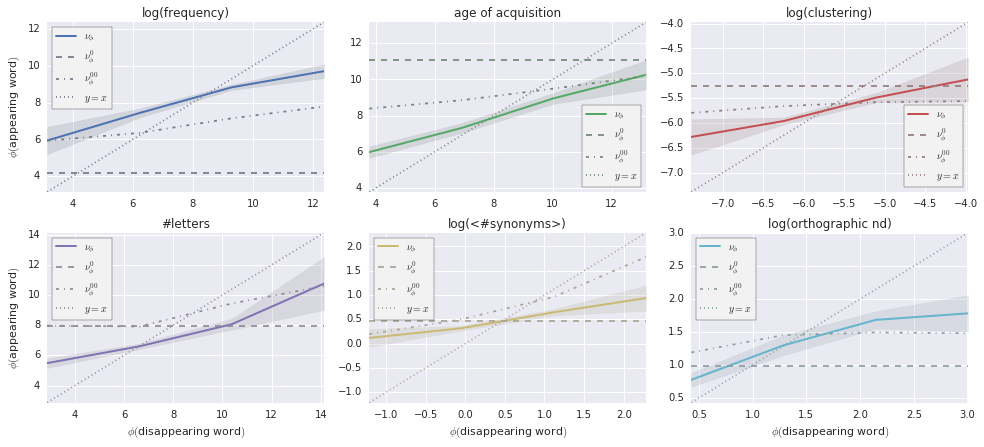

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

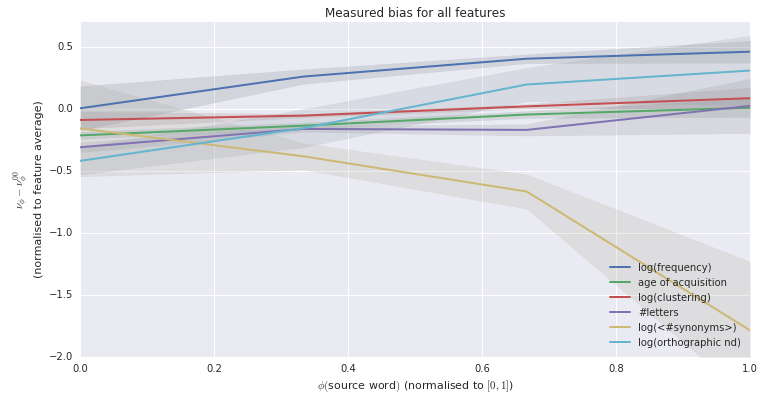

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | *** |
H_00 | *** | ns. | ns. | *** |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | ns. | *** |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | *** | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | **  | ns. | **  |


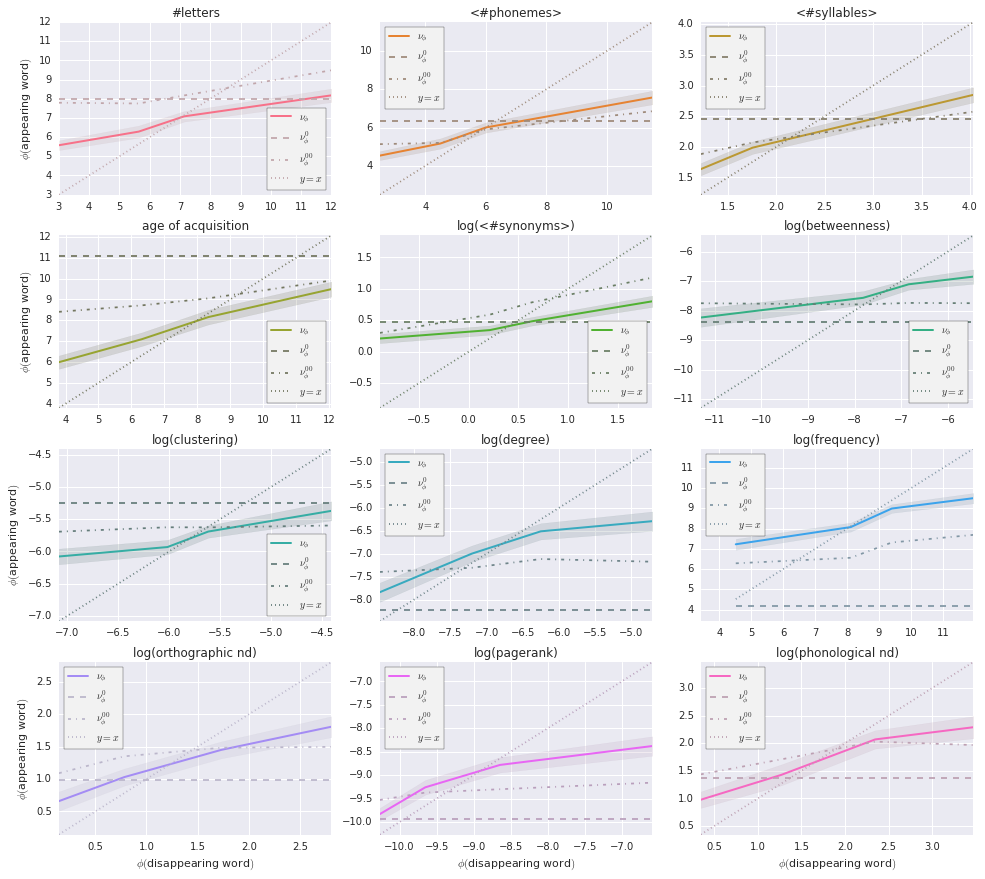

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

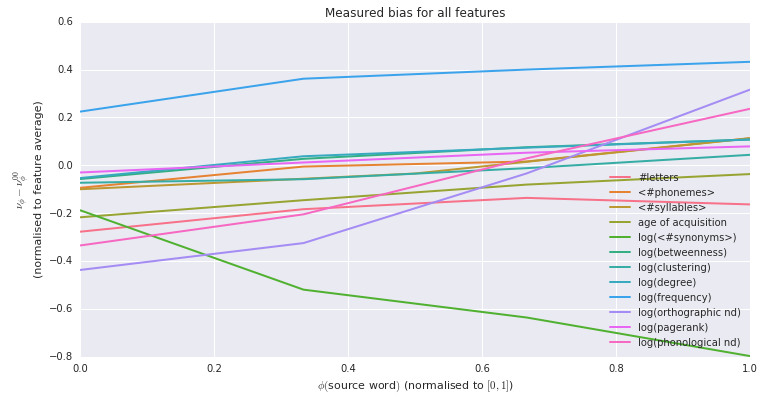

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | **  |



-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |


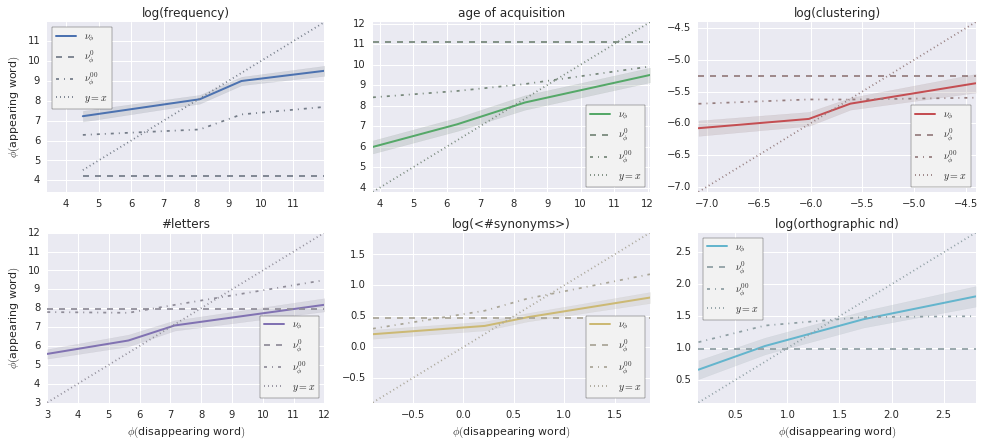

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

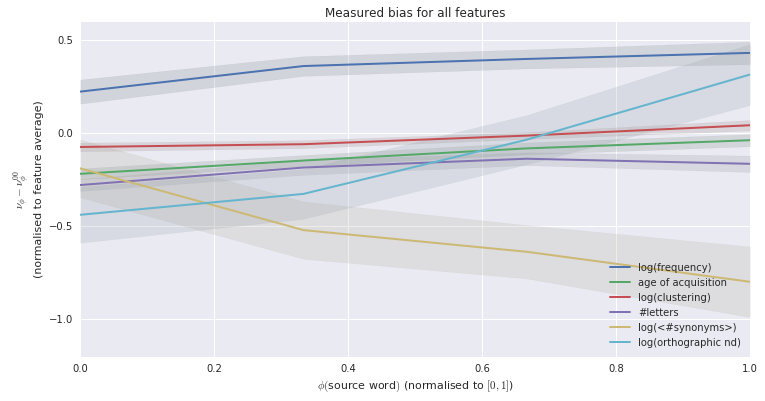

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *** | ns. | *** | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | **  | **  | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *** | *   | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | ns. | *   |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | *** | ns. | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | ns. | *** | ns. |
H_00 | *** | *** | *   | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | *** | **  |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | **  |
H_00 | *** | *** | ns. | ns. |


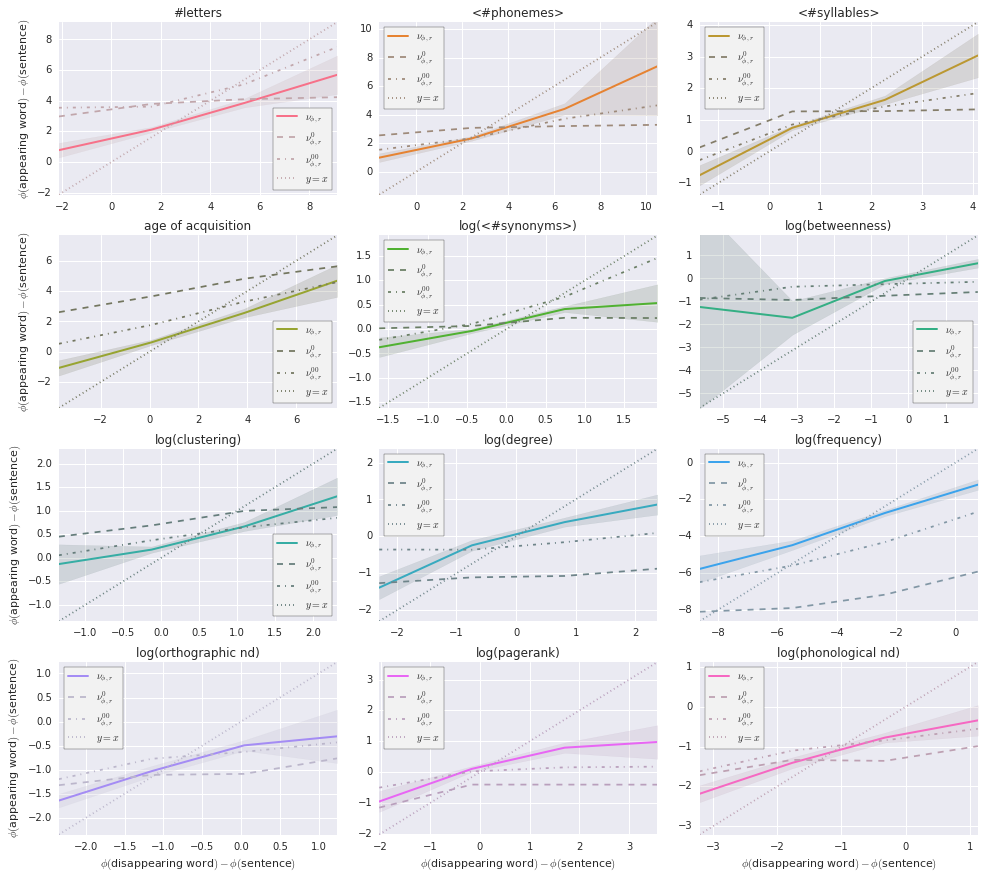

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

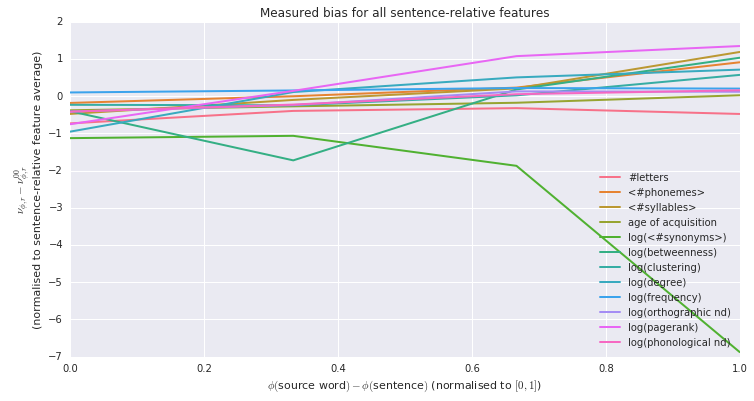

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | ns. | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *   |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | ns. |
H_00 | *** | *** | *   | ns. |


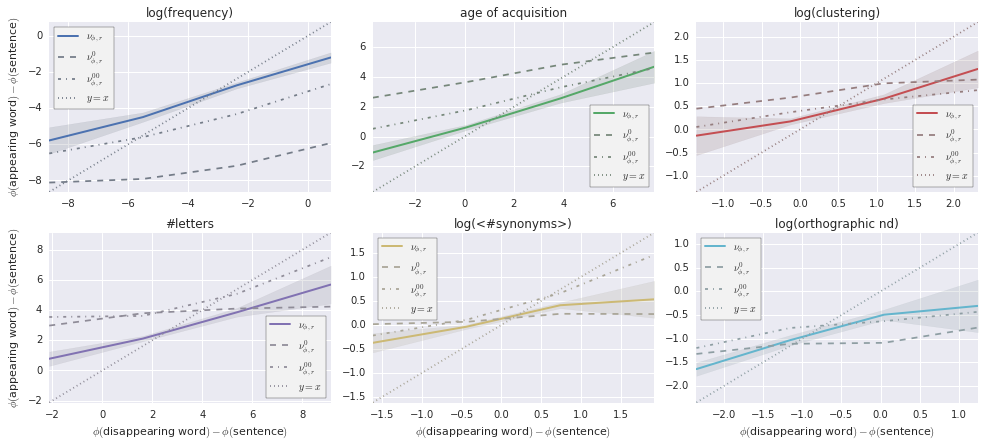

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

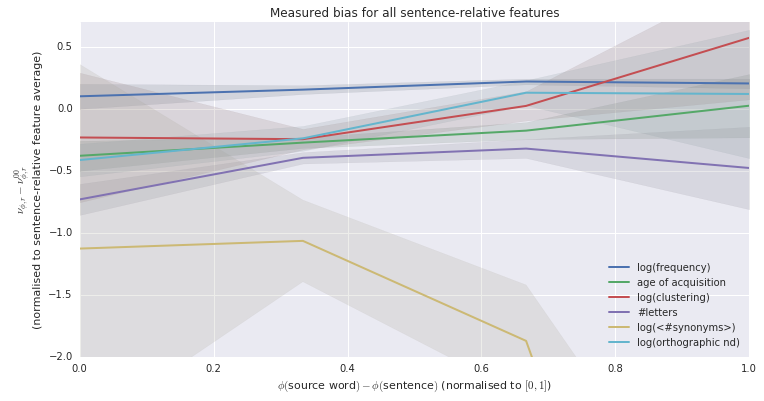

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *** |
H_00 | *** | ns. | ns. | *** |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | *** | ns. | *   | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | *   | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | *   | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *   |


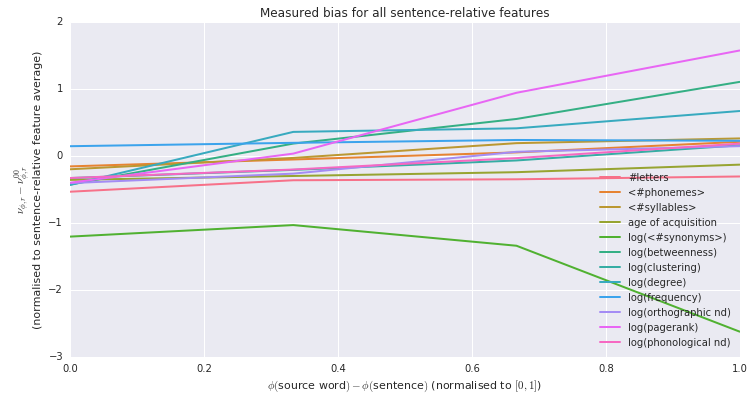

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *   |


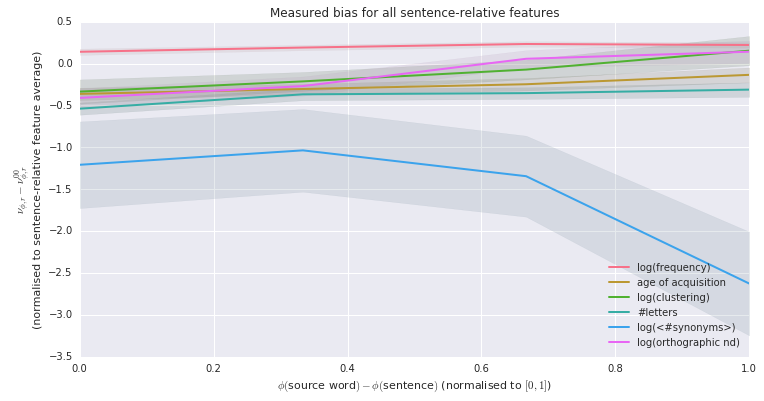

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


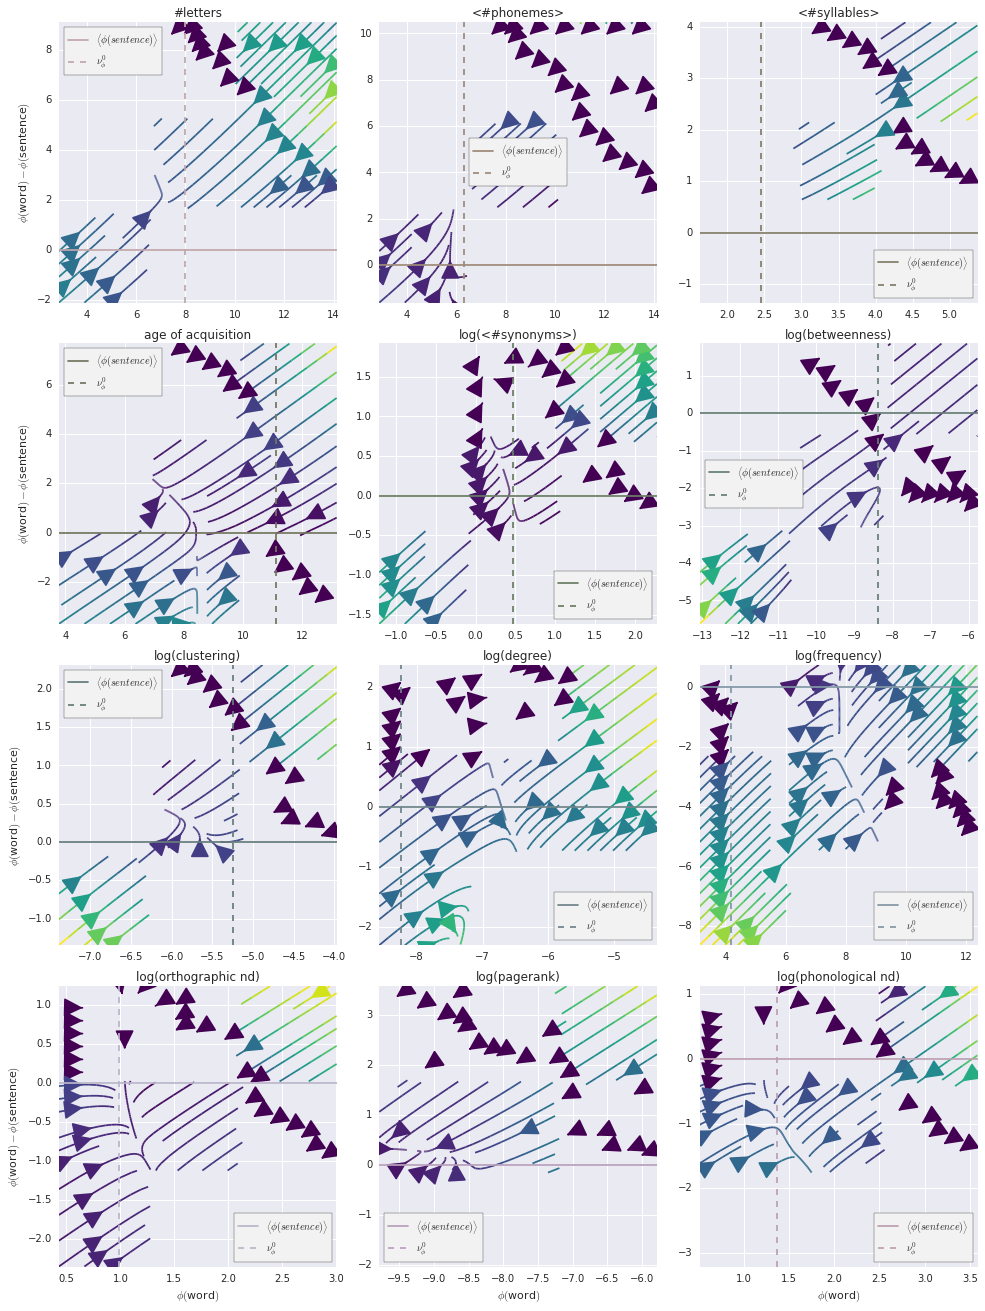

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


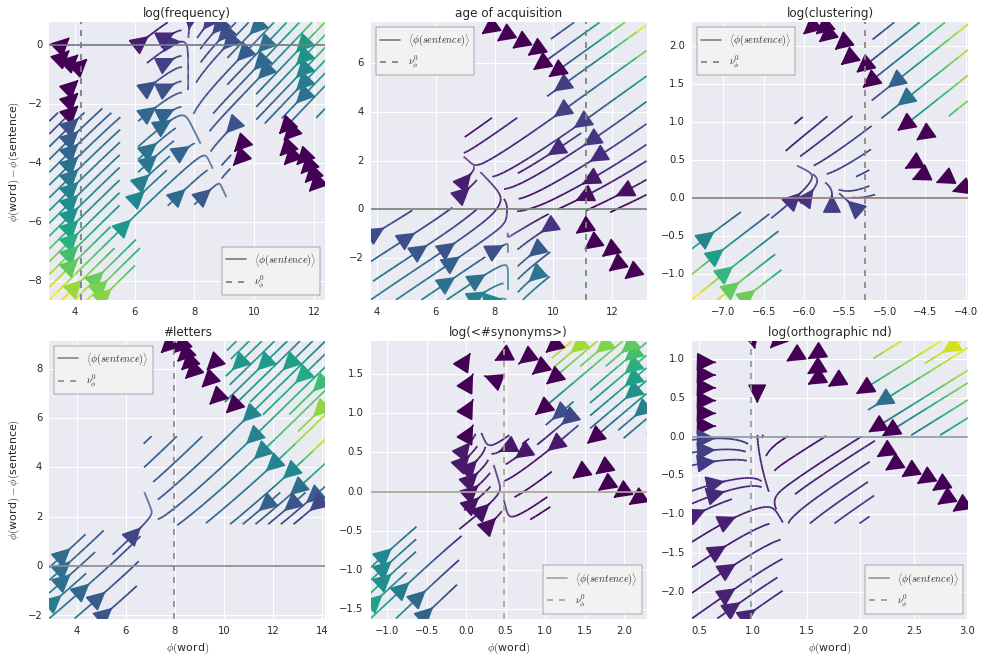

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53006544  0.17932205  0.08141898  0.07051413  0.03214494  0.030518
  0.02116978  0.01834918  0.01486674  0.00951714]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.520267     0.261026   -0.085568  0.229056   0.251848   
Component-1  0.326613    -0.400405    0.112798 -0.277205  -0.243586   
Component-2 -0.601661    -0.657915    0.102492 -0.198629   0.293584   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.428476              0.193606  0.262045       -0.386474   
Component-1      -0.428554              0.161222 -0.279969       -0.467448   
Component-2       0.143075              0.004068 -0.187559        0.074046   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.271120        -0.159254        0.000484  
Component-1              0.223314        -0.164824        0.022861  
Component-2             -0.054288         0.050142        0.048905

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 26478) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 26478) |              | Elapsed Time: 0:00:44 ETA: 1 day, 8:34:16

  0% (   35 of 26478) |                     | Elapsed Time: 0:00:44 ETA: 9:20:26

  0% (   59 of 26478) |                     | Elapsed Time: 0:00:44 ETA: 5:33:43

  0% (   83 of 26478) |                     | Elapsed Time: 0:00:44 ETA: 3:58:07

  0% (  107 of 26478) |                     | Elapsed Time: 0:00:45 ETA: 0:03:53

  0% (  131 of 26478) |                     | Elapsed Time: 0:00:45 ETA: 0:03:49

  0% (  156 of 26478) |                     | Elapsed Time: 0:00:45 ETA: 0:03:46

  0% (  180 of 26478) |                     | Elapsed Time: 0:00:45 ETA: 0:03:44

  0% (  204 of 26478) |                     | Elapsed Time: 0:00:45 ETA: 0:03:46

  0% (  228 of 26478) |                     | Elapsed Time: 0:00:46 ETA: 0:03:47

  0% (  252 of 26478) |                     | Elapsed Time: 0:00:46 ETA: 0:03:49

  1% (  276 of 26478) |                     | Elapsed Time: 0:00:46 ETA: 0:03:50

  1% (  299 of 26478) |                     | Elapsed Time: 0:00:46 ETA: 0:03:53

  1% (  331 of 26478) |                     | Elapsed Time: 0:00:47 ETA: 0:03:54

  1% (  355 of 26478) |                     | Elapsed Time: 0:00:47 ETA: 0:03:54

  1% (  378 of 26478) |                     | Elapsed Time: 0:00:47 ETA: 0:03:55

  1% (  401 of 26478) |                     | Elapsed Time: 0:00:47 ETA: 0:03:56

  1% (  426 of 26478) |                     | Elapsed Time: 0:00:47 ETA: 0:03:49

  1% (  451 of 26478) |                     | Elapsed Time: 0:00:48 ETA: 0:03:44

  1% (  478 of 26478) |                     | Elapsed Time: 0:00:48 ETA: 0:03:37

  1% (  505 of 26478) |                     | Elapsed Time: 0:00:48 ETA: 0:03:29

  1% (  528 of 26478) |                     | Elapsed Time: 0:00:48 ETA: 0:03:32

  2% (  553 of 26478) |                     | Elapsed Time: 0:00:48 ETA: 0:03:33

  2% (  579 of 26478) |                     | Elapsed Time: 0:00:49 ETA: 0:03:32

  2% (  606 of 26478) |                     | Elapsed Time: 0:00:49 ETA: 0:03:32

  2% (  633 of 26478) |                     | Elapsed Time: 0:00:49 ETA: 0:03:27

  2% (  662 of 26478) |                     | Elapsed Time: 0:00:49 ETA: 0:03:21

  2% (  688 of 26478) |                     | Elapsed Time: 0:00:50 ETA: 0:03:20

  2% (  715 of 26478) |                     | Elapsed Time: 0:00:50 ETA: 0:03:19

  2% (  742 of 26478) |                     | Elapsed Time: 0:00:50 ETA: 0:03:20

  2% (  769 of 26478) |                     | Elapsed Time: 0:00:50 ETA: 0:03:18

  3% (  797 of 26478) |                     | Elapsed Time: 0:00:50 ETA: 0:03:14

  3% (  824 of 26478) |                     | Elapsed Time: 0:00:51 ETA: 0:03:15

  3% (  850 of 26478) |                     | Elapsed Time: 0:00:51 ETA: 0:03:14

  3% (  878 of 26478) |                     | Elapsed Time: 0:00:51 ETA: 0:03:14

  3% (  902 of 26478) |                     | Elapsed Time: 0:00:51 ETA: 0:03:19

  3% (  928 of 26478) |                     | Elapsed Time: 0:00:51 ETA: 0:03:20

  3% (  959 of 26478) |                     | Elapsed Time: 0:00:52 ETA: 0:03:13

  3% (  993 of 26478) |                     | Elapsed Time: 0:00:52 ETA: 0:03:06

  3% ( 1025 of 26478) |                     | Elapsed Time: 0:00:52 ETA: 0:02:58

  3% ( 1057 of 26478) |                     | Elapsed Time: 0:00:52 ETA: 0:02:50

  4% ( 1090 of 26478) |                     | Elapsed Time: 0:00:52 ETA: 0:02:42

  4% ( 1125 of 26478) |                     | Elapsed Time: 0:00:53 ETA: 0:02:40

  4% ( 1158 of 26478) |                     | Elapsed Time: 0:00:53 ETA: 0:02:38

  4% ( 1191 of 26478) |                     | Elapsed Time: 0:00:53 ETA: 0:02:37

  4% ( 1224 of 26478) |                     | Elapsed Time: 0:00:53 ETA: 0:02:36

  4% ( 1239 of 26478) |                     | Elapsed Time: 0:00:53 ETA: 0:03:01

  4% ( 1253 of 26478) |                     | Elapsed Time: 0:00:54 ETA: 0:03:36

  4% ( 1267 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:23

  4% ( 1281 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:36

  4% ( 1295 of 26478) |#                    | Elapsed Time: 0:00:54 ETA: 0:06:32

  4% ( 1309 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:06:35

  5% ( 1324 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:06:37

  5% ( 1338 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:06:38

  5% ( 1352 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:06:38

  5% ( 1365 of 26478) |#                    | Elapsed Time: 0:00:55 ETA: 0:06:42

  5% ( 1379 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:06:41

  5% ( 1393 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:06:39

  5% ( 1407 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:06:38

  5% ( 1421 of 26478) |#                    | Elapsed Time: 0:00:56 ETA: 0:06:39

  5% ( 1435 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:06:36

  5% ( 1449 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:06:36

  5% ( 1463 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:06:36

  5% ( 1477 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:06:35

  5% ( 1491 of 26478) |#                    | Elapsed Time: 0:00:57 ETA: 0:06:30

  5% ( 1510 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:59

  5% ( 1524 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:58

  5% ( 1538 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:57

  5% ( 1552 of 26478) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:57

  5% ( 1566 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:59

  5% ( 1581 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:06:24

  6% ( 1595 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:06:26

  6% ( 1621 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:22

  6% ( 1655 of 26478) |#                    | Elapsed Time: 0:00:59 ETA: 0:04:31

  6% ( 1683 of 26478) |#                    | Elapsed Time: 0:01:00 ETA: 0:03:48

  6% ( 1712 of 26478) |#                    | Elapsed Time: 0:01:00 ETA: 0:03:19

  6% ( 1740 of 26478) |#                    | Elapsed Time: 0:01:00 ETA: 0:03:03

  6% ( 1768 of 26478) |#                    | Elapsed Time: 0:01:00 ETA: 0:03:02

  6% ( 1796 of 26478) |#                    | Elapsed Time: 0:01:01 ETA: 0:03:01

  6% ( 1824 of 26478) |#                    | Elapsed Time: 0:01:01 ETA: 0:03:03

  6% ( 1851 of 26478) |#                    | Elapsed Time: 0:01:01 ETA: 0:03:07

  7% ( 1877 of 26478) |#                    | Elapsed Time: 0:01:01 ETA: 0:03:10

  7% ( 1904 of 26478) |#                    | Elapsed Time: 0:01:01 ETA: 0:03:12

  7% ( 1933 of 26478) |#                    | Elapsed Time: 0:01:02 ETA: 0:03:09

  7% ( 1961 of 26478) |#                    | Elapsed Time: 0:01:02 ETA: 0:03:07

  7% ( 2000 of 26478) |#                    | Elapsed Time: 0:01:02 ETA: 0:03:03

  7% ( 2027 of 26478) |#                    | Elapsed Time: 0:01:02 ETA: 0:03:02

  7% ( 2054 of 26478) |#                    | Elapsed Time: 0:01:02 ETA: 0:03:02

  7% ( 2082 of 26478) |#                    | Elapsed Time: 0:01:03 ETA: 0:03:03

  7% ( 2110 of 26478) |#                    | Elapsed Time: 0:01:03 ETA: 0:03:03

  8% ( 2138 of 26478) |#                    | Elapsed Time: 0:01:03 ETA: 0:03:03

  8% ( 2166 of 26478) |#                    | Elapsed Time: 0:01:03 ETA: 0:03:01

  8% ( 2193 of 26478) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:02

  8% ( 2221 of 26478) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:03

  8% ( 2248 of 26478) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:04

  8% ( 2275 of 26478) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:05

  8% ( 2296 of 26478) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:15

  8% ( 2317 of 26478) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:41

  8% ( 2349 of 26478) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:32

  8% ( 2375 of 26478) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:34

  9% ( 2401 of 26478) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:29

  9% ( 2429 of 26478) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:10

  9% ( 2462 of 26478) |#                    | Elapsed Time: 0:01:06 ETA: 0:02:55

  9% ( 2481 of 26478) |#                    | Elapsed Time: 0:01:06 ETA: 0:03:10

  9% ( 2502 of 26478) |#                    | Elapsed Time: 0:01:06 ETA: 0:03:19

  9% ( 2524 of 26478) |##                   | Elapsed Time: 0:01:06 ETA: 0:03:26

  9% ( 2546 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:47

  9% ( 2568 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:04:03

  9% ( 2598 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:31

  9% ( 2618 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:37

  9% ( 2637 of 26478) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:44

 10% ( 2657 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:03:46

 10% ( 2677 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:09

 10% ( 2697 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:24

 10% ( 2717 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:24

 10% ( 2737 of 26478) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:22

 10% ( 2757 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:18

 10% ( 2777 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:15

 10% ( 2809 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:03:42

 10% ( 2836 of 26478) |##                   | Elapsed Time: 0:01:09 ETA: 0:03:26

 10% ( 2857 of 26478) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:23

 10% ( 2877 of 26478) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:21

 10% ( 2897 of 26478) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:30

 11% ( 2917 of 26478) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:58

 11% ( 2937 of 26478) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:03

 11% ( 2957 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:04

 11% ( 2979 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:06

 11% ( 2999 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:04

 11% ( 3019 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:06

 11% ( 3039 of 26478) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:05

 11% ( 3059 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:03

 11% ( 3079 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:05

 11% ( 3099 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:03

 11% ( 3119 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:03

 11% ( 3139 of 26478) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:03

 11% ( 3159 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:04

 12% ( 3179 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:02

 12% ( 3199 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:02

 12% ( 3219 of 26478) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:02

 12% ( 3239 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:02

 12% ( 3259 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:01

 12% ( 3279 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:01

 12% ( 3299 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:02

 12% ( 3321 of 26478) |##                   | Elapsed Time: 0:01:14 ETA: 0:03:59

 12% ( 3341 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:00

 12% ( 3361 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:00

 12% ( 3381 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:03:58

 12% ( 3401 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:03:58

 12% ( 3421 of 26478) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:00

 12% ( 3441 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:00

 13% ( 3461 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:03:59

 13% ( 3481 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:03:58

 13% ( 3501 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:03:58

 13% ( 3522 of 26478) |##                   | Elapsed Time: 0:01:16 ETA: 0:03:56

 13% ( 3552 of 26478) |##                   | Elapsed Time: 0:01:17 ETA: 0:03:54

 13% ( 3574 of 26478) |##                   | Elapsed Time: 0:01:17 ETA: 0:03:53

 13% ( 3595 of 26478) |##                   | Elapsed Time: 0:01:17 ETA: 0:03:51

 13% ( 3616 of 26478) |##                   | Elapsed Time: 0:01:17 ETA: 0:03:50

 13% ( 3641 of 26478) |##                   | Elapsed Time: 0:01:18 ETA: 0:03:49

 13% ( 3662 of 26478) |##                   | Elapsed Time: 0:01:18 ETA: 0:03:50

 13% ( 3682 of 26478) |##                   | Elapsed Time: 0:01:18 ETA: 0:03:50

 13% ( 3704 of 26478) |##                   | Elapsed Time: 0:01:18 ETA: 0:03:50

 14% ( 3725 of 26478) |##                   | Elapsed Time: 0:01:19 ETA: 0:03:50

 14% ( 3746 of 26478) |##                   | Elapsed Time: 0:01:19 ETA: 0:03:49

 14% ( 3767 of 26478) |##                   | Elapsed Time: 0:01:19 ETA: 0:03:48

 14% ( 3788 of 26478) |###                  | Elapsed Time: 0:01:19 ETA: 0:03:48

 14% ( 3809 of 26478) |###                  | Elapsed Time: 0:01:19 ETA: 0:03:48

 14% ( 3839 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:03:48

 14% ( 3861 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:03:47

 14% ( 3882 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:03:45

 14% ( 3904 of 26478) |###                  | Elapsed Time: 0:01:20 ETA: 0:03:42

 14% ( 3926 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:03:41

 14% ( 3947 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:03:42

 15% ( 3972 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:03:42

 15% ( 3992 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:03:47

 15% ( 4012 of 26478) |###                  | Elapsed Time: 0:01:21 ETA: 0:03:47

 15% ( 4033 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:03:46

 15% ( 4055 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:03:46

 15% ( 4076 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:03:46

 15% ( 4097 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:03:45

 15% ( 4118 of 26478) |###                  | Elapsed Time: 0:01:22 ETA: 0:03:45

 15% ( 4138 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:03:45

 15% ( 4159 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:03:45

 15% ( 4181 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:03:46

 15% ( 4202 of 26478) |###                  | Elapsed Time: 0:01:23 ETA: 0:03:46

 15% ( 4223 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:44

 16% ( 4244 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:44

 16% ( 4264 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:45

 16% ( 4284 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:46

 16% ( 4313 of 26478) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:48

 16% ( 4333 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:49

 16% ( 4353 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:49

 16% ( 4373 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:49

 16% ( 4393 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:49

 16% ( 4413 of 26478) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:49

 16% ( 4433 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:03:50

 16% ( 4453 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:03:48

 16% ( 4473 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:03:49

 16% ( 4497 of 26478) |###                  | Elapsed Time: 0:01:26 ETA: 0:03:39

 17% ( 4523 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:03:24

 17% ( 4550 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:03:10

 17% ( 4574 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:03:04

 17% ( 4599 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:02:57

 17% ( 4634 of 26478) |###                  | Elapsed Time: 0:01:27 ETA: 0:02:56

 17% ( 4658 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:03:00

 17% ( 4681 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:03:04

 17% ( 4700 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:03:11

 17% ( 4721 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:03:22

 17% ( 4744 of 26478) |###                  | Elapsed Time: 0:01:28 ETA: 0:03:28

 18% ( 4768 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:03:29

 18% ( 4790 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:03:29

 18% ( 4813 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:03:25

 18% ( 4831 of 26478) |###                  | Elapsed Time: 0:01:29 ETA: 0:03:24

 18% ( 4850 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:03:34

 18% ( 4874 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:03:28

 18% ( 4898 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:03:25

 18% ( 4922 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:03:19

 18% ( 4943 of 26478) |###                  | Elapsed Time: 0:01:30 ETA: 0:03:16

 18% ( 4977 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:03:08

 18% ( 4998 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:03:15

 18% ( 5015 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:03:29

 19% ( 5037 of 26478) |###                  | Elapsed Time: 0:01:31 ETA: 0:03:31

 19% ( 5062 of 26478) |####                 | Elapsed Time: 0:01:31 ETA: 0:03:27

 19% ( 5082 of 26478) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:33

 19% ( 5102 of 26478) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:31

 19% ( 5125 of 26478) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:24

 19% ( 5150 of 26478) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:22

 19% ( 5172 of 26478) |####                 | Elapsed Time: 0:01:33 ETA: 0:03:22

 19% ( 5199 of 26478) |####                 | Elapsed Time: 0:01:33 ETA: 0:03:12

 19% ( 5225 of 26478) |####                 | Elapsed Time: 0:01:33 ETA: 0:02:59

 19% ( 5250 of 26478) |####                 | Elapsed Time: 0:01:33 ETA: 0:02:59

 19% ( 5270 of 26478) |####                 | Elapsed Time: 0:01:33 ETA: 0:03:01

 20% ( 5296 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:03:05

 20% ( 5324 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:03:05

 20% ( 5352 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:59

 20% ( 5376 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:59

 20% ( 5402 of 26478) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:56

 20% ( 5425 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:02:57

 20% ( 5447 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:03:07

 20% ( 5471 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:03:06

 20% ( 5491 of 26478) |####                 | Elapsed Time: 0:01:35 ETA: 0:03:20

 20% ( 5511 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:28

 20% ( 5533 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:34

 20% ( 5557 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:25

 21% ( 5581 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:16

 21% ( 5608 of 26478) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:01

 21% ( 5639 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:02:55

 21% ( 5666 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:02:50

 21% ( 5691 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:02:48

 21% ( 5718 of 26478) |####                 | Elapsed Time: 0:01:37 ETA: 0:02:47

 21% ( 5743 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:02:48

 21% ( 5770 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:02:47

 21% ( 5794 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:02:46

 21% ( 5820 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:02:47

 22% ( 5845 of 26478) |####                 | Elapsed Time: 0:01:38 ETA: 0:02:51

 22% ( 5869 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:02:54

 22% ( 5895 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:02:59

 22% ( 5922 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:02:55

 22% ( 5958 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:02:52

 22% ( 5983 of 26478) |####                 | Elapsed Time: 0:01:39 ETA: 0:02:51

 22% ( 6009 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:02:45

 22% ( 6034 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:02:46

 22% ( 6058 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:02:48

 22% ( 6086 of 26478) |####                 | Elapsed Time: 0:01:40 ETA: 0:02:46

 23% ( 6112 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:02:44

 23% ( 6140 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:02:41

 23% ( 6167 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:02:38

 23% ( 6190 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:02:43

 23% ( 6216 of 26478) |####                 | Elapsed Time: 0:01:41 ETA: 0:02:45

 23% ( 6239 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:02:49

 23% ( 6263 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:02:55

 23% ( 6289 of 26478) |####                 | Elapsed Time: 0:01:42 ETA: 0:02:58

 23% ( 6315 of 26478) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:55

 23% ( 6341 of 26478) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:51

 24% ( 6367 of 26478) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:43

 24% ( 6393 of 26478) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:42

 24% ( 6419 of 26478) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:37

 24% ( 6445 of 26478) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:36

 24% ( 6471 of 26478) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:36

 24% ( 6496 of 26478) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:39

 24% ( 6518 of 26478) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:45

 24% ( 6543 of 26478) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:47

 24% ( 6566 of 26478) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:53

 24% ( 6592 of 26478) |#####                | Elapsed Time: 0:01:45 ETA: 0:02:51

 25% ( 6620 of 26478) |#####                | Elapsed Time: 0:01:45 ETA: 0:02:45

 25% ( 6644 of 26478) |#####                | Elapsed Time: 0:01:45 ETA: 0:02:48

 25% ( 6677 of 26478) |#####                | Elapsed Time: 0:01:45 ETA: 0:02:50

 25% ( 6704 of 26478) |#####                | Elapsed Time: 0:01:45 ETA: 0:02:50

 25% ( 6726 of 26478) |#####                | Elapsed Time: 0:01:46 ETA: 0:02:57

 25% ( 6741 of 26478) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:15

 25% ( 6764 of 26478) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:14

 25% ( 6785 of 26478) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:28

 25% ( 6811 of 26478) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:26

 25% ( 6825 of 26478) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:31

 25% ( 6844 of 26478) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:28

 25% ( 6870 of 26478) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:25

 26% ( 6894 of 26478) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:17

 26% ( 6918 of 26478) |#####                | Elapsed Time: 0:01:48 ETA: 0:03:09

 26% ( 6951 of 26478) |#####                | Elapsed Time: 0:01:48 ETA: 0:02:43

 26% ( 6975 of 26478) |#####                | Elapsed Time: 0:01:48 ETA: 0:02:45

 26% ( 7001 of 26478) |#####                | Elapsed Time: 0:01:48 ETA: 0:02:42

 26% ( 7026 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:02:40

 26% ( 7051 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:02:40

 26% ( 7070 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:02:48

 26% ( 7088 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:03:01

 26% ( 7116 of 26478) |#####                | Elapsed Time: 0:01:49 ETA: 0:02:56

 27% ( 7150 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:02:40

 27% ( 7181 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:02:30

 27% ( 7210 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:02:16

 27% ( 7241 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:02:05

 27% ( 7282 of 26478) |#####                | Elapsed Time: 0:01:50 ETA: 0:02:09

 27% ( 7312 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:02:13

 27% ( 7340 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:02:13

 27% ( 7368 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:02:16

 27% ( 7397 of 26478) |#####                | Elapsed Time: 0:01:51 ETA: 0:02:16

 28% ( 7425 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:02:17

 28% ( 7454 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:02:17

 28% ( 7482 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:02:17

 28% ( 7513 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:02:14

 28% ( 7546 of 26478) |#####                | Elapsed Time: 0:01:52 ETA: 0:02:09

 28% ( 7578 of 26478) |######               | Elapsed Time: 0:01:53 ETA: 0:02:05

 28% ( 7613 of 26478) |######               | Elapsed Time: 0:01:53 ETA: 0:02:01

 28% ( 7645 of 26478) |######               | Elapsed Time: 0:01:53 ETA: 0:01:58

 28% ( 7677 of 26478) |######               | Elapsed Time: 0:01:53 ETA: 0:01:58

 29% ( 7709 of 26478) |######               | Elapsed Time: 0:01:53 ETA: 0:01:59

 29% ( 7730 of 26478) |######               | Elapsed Time: 0:01:54 ETA: 0:02:09

 29% ( 7750 of 26478) |######               | Elapsed Time: 0:01:54 ETA: 0:02:25

 29% ( 7770 of 26478) |######               | Elapsed Time: 0:01:54 ETA: 0:02:43

 29% ( 7790 of 26478) |######               | Elapsed Time: 0:01:54 ETA: 0:03:06

 29% ( 7810 of 26478) |######               | Elapsed Time: 0:01:54 ETA: 0:03:23

 29% ( 7830 of 26478) |######               | Elapsed Time: 0:01:55 ETA: 0:03:22

 29% ( 7850 of 26478) |######               | Elapsed Time: 0:01:55 ETA: 0:03:21

 29% ( 7870 of 26478) |######               | Elapsed Time: 0:01:55 ETA: 0:03:19

 29% ( 7890 of 26478) |######               | Elapsed Time: 0:01:55 ETA: 0:03:18

 29% ( 7909 of 26478) |######               | Elapsed Time: 0:01:56 ETA: 0:03:19

 29% ( 7929 of 26478) |######               | Elapsed Time: 0:01:56 ETA: 0:03:21

 30% ( 7954 of 26478) |######               | Elapsed Time: 0:01:56 ETA: 0:03:21

 30% ( 7973 of 26478) |######               | Elapsed Time: 0:01:56 ETA: 0:03:23

 30% ( 7993 of 26478) |######               | Elapsed Time: 0:01:56 ETA: 0:03:23

 30% ( 8013 of 26478) |######               | Elapsed Time: 0:01:57 ETA: 0:03:22

 30% ( 8033 of 26478) |######               | Elapsed Time: 0:01:57 ETA: 0:03:21

 30% ( 8057 of 26478) |######               | Elapsed Time: 0:01:57 ETA: 0:03:09

 30% ( 8082 of 26478) |######               | Elapsed Time: 0:01:57 ETA: 0:02:57

 30% ( 8106 of 26478) |######               | Elapsed Time: 0:01:57 ETA: 0:02:47

 30% ( 8135 of 26478) |######               | Elapsed Time: 0:01:58 ETA: 0:02:32

 30% ( 8162 of 26478) |######               | Elapsed Time: 0:01:58 ETA: 0:02:23

 30% ( 8188 of 26478) |######               | Elapsed Time: 0:01:58 ETA: 0:02:25

 31% ( 8216 of 26478) |######               | Elapsed Time: 0:01:58 ETA: 0:02:19

 31% ( 8238 of 26478) |######               | Elapsed Time: 0:01:59 ETA: 0:02:23

 31% ( 8275 of 26478) |######               | Elapsed Time: 0:01:59 ETA: 0:02:25

 31% ( 8301 of 26478) |######               | Elapsed Time: 0:01:59 ETA: 0:02:27

 31% ( 8327 of 26478) |######               | Elapsed Time: 0:01:59 ETA: 0:02:28

 31% ( 8354 of 26478) |######               | Elapsed Time: 0:01:59 ETA: 0:02:23

 31% ( 8381 of 26478) |######               | Elapsed Time: 0:02:00 ETA: 0:02:23

 31% ( 8407 of 26478) |######               | Elapsed Time: 0:02:00 ETA: 0:02:20

 31% ( 8432 of 26478) |######               | Elapsed Time: 0:02:00 ETA: 0:02:21

 31% ( 8457 of 26478) |######               | Elapsed Time: 0:02:00 ETA: 0:02:25

 32% ( 8481 of 26478) |######               | Elapsed Time: 0:02:00 ETA: 0:02:27

 32% ( 8503 of 26478) |######               | Elapsed Time: 0:02:01 ETA: 0:02:36

 32% ( 8525 of 26478) |######               | Elapsed Time: 0:02:01 ETA: 0:02:41

 32% ( 8547 of 26478) |######               | Elapsed Time: 0:02:01 ETA: 0:02:45

 32% ( 8569 of 26478) |######               | Elapsed Time: 0:02:01 ETA: 0:02:49

 32% ( 8591 of 26478) |######               | Elapsed Time: 0:02:02 ETA: 0:02:51

 32% ( 8617 of 26478) |######               | Elapsed Time: 0:02:02 ETA: 0:02:51

 32% ( 8639 of 26478) |######               | Elapsed Time: 0:02:02 ETA: 0:02:53

 32% ( 8671 of 26478) |######               | Elapsed Time: 0:02:02 ETA: 0:02:36

 32% ( 8705 of 26478) |######               | Elapsed Time: 0:02:02 ETA: 0:02:20

 32% ( 8727 of 26478) |######               | Elapsed Time: 0:02:03 ETA: 0:02:18

 33% ( 8751 of 26478) |######               | Elapsed Time: 0:02:03 ETA: 0:02:14

 33% ( 8774 of 26478) |######               | Elapsed Time: 0:02:03 ETA: 0:02:18

 33% ( 8796 of 26478) |######               | Elapsed Time: 0:02:03 ETA: 0:02:30

 33% ( 8818 of 26478) |######               | Elapsed Time: 0:02:03 ETA: 0:02:41

 33% ( 8842 of 26478) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:38

 33% ( 8870 of 26478) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:32

 33% ( 8897 of 26478) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:25

 33% ( 8924 of 26478) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:20

 33% ( 8950 of 26478) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:15

 33% ( 8976 of 26478) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:13

 34% ( 9003 of 26478) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:16

 34% ( 9031 of 26478) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:15

 34% ( 9056 of 26478) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:16

 34% ( 9086 of 26478) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:12

 34% ( 9114 of 26478) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:10

 34% ( 9141 of 26478) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:12

 34% ( 9166 of 26478) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:13

 34% ( 9191 of 26478) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:16

 34% ( 9216 of 26478) |#######              | Elapsed Time: 0:02:07 ETA: 0:02:23

 34% ( 9241 of 26478) |#######              | Elapsed Time: 0:02:07 ETA: 0:02:23

 35% ( 9268 of 26478) |#######              | Elapsed Time: 0:02:07 ETA: 0:02:26

 35% ( 9298 of 26478) |#######              | Elapsed Time: 0:02:07 ETA: 0:02:20

 35% ( 9330 of 26478) |#######              | Elapsed Time: 0:02:07 ETA: 0:02:10

 35% ( 9363 of 26478) |#######              | Elapsed Time: 0:02:08 ETA: 0:02:02

 35% ( 9395 of 26478) |#######              | Elapsed Time: 0:02:08 ETA: 0:01:55

 35% ( 9429 of 26478) |#######              | Elapsed Time: 0:02:08 ETA: 0:01:48

 35% ( 9458 of 26478) |#######              | Elapsed Time: 0:02:08 ETA: 0:01:50

 35% ( 9488 of 26478) |#######              | Elapsed Time: 0:02:08 ETA: 0:01:52

 35% ( 9524 of 26478) |#######              | Elapsed Time: 0:02:09 ETA: 0:01:49

 36% ( 9560 of 26478) |#######              | Elapsed Time: 0:02:09 ETA: 0:01:46

 36% ( 9599 of 26478) |#######              | Elapsed Time: 0:02:09 ETA: 0:01:44

 36% ( 9635 of 26478) |#######              | Elapsed Time: 0:02:09 ETA: 0:01:37

 36% ( 9670 of 26478) |#######              | Elapsed Time: 0:02:10 ETA: 0:01:36

 36% ( 9704 of 26478) |#######              | Elapsed Time: 0:02:10 ETA: 0:01:37

 36% ( 9737 of 26478) |#######              | Elapsed Time: 0:02:10 ETA: 0:01:38

 36% ( 9771 of 26478) |#######              | Elapsed Time: 0:02:10 ETA: 0:01:39

 37% ( 9805 of 26478) |#######              | Elapsed Time: 0:02:10 ETA: 0:01:40

 37% ( 9838 of 26478) |#######              | Elapsed Time: 0:02:11 ETA: 0:01:41

 37% ( 9867 of 26478) |#######              | Elapsed Time: 0:02:11 ETA: 0:01:45

 37% ( 9895 of 26478) |#######              | Elapsed Time: 0:02:11 ETA: 0:01:49

 37% ( 9930 of 26478) |#######              | Elapsed Time: 0:02:11 ETA: 0:01:54

 37% ( 9950 of 26478) |#######              | Elapsed Time: 0:02:11 ETA: 0:02:10

 37% ( 9970 of 26478) |#######              | Elapsed Time: 0:02:12 ETA: 0:02:23

 37% ( 9988 of 26478) |#######              | Elapsed Time: 0:02:12 ETA: 0:02:36

 37% (10005 of 26478) |#######              | Elapsed Time: 0:02:12 ETA: 0:02:56

 37% (10021 of 26478) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:14

 37% (10037 of 26478) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:31

 37% (10058 of 26478) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:22

 38% (10087 of 26478) |########             | Elapsed Time: 0:02:13 ETA: 0:02:57

 38% (10114 of 26478) |########             | Elapsed Time: 0:02:13 ETA: 0:02:38

 38% (10132 of 26478) |########             | Elapsed Time: 0:02:13 ETA: 0:02:33

 38% (10152 of 26478) |########             | Elapsed Time: 0:02:14 ETA: 0:02:25

 38% (10172 of 26478) |########             | Elapsed Time: 0:02:14 ETA: 0:02:36

 38% (10192 of 26478) |########             | Elapsed Time: 0:02:14 ETA: 0:02:53

 38% (10212 of 26478) |########             | Elapsed Time: 0:02:14 ETA: 0:02:50

 38% (10232 of 26478) |########             | Elapsed Time: 0:02:14 ETA: 0:02:49

 38% (10251 of 26478) |########             | Elapsed Time: 0:02:15 ETA: 0:02:52

 38% (10273 of 26478) |########             | Elapsed Time: 0:02:15 ETA: 0:03:01

 38% (10299 of 26478) |########             | Elapsed Time: 0:02:15 ETA: 0:02:51

 38% (10323 of 26478) |########             | Elapsed Time: 0:02:15 ETA: 0:02:44

 39% (10346 of 26478) |########             | Elapsed Time: 0:02:16 ETA: 0:02:39

 39% (10376 of 26478) |########             | Elapsed Time: 0:02:16 ETA: 0:02:18

 39% (10401 of 26478) |########             | Elapsed Time: 0:02:16 ETA: 0:02:12

 39% (10423 of 26478) |########             | Elapsed Time: 0:02:16 ETA: 0:02:15

 39% (10449 of 26478) |########             | Elapsed Time: 0:02:16 ETA: 0:02:11

 39% (10471 of 26478) |########             | Elapsed Time: 0:02:17 ETA: 0:02:18

 39% (10495 of 26478) |########             | Elapsed Time: 0:02:17 ETA: 0:02:20

 39% (10519 of 26478) |########             | Elapsed Time: 0:02:17 ETA: 0:02:18

 39% (10535 of 26478) |########             | Elapsed Time: 0:02:17 ETA: 0:02:32

 39% (10556 of 26478) |########             | Elapsed Time: 0:02:17 ETA: 0:02:40

 40% (10592 of 26478) |########             | Elapsed Time: 0:02:18 ETA: 0:02:38

 40% (10622 of 26478) |########             | Elapsed Time: 0:02:18 ETA: 0:02:19

 40% (10656 of 26478) |########             | Elapsed Time: 0:02:18 ETA: 0:02:03

 40% (10690 of 26478) |########             | Elapsed Time: 0:02:18 ETA: 0:01:51

 40% (10724 of 26478) |########             | Elapsed Time: 0:02:19 ETA: 0:01:41

 40% (10757 of 26478) |########             | Elapsed Time: 0:02:19 ETA: 0:01:36

 40% (10789 of 26478) |########             | Elapsed Time: 0:02:19 ETA: 0:01:37

 40% (10820 of 26478) |########             | Elapsed Time: 0:02:19 ETA: 0:01:38

 40% (10845 of 26478) |########             | Elapsed Time: 0:02:19 ETA: 0:01:44

 41% (10872 of 26478) |########             | Elapsed Time: 0:02:20 ETA: 0:01:49

 41% (10886 of 26478) |########             | Elapsed Time: 0:02:20 ETA: 0:02:09

 41% (10899 of 26478) |########             | Elapsed Time: 0:02:20 ETA: 0:02:38

 41% (10912 of 26478) |########             | Elapsed Time: 0:02:20 ETA: 0:03:13

 41% (10929 of 26478) |########             | Elapsed Time: 0:02:21 ETA: 0:03:47

 41% (10942 of 26478) |########             | Elapsed Time: 0:02:21 ETA: 0:04:29

 41% (10956 of 26478) |########             | Elapsed Time: 0:02:21 ETA: 0:04:26

 41% (10977 of 26478) |########             | Elapsed Time: 0:02:21 ETA: 0:03:53

 41% (11009 of 26478) |########             | Elapsed Time: 0:02:21 ETA: 0:03:03

 41% (11041 of 26478) |########             | Elapsed Time: 0:02:22 ETA: 0:02:20

 41% (11072 of 26478) |########             | Elapsed Time: 0:02:22 ETA: 0:01:58

 41% (11104 of 26478) |########             | Elapsed Time: 0:02:22 ETA: 0:01:41

 42% (11125 of 26478) |########             | Elapsed Time: 0:02:22 ETA: 0:01:49

 42% (11145 of 26478) |########             | Elapsed Time: 0:02:22 ETA: 0:02:00

 42% (11165 of 26478) |########             | Elapsed Time: 0:02:23 ETA: 0:02:13

 42% (11185 of 26478) |########             | Elapsed Time: 0:02:23 ETA: 0:02:29

 42% (11207 of 26478) |########             | Elapsed Time: 0:02:23 ETA: 0:02:39

 42% (11229 of 26478) |########             | Elapsed Time: 0:02:23 ETA: 0:02:32

 42% (11254 of 26478) |########             | Elapsed Time: 0:02:24 ETA: 0:02:31

 42% (11277 of 26478) |########             | Elapsed Time: 0:02:24 ETA: 0:02:29

 42% (11305 of 26478) |########             | Elapsed Time: 0:02:24 ETA: 0:02:18

 42% (11337 of 26478) |########             | Elapsed Time: 0:02:24 ETA: 0:02:06

 42% (11362 of 26478) |#########            | Elapsed Time: 0:02:24 ETA: 0:02:02

 42% (11384 of 26478) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:57

 43% (11416 of 26478) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:52

 43% (11446 of 26478) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:51

 43% (11478 of 26478) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:49

 43% (11510 of 26478) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:38

 43% (11541 of 26478) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:38

 43% (11566 of 26478) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:42

 43% (11597 of 26478) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:47

 43% (11617 of 26478) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:57

 43% (11637 of 26478) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:09

 44% (11657 of 26478) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:16

 44% (11677 of 26478) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:26

 44% (11697 of 26478) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:30

 44% (11717 of 26478) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:31

 44% (11737 of 26478) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:31

 44% (11766 of 26478) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:18

 44% (11794 of 26478) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:07

 44% (11820 of 26478) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:01

 44% (11845 of 26478) |#########            | Elapsed Time: 0:02:28 ETA: 0:01:55

 44% (11873 of 26478) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:53

 44% (11901 of 26478) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:52

 45% (11927 of 26478) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:57

 45% (11955 of 26478) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:50

 45% (11988 of 26478) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:45

 45% (12022 of 26478) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:40

 45% (12047 of 26478) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:43

 45% (12077 of 26478) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:38

 45% (12105 of 26478) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:40

 45% (12126 of 26478) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:51

 45% (12145 of 26478) |#########            | Elapsed Time: 0:02:31 ETA: 0:02:01

 45% (12165 of 26478) |#########            | Elapsed Time: 0:02:31 ETA: 0:02:09

 46% (12185 of 26478) |#########            | Elapsed Time: 0:02:31 ETA: 0:02:22

 46% (12206 of 26478) |#########            | Elapsed Time: 0:02:31 ETA: 0:02:26

 46% (12228 of 26478) |#########            | Elapsed Time: 0:02:32 ETA: 0:02:23

 46% (12259 of 26478) |#########            | Elapsed Time: 0:02:32 ETA: 0:02:16

 46% (12284 of 26478) |#########            | Elapsed Time: 0:02:32 ETA: 0:02:10

 46% (12313 of 26478) |#########            | Elapsed Time: 0:02:32 ETA: 0:01:59

 46% (12342 of 26478) |#########            | Elapsed Time: 0:02:32 ETA: 0:01:51

 46% (12372 of 26478) |#########            | Elapsed Time: 0:02:33 ETA: 0:01:43

 46% (12403 of 26478) |#########            | Elapsed Time: 0:02:33 ETA: 0:01:38

 46% (12441 of 26478) |#########            | Elapsed Time: 0:02:33 ETA: 0:01:41

 47% (12467 of 26478) |#########            | Elapsed Time: 0:02:33 ETA: 0:01:43

 47% (12493 of 26478) |#########            | Elapsed Time: 0:02:34 ETA: 0:01:47

 47% (12519 of 26478) |#########            | Elapsed Time: 0:02:34 ETA: 0:01:51

 47% (12545 of 26478) |#########            | Elapsed Time: 0:02:34 ETA: 0:01:50

 47% (12578 of 26478) |#########            | Elapsed Time: 0:02:34 ETA: 0:01:47

 47% (12611 of 26478) |##########           | Elapsed Time: 0:02:34 ETA: 0:01:40

 47% (12632 of 26478) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:44

 47% (12659 of 26478) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:43

 47% (12692 of 26478) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:38

 48% (12720 of 26478) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:42

 48% (12749 of 26478) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:37

 48% (12777 of 26478) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:36

 48% (12805 of 26478) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:36

 48% (12833 of 26478) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:38

 48% (12861 of 26478) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:40

 48% (12888 of 26478) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:41

 48% (12923 of 26478) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:40

 48% (12951 of 26478) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:40

 49% (12979 of 26478) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:40

 49% (13007 of 26478) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:39

 49% (13034 of 26478) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:40

 49% (13064 of 26478) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:38

 49% (13097 of 26478) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:34

 49% (13121 of 26478) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:37

 49% (13143 of 26478) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:42

 49% (13163 of 26478) |##########           | Elapsed Time: 0:02:39 ETA: 0:01:50

 49% (13185 of 26478) |##########           | Elapsed Time: 0:02:39 ETA: 0:02:04

 49% (13206 of 26478) |##########           | Elapsed Time: 0:02:39 ETA: 0:02:14

 49% (13227 of 26478) |##########           | Elapsed Time: 0:02:39 ETA: 0:02:14

 50% (13250 of 26478) |##########           | Elapsed Time: 0:02:39 ETA: 0:02:12

 50% (13277 of 26478) |##########           | Elapsed Time: 0:02:40 ETA: 0:02:04

 50% (13307 of 26478) |##########           | Elapsed Time: 0:02:40 ETA: 0:01:53

 50% (13327 of 26478) |##########           | Elapsed Time: 0:02:40 ETA: 0:01:56

 50% (13351 of 26478) |##########           | Elapsed Time: 0:02:40 ETA: 0:01:53

 50% (13378 of 26478) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:48

 50% (13406 of 26478) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:48

 50% (13432 of 26478) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:49

 50% (13458 of 26478) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:40

 50% (13483 of 26478) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:43

 51% (13504 of 26478) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:50

 51% (13528 of 26478) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:52

 51% (13551 of 26478) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:55

 51% (13583 of 26478) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:55

 51% (13605 of 26478) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:56

 51% (13630 of 26478) |##########           | Elapsed Time: 0:02:43 ETA: 0:01:52

 51% (13658 of 26478) |##########           | Elapsed Time: 0:02:43 ETA: 0:01:47

 51% (13687 of 26478) |##########           | Elapsed Time: 0:02:43 ETA: 0:01:42

 51% (13715 of 26478) |##########           | Elapsed Time: 0:02:43 ETA: 0:01:38

 51% (13732 of 26478) |##########           | Elapsed Time: 0:02:44 ETA: 0:01:44

 51% (13756 of 26478) |##########           | Elapsed Time: 0:02:44 ETA: 0:01:46

 52% (13780 of 26478) |##########           | Elapsed Time: 0:02:44 ETA: 0:01:52

 52% (13803 of 26478) |##########           | Elapsed Time: 0:02:44 ETA: 0:01:59

 52% (13831 of 26478) |##########           | Elapsed Time: 0:02:44 ETA: 0:01:52

 52% (13857 of 26478) |##########           | Elapsed Time: 0:02:45 ETA: 0:01:45

 52% (13884 of 26478) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:41

 52% (13912 of 26478) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:40

 52% (13933 of 26478) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:45

 52% (13951 of 26478) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:56

 52% (13973 of 26478) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:59

 52% (14002 of 26478) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:56

 52% (14028 of 26478) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:53

 53% (14047 of 26478) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:52

 53% (14074 of 26478) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:44

 53% (14100 of 26478) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:44

 53% (14126 of 26478) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:44

 53% (14152 of 26478) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:41

 53% (14178 of 26478) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:37

 53% (14204 of 26478) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:38

 53% (14232 of 26478) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:37

 53% (14261 of 26478) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:35

 53% (14293 of 26478) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:29

 54% (14323 of 26478) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:27

 54% (14349 of 26478) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:26

 54% (14375 of 26478) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:27

 54% (14401 of 26478) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:31

 54% (14426 of 26478) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:37

 54% (14460 of 26478) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:30

 54% (14494 of 26478) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:24

 54% (14528 of 26478) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:19

 55% (14563 of 26478) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:15

 55% (14587 of 26478) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:19

 55% (14611 of 26478) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:25

 55% (14635 of 26478) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:32

 55% (14659 of 26478) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:40

 55% (14684 of 26478) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:39

 55% (14710 of 26478) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:38

 55% (14735 of 26478) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:37

 55% (14759 of 26478) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:37

 55% (14795 of 26478) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:37

 55% (14819 of 26478) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:38

 56% (14843 of 26478) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:38

 56% (14867 of 26478) |###########          | Elapsed Time: 0:02:53 ETA: 0:01:37

 56% (14894 of 26478) |###########          | Elapsed Time: 0:02:53 ETA: 0:01:37

 56% (14918 of 26478) |###########          | Elapsed Time: 0:02:53 ETA: 0:01:37

 56% (14942 of 26478) |###########          | Elapsed Time: 0:02:53 ETA: 0:01:37

 56% (14973 of 26478) |###########          | Elapsed Time: 0:02:53 ETA: 0:01:32

 56% (15004 of 26478) |###########          | Elapsed Time: 0:02:54 ETA: 0:01:26

 56% (15030 of 26478) |###########          | Elapsed Time: 0:02:54 ETA: 0:01:25

 56% (15063 of 26478) |###########          | Elapsed Time: 0:02:54 ETA: 0:01:19

 57% (15096 of 26478) |###########          | Elapsed Time: 0:02:54 ETA: 0:01:16

 57% (15128 of 26478) |###########          | Elapsed Time: 0:02:55 ETA: 0:01:14

 57% (15158 of 26478) |############         | Elapsed Time: 0:02:55 ETA: 0:01:14

 57% (15188 of 26478) |############         | Elapsed Time: 0:02:55 ETA: 0:01:13

 57% (15225 of 26478) |############         | Elapsed Time: 0:02:55 ETA: 0:01:15

 57% (15255 of 26478) |############         | Elapsed Time: 0:02:55 ETA: 0:01:16

 57% (15289 of 26478) |############         | Elapsed Time: 0:02:56 ETA: 0:01:14

 57% (15318 of 26478) |############         | Elapsed Time: 0:02:56 ETA: 0:01:15

 57% (15345 of 26478) |############         | Elapsed Time: 0:02:56 ETA: 0:01:17

 58% (15371 of 26478) |############         | Elapsed Time: 0:02:56 ETA: 0:01:18

 58% (15398 of 26478) |############         | Elapsed Time: 0:02:56 ETA: 0:01:23

 58% (15420 of 26478) |############         | Elapsed Time: 0:02:57 ETA: 0:01:29

 58% (15442 of 26478) |############         | Elapsed Time: 0:02:57 ETA: 0:01:35

 58% (15461 of 26478) |############         | Elapsed Time: 0:02:57 ETA: 0:01:41

 58% (15479 of 26478) |############         | Elapsed Time: 0:02:57 ETA: 0:01:48

 58% (15495 of 26478) |############         | Elapsed Time: 0:02:57 ETA: 0:02:00

 58% (15519 of 26478) |############         | Elapsed Time: 0:02:58 ETA: 0:01:57

 58% (15556 of 26478) |############         | Elapsed Time: 0:02:58 ETA: 0:01:41

 58% (15586 of 26478) |############         | Elapsed Time: 0:02:58 ETA: 0:01:30

 58% (15615 of 26478) |############         | Elapsed Time: 0:02:58 ETA: 0:01:21

 59% (15644 of 26478) |############         | Elapsed Time: 0:02:59 ETA: 0:01:14

 59% (15675 of 26478) |############         | Elapsed Time: 0:02:59 ETA: 0:01:14

 59% (15709 of 26478) |############         | Elapsed Time: 0:02:59 ETA: 0:01:13

 59% (15743 of 26478) |############         | Elapsed Time: 0:02:59 ETA: 0:01:10

 59% (15777 of 26478) |############         | Elapsed Time: 0:02:59 ETA: 0:01:07

 59% (15811 of 26478) |############         | Elapsed Time: 0:03:00 ETA: 0:01:05

 59% (15845 of 26478) |############         | Elapsed Time: 0:03:00 ETA: 0:01:04

 60% (15887 of 26478) |############         | Elapsed Time: 0:03:00 ETA: 0:01:03

 60% (15921 of 26478) |############         | Elapsed Time: 0:03:00 ETA: 0:01:03

 60% (15955 of 26478) |############         | Elapsed Time: 0:03:00 ETA: 0:01:03

 60% (15989 of 26478) |############         | Elapsed Time: 0:03:01 ETA: 0:01:03

 60% (16023 of 26478) |############         | Elapsed Time: 0:03:01 ETA: 0:01:02

 60% (16057 of 26478) |############         | Elapsed Time: 0:03:01 ETA: 0:01:02

 60% (16091 of 26478) |############         | Elapsed Time: 0:03:01 ETA: 0:01:02

 60% (16117 of 26478) |############         | Elapsed Time: 0:03:01 ETA: 0:01:05

 60% (16145 of 26478) |############         | Elapsed Time: 0:03:02 ETA: 0:01:08

 61% (16173 of 26478) |############         | Elapsed Time: 0:03:02 ETA: 0:01:12

 61% (16197 of 26478) |############         | Elapsed Time: 0:03:02 ETA: 0:01:18

 61% (16231 of 26478) |############         | Elapsed Time: 0:03:02 ETA: 0:01:23

 61% (16256 of 26478) |############         | Elapsed Time: 0:03:03 ETA: 0:01:24

 61% (16283 of 26478) |############         | Elapsed Time: 0:03:03 ETA: 0:01:25

 61% (16308 of 26478) |############         | Elapsed Time: 0:03:03 ETA: 0:01:25

 61% (16334 of 26478) |############         | Elapsed Time: 0:03:03 ETA: 0:01:23

 61% (16360 of 26478) |############         | Elapsed Time: 0:03:03 ETA: 0:01:21

 61% (16385 of 26478) |############         | Elapsed Time: 0:03:04 ETA: 0:01:22

 61% (16409 of 26478) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:24

 62% (16432 of 26478) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:26

 62% (16457 of 26478) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:26

 62% (16485 of 26478) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:23

 62% (16517 of 26478) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:17

 62% (16549 of 26478) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:11

 62% (16580 of 26478) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:07

 62% (16614 of 26478) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:03

 62% (16646 of 26478) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:03

 62% (16675 of 26478) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:04

 63% (16705 of 26478) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:05

 63% (16734 of 26478) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:07

 63% (16764 of 26478) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:08

 63% (16796 of 26478) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:07

 63% (16818 of 26478) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:10

 63% (16842 of 26478) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:13

 63% (16880 of 26478) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:13

 63% (16908 of 26478) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:15

 64% (16950 of 26478) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:11

 64% (16979 of 26478) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:09

 64% (17002 of 26478) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:11

 64% (17026 of 26478) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:14

 64% (17055 of 26478) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:13

 64% (17087 of 26478) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:11

 64% (17115 of 26478) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:09

 64% (17140 of 26478) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:09

 64% (17163 of 26478) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:12

 64% (17194 of 26478) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:10

 65% (17221 of 26478) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:16

 65% (17242 of 26478) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:18

 65% (17270 of 26478) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:16

 65% (17295 of 26478) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:17

 65% (17320 of 26478) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:18

 65% (17346 of 26478) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:13

 65% (17370 of 26478) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:14

 65% (17394 of 26478) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:15

 65% (17410 of 26478) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:22

 65% (17439 of 26478) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:19

 65% (17473 of 26478) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:13

 66% (17508 of 26478) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:08

 66% (17542 of 26478) |#############        | Elapsed Time: 0:03:12 ETA: 0:00:59

 66% (17574 of 26478) |#############        | Elapsed Time: 0:03:13 ETA: 0:00:54

 66% (17607 of 26478) |#############        | Elapsed Time: 0:03:13 ETA: 0:00:54

 66% (17635 of 26478) |#############        | Elapsed Time: 0:03:13 ETA: 0:00:57

 66% (17661 of 26478) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:00

 66% (17686 of 26478) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:03

 66% (17713 of 26478) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:07

 66% (17740 of 26478) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:08

 67% (17767 of 26478) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:08

 67% (17791 of 26478) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:09

 67% (17815 of 26478) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:10

 67% (17839 of 26478) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:11

 67% (17873 of 26478) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:13

 67% (17899 of 26478) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:10

 67% (17925 of 26478) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:09

 67% (17951 of 26478) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:08

 67% (17976 of 26478) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:07

 67% (18002 of 26478) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:09

 68% (18028 of 26478) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:09

 68% (18058 of 26478) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:06

 68% (18078 of 26478) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:08

 68% (18094 of 26478) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:15

 68% (18110 of 26478) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:23

 68% (18135 of 26478) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:27

 68% (18159 of 26478) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:28

 68% (18179 of 26478) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:26

 68% (18217 of 26478) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:15

 68% (18243 of 26478) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:11

 69% (18270 of 26478) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:10

 69% (18297 of 26478) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:05

 69% (18324 of 26478) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:03

 69% (18344 of 26478) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:06

 69% (18370 of 26478) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:05

 69% (18398 of 26478) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:05

 69% (18428 of 26478) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:03

 69% (18461 of 26478) |##############       | Elapsed Time: 0:03:20 ETA: 0:00:58

 69% (18490 of 26478) |##############       | Elapsed Time: 0:03:20 ETA: 0:00:55

 69% (18516 of 26478) |##############       | Elapsed Time: 0:03:20 ETA: 0:00:55

 70% (18550 of 26478) |##############       | Elapsed Time: 0:03:20 ETA: 0:00:55

 70% (18574 of 26478) |##############       | Elapsed Time: 0:03:21 ETA: 0:00:58

 70% (18599 of 26478) |##############       | Elapsed Time: 0:03:21 ETA: 0:01:01

 70% (18629 of 26478) |##############       | Elapsed Time: 0:03:21 ETA: 0:00:59

 70% (18658 of 26478) |##############       | Elapsed Time: 0:03:21 ETA: 0:00:58

 70% (18688 of 26478) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:56

 70% (18714 of 26478) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:56

 70% (18734 of 26478) |##############       | Elapsed Time: 0:03:22 ETA: 0:01:00

 70% (18766 of 26478) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:59

 70% (18796 of 26478) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:59

 71% (18826 of 26478) |##############       | Elapsed Time: 0:03:23 ETA: 0:00:58

 71% (18866 of 26478) |##############       | Elapsed Time: 0:03:23 ETA: 0:00:51

 71% (18892 of 26478) |##############       | Elapsed Time: 0:03:23 ETA: 0:00:53

 71% (18916 of 26478) |###############      | Elapsed Time: 0:03:23 ETA: 0:00:55

 71% (18942 of 26478) |###############      | Elapsed Time: 0:03:23 ETA: 0:00:57

 71% (18968 of 26478) |###############      | Elapsed Time: 0:03:24 ETA: 0:00:59

 71% (18994 of 26478) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:01

 71% (19020 of 26478) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:01

 71% (19046 of 26478) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:00

 72% (19071 of 26478) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:01

 72% (19085 of 26478) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:08

 72% (19105 of 26478) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:12

 72% (19124 of 26478) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:17

 72% (19146 of 26478) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:20

 72% (19168 of 26478) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:17

 72% (19197 of 26478) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:10

 72% (19224 of 26478) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:06

 72% (19245 of 26478) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:06

 72% (19271 of 26478) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:04

 72% (19292 of 26478) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:04

 72% (19314 of 26478) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:06

 73% (19337 of 26478) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:06

 73% (19368 of 26478) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:03

 73% (19404 of 26478) |###############      | Elapsed Time: 0:03:28 ETA: 0:00:54

 73% (19439 of 26478) |###############      | Elapsed Time: 0:03:28 ETA: 0:00:48

 73% (19459 of 26478) |###############      | Elapsed Time: 0:03:28 ETA: 0:00:49

 73% (19473 of 26478) |###############      | Elapsed Time: 0:03:28 ETA: 0:00:54

 73% (19487 of 26478) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:08

 73% (19501 of 26478) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:28

 73% (19515 of 26478) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:52

 73% (19543 of 26478) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:35

 73% (19574 of 26478) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:17

 74% (19602 of 26478) |###############      | Elapsed Time: 0:03:30 ETA: 0:01:05

 74% (19633 of 26478) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:55

 74% (19662 of 26478) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:48

 74% (19692 of 26478) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:47

 74% (19721 of 26478) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:47

 74% (19750 of 26478) |###############      | Elapsed Time: 0:03:31 ETA: 0:00:47

 74% (19765 of 26478) |###############      | Elapsed Time: 0:03:31 ETA: 0:00:54

 74% (19780 of 26478) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:02

 74% (19810 of 26478) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:01

 74% (19838 of 26478) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:03

 75% (19869 of 26478) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:59

 75% (19889 of 26478) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:55

 75% (19913 of 26478) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:55

 75% (19937 of 26478) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:57

 75% (19961 of 26478) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:59

 75% (19986 of 26478) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:55

 75% (20013 of 26478) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:54

 75% (20046 of 26478) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:49

 75% (20070 of 26478) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:50

 75% (20096 of 26478) |###############      | Elapsed Time: 0:03:34 ETA: 0:00:48

 76% (20126 of 26478) |###############      | Elapsed Time: 0:03:34 ETA: 0:00:47

 76% (20154 of 26478) |###############      | Elapsed Time: 0:03:34 ETA: 0:00:48

 76% (20190 of 26478) |################     | Elapsed Time: 0:03:34 ETA: 0:00:45

 76% (20218 of 26478) |################     | Elapsed Time: 0:03:34 ETA: 0:00:43

 76% (20239 of 26478) |################     | Elapsed Time: 0:03:35 ETA: 0:00:46

 76% (20256 of 26478) |################     | Elapsed Time: 0:03:35 ETA: 0:00:51

 76% (20276 of 26478) |################     | Elapsed Time: 0:03:35 ETA: 0:00:56

 76% (20299 of 26478) |################     | Elapsed Time: 0:03:35 ETA: 0:01:01

 76% (20323 of 26478) |################     | Elapsed Time: 0:03:35 ETA: 0:01:02

 76% (20348 of 26478) |################     | Elapsed Time: 0:03:36 ETA: 0:00:57

 76% (20367 of 26478) |################     | Elapsed Time: 0:03:36 ETA: 0:00:57

 76% (20386 of 26478) |################     | Elapsed Time: 0:03:36 ETA: 0:00:58

 77% (20411 of 26478) |################     | Elapsed Time: 0:03:36 ETA: 0:00:57

 77% (20435 of 26478) |################     | Elapsed Time: 0:03:37 ETA: 0:00:58

 77% (20468 of 26478) |################     | Elapsed Time: 0:03:37 ETA: 0:00:50

 77% (20497 of 26478) |################     | Elapsed Time: 0:03:37 ETA: 0:00:45

 77% (20521 of 26478) |################     | Elapsed Time: 0:03:37 ETA: 0:00:46

 77% (20534 of 26478) |################     | Elapsed Time: 0:03:37 ETA: 0:00:50

 77% (20547 of 26478) |################     | Elapsed Time: 0:03:38 ETA: 0:00:59

 77% (20567 of 26478) |################     | Elapsed Time: 0:03:38 ETA: 0:01:08

 77% (20603 of 26478) |################     | Elapsed Time: 0:03:38 ETA: 0:00:58

 77% (20639 of 26478) |################     | Elapsed Time: 0:03:38 ETA: 0:00:50

 78% (20674 of 26478) |################     | Elapsed Time: 0:03:38 ETA: 0:00:40

 78% (20706 of 26478) |################     | Elapsed Time: 0:03:39 ETA: 0:00:34

 78% (20735 of 26478) |################     | Elapsed Time: 0:03:39 ETA: 0:00:35

 78% (20766 of 26478) |################     | Elapsed Time: 0:03:39 ETA: 0:00:36

 78% (20795 of 26478) |################     | Elapsed Time: 0:03:39 ETA: 0:00:38

 78% (20825 of 26478) |################     | Elapsed Time: 0:03:39 ETA: 0:00:39

 78% (20852 of 26478) |################     | Elapsed Time: 0:03:40 ETA: 0:00:41

 78% (20875 of 26478) |################     | Elapsed Time: 0:03:40 ETA: 0:00:43

 78% (20899 of 26478) |################     | Elapsed Time: 0:03:40 ETA: 0:00:44

 79% (20923 of 26478) |################     | Elapsed Time: 0:03:40 ETA: 0:00:46

 79% (20952 of 26478) |################     | Elapsed Time: 0:03:41 ETA: 0:00:46

 79% (20971 of 26478) |################     | Elapsed Time: 0:03:41 ETA: 0:00:48

 79% (20992 of 26478) |################     | Elapsed Time: 0:03:41 ETA: 0:00:49

 79% (21020 of 26478) |################     | Elapsed Time: 0:03:41 ETA: 0:00:47

 79% (21046 of 26478) |################     | Elapsed Time: 0:03:41 ETA: 0:00:47

 79% (21073 of 26478) |################     | Elapsed Time: 0:03:42 ETA: 0:00:46

 79% (21103 of 26478) |################     | Elapsed Time: 0:03:42 ETA: 0:00:41

 79% (21127 of 26478) |################     | Elapsed Time: 0:03:42 ETA: 0:00:41

 79% (21153 of 26478) |################     | Elapsed Time: 0:03:42 ETA: 0:00:42

 80% (21183 of 26478) |################     | Elapsed Time: 0:03:42 ETA: 0:00:41

 80% (21207 of 26478) |################     | Elapsed Time: 0:03:43 ETA: 0:00:43

 80% (21222 of 26478) |################     | Elapsed Time: 0:03:43 ETA: 0:00:47

 80% (21243 of 26478) |################     | Elapsed Time: 0:03:43 ETA: 0:00:50

 80% (21270 of 26478) |################     | Elapsed Time: 0:03:43 ETA: 0:00:49

 80% (21302 of 26478) |################     | Elapsed Time: 0:03:44 ETA: 0:00:45

 80% (21333 of 26478) |################     | Elapsed Time: 0:03:44 ETA: 0:00:40

 80% (21363 of 26478) |################     | Elapsed Time: 0:03:44 ETA: 0:00:36

 80% (21391 of 26478) |################     | Elapsed Time: 0:03:44 ETA: 0:00:34

 80% (21419 of 26478) |################     | Elapsed Time: 0:03:44 ETA: 0:00:34

 80% (21443 of 26478) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:38

 81% (21455 of 26478) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:46

 81% (21482 of 26478) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:47

 81% (21504 of 26478) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:49

 81% (21525 of 26478) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:51

 81% (21551 of 26478) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:49

 81% (21570 of 26478) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:45

 81% (21587 of 26478) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:49

 81% (21620 of 26478) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:44

 81% (21656 of 26478) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:37

 81% (21671 of 26478) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:41

 81% (21692 of 26478) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:40

 82% (21714 of 26478) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:40

 82% (21736 of 26478) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:46

 82% (21760 of 26478) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:46

 82% (21787 of 26478) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:41

 82% (21818 of 26478) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:38

 82% (21861 of 26478) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:34

 82% (21883 of 26478) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:34

 82% (21913 of 26478) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:33

 82% (21936 of 26478) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:34

 82% (21968 of 26478) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:33

 83% (22004 of 26478) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:31

 83% (22035 of 26478) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:30

 83% (22066 of 26478) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:29

 83% (22099 of 26478) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:27

 83% (22133 of 26478) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:27

 83% (22145 of 26478) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:33

 83% (22158 of 26478) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:39

 83% (22176 of 26478) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:44

 83% (22194 of 26478) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:54

 83% (22210 of 26478) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:58

 83% (22226 of 26478) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:54

 84% (22254 of 26478) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:45

 84% (22287 of 26478) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:39

 84% (22315 of 26478) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:34

 84% (22345 of 26478) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:30

 84% (22367 of 26478) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:29

 84% (22380 of 26478) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:34

 84% (22392 of 26478) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:42

 84% (22406 of 26478) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:49

 84% (22426 of 26478) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:58

 84% (22469 of 26478) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:42

 85% (22507 of 26478) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:35

 85% (22537 of 26478) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:29

 85% (22571 of 26478) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:26

 85% (22584 of 26478) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:30

 85% (22620 of 26478) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:28

 85% (22651 of 26478) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:28

 85% (22673 of 26478) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:30

 85% (22692 of 26478) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:31

 85% (22723 of 26478) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:28

 85% (22756 of 26478) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:29

 86% (22784 of 26478) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:27

 86% (22807 of 26478) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:28

 86% (22838 of 26478) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:27

 86% (22865 of 26478) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:28

 86% (22890 of 26478) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:29

 86% (22925 of 26478) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:26

 86% (22955 of 26478) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:24

 86% (22984 of 26478) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:24

 86% (22998 of 26478) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:26

 86% (23023 of 26478) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:27

 87% (23045 of 26478) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:30

 87% (23073 of 26478) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:30

 87% (23102 of 26478) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:28

 87% (23127 of 26478) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:27

 87% (23151 of 26478) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:26

 87% (23182 of 26478) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:25

 87% (23214 of 26478) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:25

 87% (23243 of 26478) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:25

 87% (23270 of 26478) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:23

 88% (23301 of 26478) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:22

 88% (23327 of 26478) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:22

 88% (23356 of 26478) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:23

 88% (23383 of 26478) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:23

 88% (23410 of 26478) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:23

 88% (23435 of 26478) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:23

 88% (23461 of 26478) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:24

 88% (23500 of 26478) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:22

 88% (23529 of 26478) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:22

 88% (23553 of 26478) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:22

 89% (23579 of 26478) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:22

 89% (23608 of 26478) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:21

 89% (23642 of 26478) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:20

 89% (23672 of 26478) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:19

 89% (23700 of 26478) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:19

 89% (23735 of 26478) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:18

 89% (23766 of 26478) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:18

 89% (23797 of 26478) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:18

 90% (23831 of 26478) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:17

 90% (23855 of 26478) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:19

 90% (23881 of 26478) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:20

 90% (23906 of 26478) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:20

 90% (23927 of 26478) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:22

 90% (23940 of 26478) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:23

 90% (23955 of 26478) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:27

 90% (23982 of 26478) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:26

 90% (24011 of 26478) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:24

 90% (24038 of 26478) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:21

 90% (24062 of 26478) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:19

 90% (24093 of 26478) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:17

 91% (24110 of 26478) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:19

 91% (24129 of 26478) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:21

 91% (24162 of 26478) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:20

 91% (24184 of 26478) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:21

 91% (24206 of 26478) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:21

 91% (24230 of 26478) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:20

 91% (24257 of 26478) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:18

 91% (24287 of 26478) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:18

 91% (24317 of 26478) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:16

 91% (24346 of 26478) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:15

 92% (24377 of 26478) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:14

 92% (24401 of 26478) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:14

 92% (24429 of 26478) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:14

 92% (24452 of 26478) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:15

 92% (24478 of 26478) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:15

 92% (24507 of 26478) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:15

 92% (24532 of 26478) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:15

 92% (24559 of 26478) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:15

 92% (24572 of 26478) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:16

 92% (24588 of 26478) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:18

 92% (24613 of 26478) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:19

 93% (24643 of 26478) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:18

 93% (24671 of 26478) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:16

 93% (24701 of 26478) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:13

 93% (24726 of 26478) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:13

 93% (24751 of 26478) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:13

 93% (24779 of 26478) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:13

 93% (24824 of 26478) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:12

 93% (24852 of 26478) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:11

 93% (24876 of 26478) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:11

 94% (24906 of 26478) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:10

 94% (24932 of 26478) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:11

 94% (24952 of 26478) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:12

 94% (24974 of 26478) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:12

 94% (25006 of 26478) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:12

 94% (25030 of 26478) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:12

 94% (25047 of 26478) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:12

 94% (25079 of 26478) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:11

 94% (25101 of 26478) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:11

 94% (25125 of 26478) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:12

 95% (25155 of 26478) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:10

 95% (25183 of 26478) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:10

 95% (25210 of 26478) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:10

 95% (25238 of 26478) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:09

 95% (25270 of 26478) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:08

 95% (25296 of 26478) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:08

 95% (25323 of 26478) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:08

 95% (25366 of 26478) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:08

 95% (25397 of 26478) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:08

 96% (25421 of 26478) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:07

 96% (25442 of 26478) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:08

 96% (25486 of 26478) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:07

 96% (25515 of 26478) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:07

 96% (25542 of 26478) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:07

 96% (25573 of 26478) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:06

 96% (25604 of 26478) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:06

 96% (25654 of 26478) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:05

 96% (25678 of 26478) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:05

 97% (25710 of 26478) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:05

 97% (25743 of 26478) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:04

 97% (25770 of 26478) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:05

 97% (25792 of 26478) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:05

 97% (25817 of 26478) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:05

 97% (25844 of 26478) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:05

 97% (25867 of 26478) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:05

 97% (25899 of 26478) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:04

 97% (25927 of 26478) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:04

 98% (25954 of 26478) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:03

 98% (25978 of 26478) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:03

 98% (26007 of 26478) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:03

 98% (26041 of 26478) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:03

 98% (26070 of 26478) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:02

 98% (26106 of 26478) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:02

 98% (26148 of 26478) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:02

 98% (26178 of 26478) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:01

 98% (26203 of 26478) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:01

 99% (26231 of 26478) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:01

 99% (26256 of 26478) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:01

 99% (26283 of 26478) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:01

 99% (26314 of 26478) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:01

 99% (26342 of 26478) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:01

 99% (26364 of 26478) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:00

 99% (26389 of 26478) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:00

 99% (26418 of 26478) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:00

 99% (26449 of 26478) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:00

100% (26478 of 26478) |####################| Elapsed Time: 0:04:25 Time: 0:04:25


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | **  | **  | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |


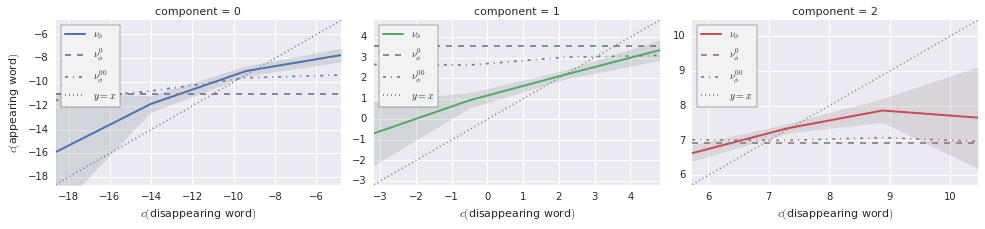

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.66788175  0.20182029]



aoa  frequency  letters_count
Component-0 -0.752382   0.394130      -0.527809
Component-1  0.325555  -0.474083      -0.818083

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 26478) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   17 of 26478) |                     | Elapsed Time: 0:00:02 ETA: 1:15:50

  0% (   46 of 26478) |                     | Elapsed Time: 0:00:03 ETA: 0:30:02

  0% (   74 of 26478) |                     | Elapsed Time: 0:00:03 ETA: 0:19:53

  0% (  103 of 26478) |                     | Elapsed Time: 0:00:03 ETA: 0:15:09

  0% (  132 of 26478) |                     | Elapsed Time: 0:00:03 ETA: 0:03:08

  0% (  161 of 26478) |                     | Elapsed Time: 0:00:03 ETA: 0:03:11

  0% (  190 of 26478) |                     | Elapsed Time: 0:00:04 ETA: 0:03:08

  0% (  218 of 26478) |                     | Elapsed Time: 0:00:04 ETA: 0:03:08

  0% (  246 of 26478) |                     | Elapsed Time: 0:00:04 ETA: 0:03:08

  1% (  275 of 26478) |                     | Elapsed Time: 0:00:04 ETA: 0:03:10

  1% (  304 of 26478) |                     | Elapsed Time: 0:00:05 ETA: 0:03:11

  1% (  345 of 26478) |                     | Elapsed Time: 0:00:05 ETA: 0:03:10

  1% (  373 of 26478) |                     | Elapsed Time: 0:00:05 ETA: 0:03:10

  1% (  401 of 26478) |                     | Elapsed Time: 0:00:05 ETA: 0:03:11

  1% (  432 of 26478) |                     | Elapsed Time: 0:00:05 ETA: 0:03:07

  1% (  463 of 26478) |                     | Elapsed Time: 0:00:06 ETA: 0:03:02

  1% (  497 of 26478) |                     | Elapsed Time: 0:00:06 ETA: 0:02:54

  2% (  531 of 26478) |                     | Elapsed Time: 0:00:06 ETA: 0:02:47

  2% (  563 of 26478) |                     | Elapsed Time: 0:00:06 ETA: 0:02:43

  2% (  595 of 26478) |                     | Elapsed Time: 0:00:06 ETA: 0:02:42

  2% (  629 of 26478) |                     | Elapsed Time: 0:00:07 ETA: 0:02:42

  2% (  662 of 26478) |                     | Elapsed Time: 0:00:07 ETA: 0:02:44

  2% (  693 of 26478) |                     | Elapsed Time: 0:00:07 ETA: 0:02:45

  2% (  723 of 26478) |                     | Elapsed Time: 0:00:07 ETA: 0:02:46

  2% (  756 of 26478) |                     | Elapsed Time: 0:00:07 ETA: 0:02:45

  2% (  788 of 26478) |                     | Elapsed Time: 0:00:08 ETA: 0:02:47

  3% (  820 of 26478) |                     | Elapsed Time: 0:00:08 ETA: 0:02:45

  3% (  852 of 26478) |                     | Elapsed Time: 0:00:08 ETA: 0:02:45

  3% (  884 of 26478) |                     | Elapsed Time: 0:00:08 ETA: 0:02:45

  3% (  915 of 26478) |                     | Elapsed Time: 0:00:09 ETA: 0:02:45

  3% (  947 of 26478) |                     | Elapsed Time: 0:00:09 ETA: 0:02:46

  3% (  993 of 26478) |                     | Elapsed Time: 0:00:09 ETA: 0:02:42

  3% ( 1026 of 26478) |                     | Elapsed Time: 0:00:09 ETA: 0:02:41

  4% ( 1060 of 26478) |                     | Elapsed Time: 0:00:09 ETA: 0:02:38

  4% ( 1097 of 26478) |                     | Elapsed Time: 0:00:10 ETA: 0:02:32

  4% ( 1130 of 26478) |                     | Elapsed Time: 0:00:10 ETA: 0:02:34

  4% ( 1159 of 26478) |                     | Elapsed Time: 0:00:10 ETA: 0:02:37

  4% ( 1193 of 26478) |                     | Elapsed Time: 0:00:10 ETA: 0:02:36

  4% ( 1227 of 26478) |                     | Elapsed Time: 0:00:10 ETA: 0:02:36

  4% ( 1248 of 26478) |                     | Elapsed Time: 0:00:11 ETA: 0:02:54

  4% ( 1268 of 26478) |#                    | Elapsed Time: 0:00:11 ETA: 0:03:05

  4% ( 1288 of 26478) |#                    | Elapsed Time: 0:00:11 ETA: 0:03:27

  4% ( 1309 of 26478) |#                    | Elapsed Time: 0:00:11 ETA: 0:03:58

  5% ( 1334 of 26478) |#                    | Elapsed Time: 0:00:12 ETA: 0:04:18

  5% ( 1355 of 26478) |#                    | Elapsed Time: 0:00:12 ETA: 0:04:17

  5% ( 1376 of 26478) |#                    | Elapsed Time: 0:00:12 ETA: 0:04:17

  5% ( 1397 of 26478) |#                    | Elapsed Time: 0:00:12 ETA: 0:04:15

  5% ( 1418 of 26478) |#                    | Elapsed Time: 0:00:12 ETA: 0:04:14

  5% ( 1439 of 26478) |#                    | Elapsed Time: 0:00:13 ETA: 0:04:11

  5% ( 1460 of 26478) |#                    | Elapsed Time: 0:00:13 ETA: 0:04:11

  5% ( 1482 of 26478) |#                    | Elapsed Time: 0:00:13 ETA: 0:04:10

  5% ( 1506 of 26478) |#                    | Elapsed Time: 0:00:13 ETA: 0:04:01

  5% ( 1529 of 26478) |#                    | Elapsed Time: 0:00:13 ETA: 0:03:57

  5% ( 1551 of 26478) |#                    | Elapsed Time: 0:00:14 ETA: 0:03:57

  5% ( 1572 of 26478) |#                    | Elapsed Time: 0:00:14 ETA: 0:03:57

  6% ( 1593 of 26478) |#                    | Elapsed Time: 0:00:14 ETA: 0:03:56

  6% ( 1626 of 26478) |#                    | Elapsed Time: 0:00:14 ETA: 0:03:38

  6% ( 1673 of 26478) |#                    | Elapsed Time: 0:00:15 ETA: 0:03:06

  6% ( 1709 of 26478) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:46

  6% ( 1743 of 26478) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:33

  6% ( 1774 of 26478) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:27

  6% ( 1805 of 26478) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:32

  6% ( 1836 of 26478) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:38

  7% ( 1864 of 26478) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:47

  7% ( 1895 of 26478) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:47

  7% ( 1927 of 26478) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:45

  7% ( 1961 of 26478) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:42

  7% ( 2003 of 26478) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:35

  7% ( 2037 of 26478) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:32

  7% ( 2071 of 26478) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:29

  7% ( 2107 of 26478) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:27

  8% ( 2143 of 26478) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:24

  8% ( 2176 of 26478) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:24

  8% ( 2210 of 26478) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:23

  8% ( 2244 of 26478) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:25

  8% ( 2278 of 26478) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:27

  8% ( 2317 of 26478) |#                    | Elapsed Time: 0:00:19 ETA: 0:02:34

  8% ( 2356 of 26478) |#                    | Elapsed Time: 0:00:19 ETA: 0:02:29

  9% ( 2390 of 26478) |#                    | Elapsed Time: 0:00:19 ETA: 0:02:29

  9% ( 2423 of 26478) |#                    | Elapsed Time: 0:00:19 ETA: 0:02:29

  9% ( 2461 of 26478) |#                    | Elapsed Time: 0:00:19 ETA: 0:02:24

  9% ( 2489 of 26478) |#                    | Elapsed Time: 0:00:20 ETA: 0:02:27

  9% ( 2521 of 26478) |#                    | Elapsed Time: 0:00:20 ETA: 0:02:31

  9% ( 2551 of 26478) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:34

  9% ( 2584 of 26478) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:37

  9% ( 2612 of 26478) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:42

  9% ( 2636 of 26478) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:48

 10% ( 2661 of 26478) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:56

 10% ( 2686 of 26478) |##                   | Elapsed Time: 0:00:21 ETA: 0:03:03

 10% ( 2712 of 26478) |##                   | Elapsed Time: 0:00:21 ETA: 0:03:17

 10% ( 2738 of 26478) |##                   | Elapsed Time: 0:00:22 ETA: 0:03:15

 10% ( 2764 of 26478) |##                   | Elapsed Time: 0:00:22 ETA: 0:03:11

 10% ( 2795 of 26478) |##                   | Elapsed Time: 0:00:22 ETA: 0:03:01

 10% ( 2832 of 26478) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:44

 10% ( 2862 of 26478) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:39

 10% ( 2891 of 26478) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:35

 11% ( 2921 of 26478) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:31

 11% ( 2951 of 26478) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:41

 11% ( 2994 of 26478) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:43

 11% ( 3024 of 26478) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:44

 11% ( 3054 of 26478) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:43

 11% ( 3084 of 26478) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:43

 11% ( 3114 of 26478) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:43

 11% ( 3144 of 26478) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:43

 11% ( 3174 of 26478) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:43

 12% ( 3204 of 26478) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:42

 12% ( 3234 of 26478) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:41

 12% ( 3277 of 26478) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:42

 12% ( 3310 of 26478) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:42

 12% ( 3340 of 26478) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:41

 12% ( 3370 of 26478) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:41

 12% ( 3400 of 26478) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:40

 12% ( 3430 of 26478) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:39

 13% ( 3460 of 26478) |##                   | Elapsed Time: 0:00:27 ETA: 0:02:39

 13% ( 3490 of 26478) |##                   | Elapsed Time: 0:00:27 ETA: 0:02:39

 13% ( 3520 of 26478) |##                   | Elapsed Time: 0:00:27 ETA: 0:02:39

 13% ( 3549 of 26478) |##                   | Elapsed Time: 0:00:27 ETA: 0:02:39

 13% ( 3579 of 26478) |##                   | Elapsed Time: 0:00:27 ETA: 0:02:39

 13% ( 3608 of 26478) |##                   | Elapsed Time: 0:00:28 ETA: 0:02:40

 13% ( 3641 of 26478) |##                   | Elapsed Time: 0:00:28 ETA: 0:02:39

 13% ( 3671 of 26478) |##                   | Elapsed Time: 0:00:28 ETA: 0:02:39

 13% ( 3701 of 26478) |##                   | Elapsed Time: 0:00:28 ETA: 0:02:39

 14% ( 3731 of 26478) |##                   | Elapsed Time: 0:00:28 ETA: 0:02:39

 14% ( 3761 of 26478) |##                   | Elapsed Time: 0:00:29 ETA: 0:02:38

 14% ( 3790 of 26478) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:39

 14% ( 3818 of 26478) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:40

 14% ( 3848 of 26478) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:39

 14% ( 3878 of 26478) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:39

 14% ( 3908 of 26478) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:37

 14% ( 3937 of 26478) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:36

 15% ( 3972 of 26478) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:37

 15% ( 3998 of 26478) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:41

 15% ( 4027 of 26478) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:43

 15% ( 4055 of 26478) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:44

 15% ( 4083 of 26478) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:44

 15% ( 4112 of 26478) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:40

 15% ( 4141 of 26478) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:40

 15% ( 4169 of 26478) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:40

 15% ( 4197 of 26478) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:39

 15% ( 4225 of 26478) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:40

 16% ( 4253 of 26478) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:40

 16% ( 4281 of 26478) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:41

 16% ( 4317 of 26478) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:41

 16% ( 4346 of 26478) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:40

 16% ( 4376 of 26478) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:38

 16% ( 4405 of 26478) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:38

 16% ( 4433 of 26478) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:37

 16% ( 4461 of 26478) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:36

 16% ( 4493 of 26478) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:34

 17% ( 4529 of 26478) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:27

 17% ( 4563 of 26478) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:20

 17% ( 4597 of 26478) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:15

 17% ( 4634 of 26478) |###                  | Elapsed Time: 0:00:35 ETA: 0:02:09

 17% ( 4668 of 26478) |###                  | Elapsed Time: 0:00:35 ETA: 0:02:10

 17% ( 4698 of 26478) |###                  | Elapsed Time: 0:00:35 ETA: 0:02:14

 17% ( 4727 of 26478) |###                  | Elapsed Time: 0:00:35 ETA: 0:02:17

 17% ( 4760 of 26478) |###                  | Elapsed Time: 0:00:36 ETA: 0:02:20

 18% ( 4791 of 26478) |###                  | Elapsed Time: 0:00:36 ETA: 0:02:23

 18% ( 4822 of 26478) |###                  | Elapsed Time: 0:00:36 ETA: 0:02:27

 18% ( 4852 of 26478) |###                  | Elapsed Time: 0:00:36 ETA: 0:02:27

 18% ( 4885 of 26478) |###                  | Elapsed Time: 0:00:36 ETA: 0:02:23

 18% ( 4917 of 26478) |###                  | Elapsed Time: 0:00:37 ETA: 0:02:21

 18% ( 4949 of 26478) |###                  | Elapsed Time: 0:00:37 ETA: 0:02:21

 18% ( 4981 of 26478) |###                  | Elapsed Time: 0:00:37 ETA: 0:02:19

 18% ( 5009 of 26478) |###                  | Elapsed Time: 0:00:37 ETA: 0:02:20

 19% ( 5040 of 26478) |###                  | Elapsed Time: 0:00:37 ETA: 0:02:23

 19% ( 5071 of 26478) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:24

 19% ( 5099 of 26478) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:27

 19% ( 5128 of 26478) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:29

 19% ( 5157 of 26478) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:28

 19% ( 5189 of 26478) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:28

 19% ( 5221 of 26478) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:24

 19% ( 5251 of 26478) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:21

 19% ( 5281 of 26478) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:23

 20% ( 5313 of 26478) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:20

 20% ( 5347 of 26478) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:18

 20% ( 5379 of 26478) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:17

 20% ( 5411 of 26478) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:13

 20% ( 5444 of 26478) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:11

 20% ( 5473 of 26478) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:16

 20% ( 5501 of 26478) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:19

 20% ( 5533 of 26478) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:22

 21% ( 5566 of 26478) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:21

 21% ( 5599 of 26478) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:19

 21% ( 5644 of 26478) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:14

 21% ( 5677 of 26478) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:10

 21% ( 5710 of 26478) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:08

 21% ( 5743 of 26478) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:08

 21% ( 5777 of 26478) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:07

 21% ( 5810 of 26478) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:07

 22% ( 5842 of 26478) |####                 | Elapsed Time: 0:00:43 ETA: 0:02:09

 22% ( 5871 of 26478) |####                 | Elapsed Time: 0:00:43 ETA: 0:02:12

 22% ( 5903 of 26478) |####                 | Elapsed Time: 0:00:43 ETA: 0:02:13

 22% ( 5935 of 26478) |####                 | Elapsed Time: 0:00:43 ETA: 0:02:14

 22% ( 5975 of 26478) |####                 | Elapsed Time: 0:00:43 ETA: 0:02:13

 22% ( 6007 of 26478) |####                 | Elapsed Time: 0:00:44 ETA: 0:02:12

 22% ( 6040 of 26478) |####                 | Elapsed Time: 0:00:44 ETA: 0:02:09

 22% ( 6074 of 26478) |####                 | Elapsed Time: 0:00:44 ETA: 0:02:07

 23% ( 6108 of 26478) |####                 | Elapsed Time: 0:00:44 ETA: 0:02:06

 23% ( 6141 of 26478) |####                 | Elapsed Time: 0:00:45 ETA: 0:02:05

 23% ( 6175 of 26478) |####                 | Elapsed Time: 0:00:45 ETA: 0:02:03

 23% ( 6207 of 26478) |####                 | Elapsed Time: 0:00:45 ETA: 0:02:05

 23% ( 6238 of 26478) |####                 | Elapsed Time: 0:00:45 ETA: 0:02:08

 23% ( 6271 of 26478) |####                 | Elapsed Time: 0:00:45 ETA: 0:02:09

 23% ( 6306 of 26478) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:10

 23% ( 6340 of 26478) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:06

 24% ( 6374 of 26478) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:04

 24% ( 6408 of 26478) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:01

 24% ( 6441 of 26478) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:01

 24% ( 6475 of 26478) |#####                | Elapsed Time: 0:00:47 ETA: 0:02:00

 24% ( 6506 of 26478) |#####                | Elapsed Time: 0:00:47 ETA: 0:02:02

 24% ( 6540 of 26478) |#####                | Elapsed Time: 0:00:47 ETA: 0:02:03

 24% ( 6572 of 26478) |#####                | Elapsed Time: 0:00:47 ETA: 0:02:04

 25% ( 6620 of 26478) |#####                | Elapsed Time: 0:00:47 ETA: 0:02:03

 25% ( 6650 of 26478) |#####                | Elapsed Time: 0:00:48 ETA: 0:02:06

 25% ( 6680 of 26478) |#####                | Elapsed Time: 0:00:48 ETA: 0:02:07

 25% ( 6713 of 26478) |#####                | Elapsed Time: 0:00:48 ETA: 0:02:08

 25% ( 6739 of 26478) |#####                | Elapsed Time: 0:00:48 ETA: 0:02:13

 25% ( 6769 of 26478) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:17

 25% ( 6799 of 26478) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:15

 25% ( 6826 of 26478) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:20

 25% ( 6857 of 26478) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:19

 26% ( 6889 of 26478) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:13

 26% ( 6920 of 26478) |#####                | Elapsed Time: 0:00:50 ETA: 0:02:13

 26% ( 6951 of 26478) |#####                | Elapsed Time: 0:00:50 ETA: 0:02:14

 26% ( 6983 of 26478) |#####                | Elapsed Time: 0:00:50 ETA: 0:02:06

 26% ( 7015 of 26478) |#####                | Elapsed Time: 0:00:50 ETA: 0:02:06

 26% ( 7047 of 26478) |#####                | Elapsed Time: 0:00:50 ETA: 0:02:06

 26% ( 7076 of 26478) |#####                | Elapsed Time: 0:00:51 ETA: 0:02:09

 26% ( 7105 of 26478) |#####                | Elapsed Time: 0:00:51 ETA: 0:02:11

 26% ( 7141 of 26478) |#####                | Elapsed Time: 0:00:51 ETA: 0:02:06

 27% ( 7176 of 26478) |#####                | Elapsed Time: 0:00:51 ETA: 0:02:03

 27% ( 7209 of 26478) |#####                | Elapsed Time: 0:00:51 ETA: 0:02:02

 27% ( 7243 of 26478) |#####                | Elapsed Time: 0:00:52 ETA: 0:01:56

 27% ( 7282 of 26478) |#####                | Elapsed Time: 0:00:52 ETA: 0:01:57

 27% ( 7329 of 26478) |#####                | Elapsed Time: 0:00:52 ETA: 0:02:01

 27% ( 7360 of 26478) |#####                | Elapsed Time: 0:00:52 ETA: 0:02:03

 27% ( 7391 of 26478) |#####                | Elapsed Time: 0:00:53 ETA: 0:02:05

 28% ( 7423 of 26478) |#####                | Elapsed Time: 0:00:53 ETA: 0:02:05

 28% ( 7455 of 26478) |#####                | Elapsed Time: 0:00:53 ETA: 0:02:06

 28% ( 7503 of 26478) |#####                | Elapsed Time: 0:00:53 ETA: 0:02:03

 28% ( 7540 of 26478) |#####                | Elapsed Time: 0:00:54 ETA: 0:01:58

 28% ( 7577 of 26478) |######               | Elapsed Time: 0:00:54 ETA: 0:01:54

 28% ( 7613 of 26478) |######               | Elapsed Time: 0:00:54 ETA: 0:01:50

 28% ( 7649 of 26478) |######               | Elapsed Time: 0:00:54 ETA: 0:01:46

 29% ( 7685 of 26478) |######               | Elapsed Time: 0:00:54 ETA: 0:01:46

 29% ( 7719 of 26478) |######               | Elapsed Time: 0:00:55 ETA: 0:01:47

 29% ( 7745 of 26478) |######               | Elapsed Time: 0:00:55 ETA: 0:01:55

 29% ( 7771 of 26478) |######               | Elapsed Time: 0:00:55 ETA: 0:02:03

 29% ( 7797 of 26478) |######               | Elapsed Time: 0:00:55 ETA: 0:02:13

 29% ( 7823 of 26478) |######               | Elapsed Time: 0:00:55 ETA: 0:02:24

 29% ( 7851 of 26478) |######               | Elapsed Time: 0:00:56 ETA: 0:02:27

 29% ( 7877 of 26478) |######               | Elapsed Time: 0:00:56 ETA: 0:02:26

 29% ( 7905 of 26478) |######               | Elapsed Time: 0:00:56 ETA: 0:02:24

 30% ( 7944 of 26478) |######               | Elapsed Time: 0:00:56 ETA: 0:02:22

 30% ( 7972 of 26478) |######               | Elapsed Time: 0:00:57 ETA: 0:02:21

 30% ( 7999 of 26478) |######               | Elapsed Time: 0:00:57 ETA: 0:02:21

 30% ( 8026 of 26478) |######               | Elapsed Time: 0:00:57 ETA: 0:02:22

 30% ( 8056 of 26478) |######               | Elapsed Time: 0:00:57 ETA: 0:02:18

 30% ( 8091 of 26478) |######               | Elapsed Time: 0:00:57 ETA: 0:02:09

 30% ( 8127 of 26478) |######               | Elapsed Time: 0:00:58 ETA: 0:02:00

 30% ( 8163 of 26478) |######               | Elapsed Time: 0:00:58 ETA: 0:01:52

 30% ( 8199 of 26478) |######               | Elapsed Time: 0:00:58 ETA: 0:01:45

 31% ( 8234 of 26478) |######               | Elapsed Time: 0:00:58 ETA: 0:01:45

 31% ( 8275 of 26478) |######               | Elapsed Time: 0:00:58 ETA: 0:01:46

 31% ( 8310 of 26478) |######               | Elapsed Time: 0:00:59 ETA: 0:01:47

 31% ( 8346 of 26478) |######               | Elapsed Time: 0:00:59 ETA: 0:01:46

 31% ( 8382 of 26478) |######               | Elapsed Time: 0:00:59 ETA: 0:01:47

 31% ( 8417 of 26478) |######               | Elapsed Time: 0:00:59 ETA: 0:01:46

 31% ( 8450 of 26478) |######               | Elapsed Time: 0:00:59 ETA: 0:01:46

 32% ( 8482 of 26478) |######               | Elapsed Time: 0:01:00 ETA: 0:01:48

 32% ( 8511 of 26478) |######               | Elapsed Time: 0:01:00 ETA: 0:01:54

 32% ( 8540 of 26478) |######               | Elapsed Time: 0:01:00 ETA: 0:02:00

 32% ( 8569 of 26478) |######               | Elapsed Time: 0:01:00 ETA: 0:02:04

 32% ( 8606 of 26478) |######               | Elapsed Time: 0:01:01 ETA: 0:02:07

 32% ( 8635 of 26478) |######               | Elapsed Time: 0:01:01 ETA: 0:02:09

 32% ( 8670 of 26478) |######               | Elapsed Time: 0:01:01 ETA: 0:02:02

 32% ( 8708 of 26478) |######               | Elapsed Time: 0:01:01 ETA: 0:01:54

 33% ( 8739 of 26478) |######               | Elapsed Time: 0:01:01 ETA: 0:01:53

 33% ( 8771 of 26478) |######               | Elapsed Time: 0:01:02 ETA: 0:01:49

 33% ( 8801 of 26478) |######               | Elapsed Time: 0:01:02 ETA: 0:01:50

 33% ( 8831 of 26478) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:55

 33% ( 8866 of 26478) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:53

 33% ( 8900 of 26478) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:52

 33% ( 8937 of 26478) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:49

 33% ( 8970 of 26478) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:47

 33% ( 9002 of 26478) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:47

 34% ( 9036 of 26478) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:48

 34% ( 9070 of 26478) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:47

 34% ( 9106 of 26478) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:45

 34% ( 9140 of 26478) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:44

 34% ( 9173 of 26478) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:43

 34% ( 9205 of 26478) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:44

 34% ( 9236 of 26478) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:47

 35% ( 9268 of 26478) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:50

 35% ( 9303 of 26478) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:48

 35% ( 9340 of 26478) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:45

 35% ( 9376 of 26478) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:41

 35% ( 9414 of 26478) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:37

 35% ( 9452 of 26478) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:34

 35% ( 9485 of 26478) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:36

 35% ( 9524 of 26478) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:34

 36% ( 9563 of 26478) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:33

 36% ( 9619 of 26478) |#######              | Elapsed Time: 0:01:07 ETA: 0:01:32

 36% ( 9659 of 26478) |#######              | Elapsed Time: 0:01:07 ETA: 0:01:29

 36% ( 9697 of 26478) |#######              | Elapsed Time: 0:01:07 ETA: 0:01:28

 36% ( 9736 of 26478) |#######              | Elapsed Time: 0:01:07 ETA: 0:01:28

 36% ( 9777 of 26478) |#######              | Elapsed Time: 0:01:07 ETA: 0:01:27

 37% ( 9815 of 26478) |#######              | Elapsed Time: 0:01:08 ETA: 0:01:27

 37% ( 9852 of 26478) |#######              | Elapsed Time: 0:01:08 ETA: 0:01:28

 37% ( 9888 of 26478) |#######              | Elapsed Time: 0:01:08 ETA: 0:01:29

 37% ( 9930 of 26478) |#######              | Elapsed Time: 0:01:08 ETA: 0:01:31

 37% ( 9959 of 26478) |#######              | Elapsed Time: 0:01:09 ETA: 0:01:38

 37% ( 9986 of 26478) |#######              | Elapsed Time: 0:01:09 ETA: 0:01:45

 37% (10012 of 26478) |#######              | Elapsed Time: 0:01:09 ETA: 0:01:53

 37% (10038 of 26478) |#######              | Elapsed Time: 0:01:09 ETA: 0:02:02

 38% (10070 of 26478) |#######              | Elapsed Time: 0:01:09 ETA: 0:02:02

 38% (10106 of 26478) |########             | Elapsed Time: 0:01:10 ETA: 0:01:55

 38% (10134 of 26478) |########             | Elapsed Time: 0:01:10 ETA: 0:01:53

 38% (10164 of 26478) |########             | Elapsed Time: 0:01:10 ETA: 0:01:48

 38% (10194 of 26478) |########             | Elapsed Time: 0:01:10 ETA: 0:01:46

 38% (10224 of 26478) |########             | Elapsed Time: 0:01:10 ETA: 0:01:50

 38% (10261 of 26478) |########             | Elapsed Time: 0:01:11 ETA: 0:01:52

 38% (10297 of 26478) |########             | Elapsed Time: 0:01:11 ETA: 0:01:50

 39% (10329 of 26478) |########             | Elapsed Time: 0:01:11 ETA: 0:01:48

 39% (10366 of 26478) |########             | Elapsed Time: 0:01:11 ETA: 0:01:43

 39% (10401 of 26478) |########             | Elapsed Time: 0:01:12 ETA: 0:01:39

 39% (10436 of 26478) |########             | Elapsed Time: 0:01:12 ETA: 0:01:32

 39% (10469 of 26478) |########             | Elapsed Time: 0:01:12 ETA: 0:01:34

 39% (10502 of 26478) |########             | Elapsed Time: 0:01:12 ETA: 0:01:35

 39% (10531 of 26478) |########             | Elapsed Time: 0:01:12 ETA: 0:01:39

 39% (10560 of 26478) |########             | Elapsed Time: 0:01:13 ETA: 0:01:43

 40% (10610 of 26478) |########             | Elapsed Time: 0:01:13 ETA: 0:01:43

 40% (10645 of 26478) |########             | Elapsed Time: 0:01:13 ETA: 0:01:41

 40% (10679 of 26478) |########             | Elapsed Time: 0:01:13 ETA: 0:01:39

 40% (10713 of 26478) |########             | Elapsed Time: 0:01:13 ETA: 0:01:35

 40% (10749 of 26478) |########             | Elapsed Time: 0:01:14 ETA: 0:01:32

 40% (10783 of 26478) |########             | Elapsed Time: 0:01:14 ETA: 0:01:33

 40% (10818 of 26478) |########             | Elapsed Time: 0:01:14 ETA: 0:01:32

 40% (10852 of 26478) |########             | Elapsed Time: 0:01:14 ETA: 0:01:32

 41% (10883 of 26478) |########             | Elapsed Time: 0:01:15 ETA: 0:01:34

 41% (10905 of 26478) |########             | Elapsed Time: 0:01:15 ETA: 0:01:43

 41% (10933 of 26478) |########             | Elapsed Time: 0:01:15 ETA: 0:01:57

 41% (10956 of 26478) |########             | Elapsed Time: 0:01:15 ETA: 0:02:10

 41% (10989 of 26478) |########             | Elapsed Time: 0:01:15 ETA: 0:02:11

 41% (11028 of 26478) |########             | Elapsed Time: 0:01:16 ETA: 0:01:56

 41% (11066 of 26478) |########             | Elapsed Time: 0:01:16 ETA: 0:01:43

 41% (11104 of 26478) |########             | Elapsed Time: 0:01:16 ETA: 0:01:29

 42% (11134 of 26478) |########             | Elapsed Time: 0:01:16 ETA: 0:01:26

 42% (11166 of 26478) |########             | Elapsed Time: 0:01:16 ETA: 0:01:30

 42% (11198 of 26478) |########             | Elapsed Time: 0:01:17 ETA: 0:01:33

 42% (11230 of 26478) |########             | Elapsed Time: 0:01:17 ETA: 0:01:37

 42% (11269 of 26478) |########             | Elapsed Time: 0:01:17 ETA: 0:01:41

 42% (11305 of 26478) |########             | Elapsed Time: 0:01:17 ETA: 0:01:37

 42% (11343 of 26478) |########             | Elapsed Time: 0:01:18 ETA: 0:01:33

 42% (11374 of 26478) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:33

 43% (11411 of 26478) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:30

 43% (11448 of 26478) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:26

 43% (11483 of 26478) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:26

 43% (11523 of 26478) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:24

 43% (11560 of 26478) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:22

 43% (11601 of 26478) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:23

 43% (11631 of 26478) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:25

 44% (11661 of 26478) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:30

 44% (11691 of 26478) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:36

 44% (11721 of 26478) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:40

 44% (11755 of 26478) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:39

 44% (11791 of 26478) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:34

 44% (11824 of 26478) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:31

 44% (11858 of 26478) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:28

 44% (11893 of 26478) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:25

 45% (11932 of 26478) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:27

 45% (11972 of 26478) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:25

 45% (12012 of 26478) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:21

 45% (12047 of 26478) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:20

 45% (12085 of 26478) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:19

 45% (12119 of 26478) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:19

 45% (12149 of 26478) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:24

 45% (12178 of 26478) |#########            | Elapsed Time: 0:01:23 ETA: 0:01:29

 46% (12208 of 26478) |#########            | Elapsed Time: 0:01:23 ETA: 0:01:33

 46% (12247 of 26478) |#########            | Elapsed Time: 0:01:23 ETA: 0:01:38

 46% (12280 of 26478) |#########            | Elapsed Time: 0:01:23 ETA: 0:01:35

 46% (12314 of 26478) |#########            | Elapsed Time: 0:01:23 ETA: 0:01:31

 46% (12349 of 26478) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:28

 46% (12385 of 26478) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:24

 46% (12420 of 26478) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:22

 47% (12454 of 26478) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:22

 47% (12488 of 26478) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:23

 47% (12521 of 26478) |#########            | Elapsed Time: 0:01:25 ETA: 0:01:24

 47% (12554 of 26478) |#########            | Elapsed Time: 0:01:25 ETA: 0:01:26

 47% (12598 of 26478) |#########            | Elapsed Time: 0:01:25 ETA: 0:01:23

 47% (12631 of 26478) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:22

 47% (12666 of 26478) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:21

 47% (12703 of 26478) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:19

 48% (12739 of 26478) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:18

 48% (12773 of 26478) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:20

 48% (12807 of 26478) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:20

 48% (12841 of 26478) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:22

 48% (12890 of 26478) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:24

 48% (12925 of 26478) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:24

 48% (12958 of 26478) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:24

 49% (12992 of 26478) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:24

 49% (13026 of 26478) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:24

 49% (13062 of 26478) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:21

 49% (13101 of 26478) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:18

 49% (13130 of 26478) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:19

 49% (13158 of 26478) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:22

 49% (13186 of 26478) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:25

 49% (13215 of 26478) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:31

 50% (13254 of 26478) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:36

 50% (13290 of 26478) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:30

 50% (13323 of 26478) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:27

 50% (13355 of 26478) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:25

 50% (13392 of 26478) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:21

 50% (13428 of 26478) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:17

 50% (13464 of 26478) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:17

 50% (13498 of 26478) |##########           | Elapsed Time: 0:01:31 ETA: 0:01:13

 51% (13532 of 26478) |##########           | Elapsed Time: 0:01:31 ETA: 0:01:15

 51% (13570 of 26478) |##########           | Elapsed Time: 0:01:31 ETA: 0:01:16

 51% (13605 of 26478) |##########           | Elapsed Time: 0:01:31 ETA: 0:01:16

 51% (13638 of 26478) |##########           | Elapsed Time: 0:01:32 ETA: 0:01:17

 51% (13675 of 26478) |##########           | Elapsed Time: 0:01:32 ETA: 0:01:15

 51% (13712 of 26478) |##########           | Elapsed Time: 0:01:32 ETA: 0:01:14

 51% (13743 of 26478) |##########           | Elapsed Time: 0:01:32 ETA: 0:01:16

 52% (13775 of 26478) |##########           | Elapsed Time: 0:01:32 ETA: 0:01:16

 52% (13808 of 26478) |##########           | Elapsed Time: 0:01:33 ETA: 0:01:17

 52% (13844 of 26478) |##########           | Elapsed Time: 0:01:33 ETA: 0:01:18

 52% (13878 of 26478) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:17

 52% (13917 of 26478) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:17

 52% (13946 of 26478) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:19

 52% (13997 of 26478) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:19

 52% (14029 of 26478) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:19

 53% (14062 of 26478) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:19

 53% (14097 of 26478) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:15

 53% (14131 of 26478) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:14

 53% (14165 of 26478) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:14

 53% (14199 of 26478) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:13

 53% (14251 of 26478) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:12

 53% (14291 of 26478) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:10

 54% (14329 of 26478) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:08

 54% (14365 of 26478) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:07

 54% (14400 of 26478) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:07

 54% (14436 of 26478) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:07

 54% (14476 of 26478) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:07

 54% (14516 of 26478) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:05

 55% (14563 of 26478) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:03

 55% (14611 of 26478) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:05

 55% (14644 of 26478) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:07

 55% (14677 of 26478) |###########          | Elapsed Time: 0:01:38 ETA: 0:01:10

 55% (14711 of 26478) |###########          | Elapsed Time: 0:01:38 ETA: 0:01:12

 55% (14745 of 26478) |###########          | Elapsed Time: 0:01:38 ETA: 0:01:11

 55% (14779 of 26478) |###########          | Elapsed Time: 0:01:38 ETA: 0:01:11

 55% (14813 of 26478) |###########          | Elapsed Time: 0:01:38 ETA: 0:01:11

 56% (14847 of 26478) |###########          | Elapsed Time: 0:01:39 ETA: 0:01:11

 56% (14894 of 26478) |###########          | Elapsed Time: 0:01:39 ETA: 0:01:11

 56% (14926 of 26478) |###########          | Elapsed Time: 0:01:39 ETA: 0:01:11

 56% (14961 of 26478) |###########          | Elapsed Time: 0:01:39 ETA: 0:01:10

 56% (14999 of 26478) |###########          | Elapsed Time: 0:01:40 ETA: 0:01:08

 56% (15036 of 26478) |###########          | Elapsed Time: 0:01:40 ETA: 0:01:06

 56% (15076 of 26478) |###########          | Elapsed Time: 0:01:40 ETA: 0:01:03

 57% (15116 of 26478) |###########          | Elapsed Time: 0:01:40 ETA: 0:01:00

 57% (15154 of 26478) |############         | Elapsed Time: 0:01:40 ETA: 0:00:59

 57% (15190 of 26478) |############         | Elapsed Time: 0:01:41 ETA: 0:01:00

 57% (15243 of 26478) |############         | Elapsed Time: 0:01:41 ETA: 0:01:00

 57% (15285 of 26478) |############         | Elapsed Time: 0:01:41 ETA: 0:01:00

 57% (15322 of 26478) |############         | Elapsed Time: 0:01:41 ETA: 0:01:00

 57% (15356 of 26478) |############         | Elapsed Time: 0:01:42 ETA: 0:01:01

 58% (15390 of 26478) |############         | Elapsed Time: 0:01:42 ETA: 0:01:02

 58% (15422 of 26478) |############         | Elapsed Time: 0:01:42 ETA: 0:01:04

 58% (15452 of 26478) |############         | Elapsed Time: 0:01:42 ETA: 0:01:09

 58% (15479 of 26478) |############         | Elapsed Time: 0:01:42 ETA: 0:01:13

 58% (15505 of 26478) |############         | Elapsed Time: 0:01:43 ETA: 0:01:17

 58% (15556 of 26478) |############         | Elapsed Time: 0:01:43 ETA: 0:01:15

 58% (15591 of 26478) |############         | Elapsed Time: 0:01:43 ETA: 0:01:11

 59% (15626 of 26478) |############         | Elapsed Time: 0:01:43 ETA: 0:01:07

 59% (15660 of 26478) |############         | Elapsed Time: 0:01:43 ETA: 0:01:04

 59% (15695 of 26478) |############         | Elapsed Time: 0:01:44 ETA: 0:01:02

 59% (15731 of 26478) |############         | Elapsed Time: 0:01:44 ETA: 0:01:02

 59% (15767 of 26478) |############         | Elapsed Time: 0:01:44 ETA: 0:01:01

 59% (15803 of 26478) |############         | Elapsed Time: 0:01:44 ETA: 0:01:00

 59% (15839 of 26478) |############         | Elapsed Time: 0:01:44 ETA: 0:01:00

 60% (15887 of 26478) |############         | Elapsed Time: 0:01:45 ETA: 0:00:59

 60% (15923 of 26478) |############         | Elapsed Time: 0:01:45 ETA: 0:00:59

 60% (15959 of 26478) |############         | Elapsed Time: 0:01:45 ETA: 0:00:59

 60% (15995 of 26478) |############         | Elapsed Time: 0:01:45 ETA: 0:00:59

 60% (16033 of 26478) |############         | Elapsed Time: 0:01:46 ETA: 0:00:58

 60% (16071 of 26478) |############         | Elapsed Time: 0:01:46 ETA: 0:00:57

 60% (16108 of 26478) |############         | Elapsed Time: 0:01:46 ETA: 0:00:57

 60% (16144 of 26478) |############         | Elapsed Time: 0:01:46 ETA: 0:00:57

 61% (16180 of 26478) |############         | Elapsed Time: 0:01:46 ETA: 0:00:57

 61% (16218 of 26478) |############         | Elapsed Time: 0:01:47 ETA: 0:00:59

 61% (16252 of 26478) |############         | Elapsed Time: 0:01:47 ETA: 0:01:00

 61% (16287 of 26478) |############         | Elapsed Time: 0:01:47 ETA: 0:01:00

 61% (16322 of 26478) |############         | Elapsed Time: 0:01:47 ETA: 0:01:01

 61% (16357 of 26478) |############         | Elapsed Time: 0:01:47 ETA: 0:01:00

 61% (16391 of 26478) |############         | Elapsed Time: 0:01:48 ETA: 0:01:00

 62% (16424 of 26478) |#############        | Elapsed Time: 0:01:48 ETA: 0:01:01

 62% (16457 of 26478) |#############        | Elapsed Time: 0:01:48 ETA: 0:01:01

 62% (16494 of 26478) |#############        | Elapsed Time: 0:01:48 ETA: 0:01:00

 62% (16549 of 26478) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:57

 62% (16589 of 26478) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:55

 62% (16628 of 26478) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:52

 62% (16666 of 26478) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:51

 63% (16704 of 26478) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:51

 63% (16760 of 26478) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:52

 63% (16815 of 26478) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:52

 63% (16849 of 26478) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:53

 63% (16898 of 26478) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:54

 63% (16936 of 26478) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:54

 64% (16973 of 26478) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:54

 64% (17007 of 26478) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:53

 64% (17044 of 26478) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:53

 64% (17082 of 26478) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:52

 64% (17119 of 26478) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:52

 64% (17155 of 26478) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:51

 64% (17194 of 26478) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:50

 65% (17226 of 26478) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:52

 65% (17260 of 26478) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:53

 65% (17293 of 26478) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:54

 65% (17327 of 26478) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:55

 65% (17361 of 26478) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:56

 65% (17395 of 26478) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:55

 65% (17426 of 26478) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:56

 65% (17466 of 26478) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:53

 66% (17506 of 26478) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:51

 66% (17561 of 26478) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:49

 66% (17602 of 26478) |#############        | Elapsed Time: 0:01:55 ETA: 0:00:46

 66% (17637 of 26478) |#############        | Elapsed Time: 0:01:55 ETA: 0:00:47

 66% (17671 of 26478) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:48

 66% (17705 of 26478) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:49

 66% (17738 of 26478) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:51

 67% (17771 of 26478) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:53

 67% (17804 of 26478) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:53

 67% (17838 of 26478) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:53

 67% (17873 of 26478) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:52

 67% (17907 of 26478) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:52

 67% (17941 of 26478) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:51

 67% (17975 of 26478) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:50

 68% (18009 of 26478) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:50

 68% (18045 of 26478) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:50

 68% (18077 of 26478) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:50

 68% (18101 of 26478) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:53

 68% (18132 of 26478) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:54

 68% (18165 of 26478) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:55

 68% (18204 of 26478) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:56

 68% (18239 of 26478) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:52

 69% (18272 of 26478) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:49

 69% (18307 of 26478) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:50

 69% (18338 of 26478) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:49

 69% (18370 of 26478) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:50

 69% (18422 of 26478) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:49

 69% (18459 of 26478) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:48

 69% (18495 of 26478) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:46

 70% (18535 of 26478) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:45

 70% (18570 of 26478) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:45

 70% (18605 of 26478) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:45

 70% (18643 of 26478) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:45

 70% (18680 of 26478) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:44

 70% (18714 of 26478) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:44

 70% (18746 of 26478) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:44

 70% (18781 of 26478) |##############       | Elapsed Time: 0:02:02 ETA: 0:00:45

 71% (18820 of 26478) |##############       | Elapsed Time: 0:02:02 ETA: 0:00:44

 71% (18866 of 26478) |##############       | Elapsed Time: 0:02:02 ETA: 0:00:44

 71% (18898 of 26478) |##############       | Elapsed Time: 0:02:02 ETA: 0:00:43

 71% (18930 of 26478) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:44

 71% (18964 of 26478) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:44

 71% (18998 of 26478) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:45

 71% (19032 of 26478) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:45

 72% (19065 of 26478) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:45

 72% (19091 of 26478) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:48

 72% (19120 of 26478) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:49

 72% (19150 of 26478) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:51

 72% (19180 of 26478) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:52

 72% (19214 of 26478) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:51

 72% (19245 of 26478) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:48

 72% (19276 of 26478) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:47

 72% (19306 of 26478) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:47

 73% (19337 of 26478) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:47

 73% (19374 of 26478) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:45

 73% (19414 of 26478) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:43

 73% (19451 of 26478) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:40

 73% (19473 of 26478) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:42

 73% (19495 of 26478) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:46

 73% (19528 of 26478) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:52

 73% (19564 of 26478) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:53

 74% (19601 of 26478) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:50

 74% (19637 of 26478) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:45

 74% (19673 of 26478) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:41

 74% (19709 of 26478) |###############      | Elapsed Time: 0:02:08 ETA: 0:00:38

 74% (19747 of 26478) |###############      | Elapsed Time: 0:02:08 ETA: 0:00:38

 74% (19772 of 26478) |###############      | Elapsed Time: 0:02:08 ETA: 0:00:40

 74% (19807 of 26478) |###############      | Elapsed Time: 0:02:08 ETA: 0:00:40

 75% (19859 of 26478) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:40

 75% (19888 of 26478) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:41

 75% (19920 of 26478) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:41

 75% (19952 of 26478) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:40

 75% (19983 of 26478) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:41

 75% (20020 of 26478) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:40

 75% (20055 of 26478) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:39

 75% (20087 of 26478) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:39

 75% (20122 of 26478) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:38

 76% (20157 of 26478) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:37

 76% (20208 of 26478) |################     | Elapsed Time: 0:02:11 ETA: 0:00:37

 76% (20239 of 26478) |################     | Elapsed Time: 0:02:11 ETA: 0:00:37

 76% (20268 of 26478) |################     | Elapsed Time: 0:02:11 ETA: 0:00:37

 76% (20300 of 26478) |################     | Elapsed Time: 0:02:11 ETA: 0:00:38

 76% (20335 of 26478) |################     | Elapsed Time: 0:02:11 ETA: 0:00:38

 76% (20365 of 26478) |################     | Elapsed Time: 0:02:12 ETA: 0:00:41

 77% (20396 of 26478) |################     | Elapsed Time: 0:02:12 ETA: 0:00:40

 77% (20427 of 26478) |################     | Elapsed Time: 0:02:12 ETA: 0:00:39

 77% (20463 of 26478) |################     | Elapsed Time: 0:02:12 ETA: 0:00:38

 77% (20499 of 26478) |################     | Elapsed Time: 0:02:13 ETA: 0:00:37

 77% (20532 of 26478) |################     | Elapsed Time: 0:02:13 ETA: 0:00:37

 77% (20553 of 26478) |################     | Elapsed Time: 0:02:13 ETA: 0:00:40

 77% (20592 of 26478) |################     | Elapsed Time: 0:02:13 ETA: 0:00:38

 77% (20630 of 26478) |################     | Elapsed Time: 0:02:13 ETA: 0:00:37

 78% (20670 of 26478) |################     | Elapsed Time: 0:02:14 ETA: 0:00:35

 78% (20708 of 26478) |################     | Elapsed Time: 0:02:14 ETA: 0:00:31

 78% (20747 of 26478) |################     | Elapsed Time: 0:02:14 ETA: 0:00:30

 78% (20785 of 26478) |################     | Elapsed Time: 0:02:14 ETA: 0:00:30

 78% (20822 of 26478) |################     | Elapsed Time: 0:02:14 ETA: 0:00:30

 78% (20869 of 26478) |################     | Elapsed Time: 0:02:15 ETA: 0:00:31

 78% (20904 of 26478) |################     | Elapsed Time: 0:02:15 ETA: 0:00:31

 79% (20939 of 26478) |################     | Elapsed Time: 0:02:15 ETA: 0:00:31

 79% (20971 of 26478) |################     | Elapsed Time: 0:02:15 ETA: 0:00:32

 79% (21004 of 26478) |################     | Elapsed Time: 0:02:16 ETA: 0:00:33

 79% (21041 of 26478) |################     | Elapsed Time: 0:02:16 ETA: 0:00:32

 79% (21077 of 26478) |################     | Elapsed Time: 0:02:16 ETA: 0:00:32

 79% (21113 of 26478) |################     | Elapsed Time: 0:02:16 ETA: 0:00:32

 79% (21149 of 26478) |################     | Elapsed Time: 0:02:16 ETA: 0:00:30

 80% (21196 of 26478) |################     | Elapsed Time: 0:02:17 ETA: 0:00:31

 80% (21225 of 26478) |################     | Elapsed Time: 0:02:17 ETA: 0:00:32

 80% (21257 of 26478) |################     | Elapsed Time: 0:02:17 ETA: 0:00:33

 80% (21294 of 26478) |################     | Elapsed Time: 0:02:17 ETA: 0:00:32

 80% (21333 of 26478) |################     | Elapsed Time: 0:02:17 ETA: 0:00:31

 80% (21370 of 26478) |################     | Elapsed Time: 0:02:18 ETA: 0:00:30

 80% (21406 of 26478) |################     | Elapsed Time: 0:02:18 ETA: 0:00:28

 80% (21439 of 26478) |#################    | Elapsed Time: 0:02:18 ETA: 0:00:28

 81% (21461 of 26478) |#################    | Elapsed Time: 0:02:18 ETA: 0:00:31

 81% (21493 of 26478) |#################    | Elapsed Time: 0:02:18 ETA: 0:00:32

 81% (21529 of 26478) |#################    | Elapsed Time: 0:02:19 ETA: 0:00:33

 81% (21563 of 26478) |#################    | Elapsed Time: 0:02:19 ETA: 0:00:34

 81% (21591 of 26478) |#################    | Elapsed Time: 0:02:19 ETA: 0:00:33

 81% (21631 of 26478) |#################    | Elapsed Time: 0:02:19 ETA: 0:00:30

 81% (21666 of 26478) |#################    | Elapsed Time: 0:02:20 ETA: 0:00:29

 81% (21694 of 26478) |#################    | Elapsed Time: 0:02:20 ETA: 0:00:30

 82% (21726 of 26478) |#################    | Elapsed Time: 0:02:20 ETA: 0:00:29

 82% (21760 of 26478) |#################    | Elapsed Time: 0:02:20 ETA: 0:00:29

 82% (21797 of 26478) |#################    | Elapsed Time: 0:02:20 ETA: 0:00:30

 82% (21845 of 26478) |#################    | Elapsed Time: 0:02:21 ETA: 0:00:28

 82% (21878 of 26478) |#################    | Elapsed Time: 0:02:21 ETA: 0:00:27

 82% (21914 of 26478) |#################    | Elapsed Time: 0:02:21 ETA: 0:00:26

 82% (21944 of 26478) |#################    | Elapsed Time: 0:02:21 ETA: 0:00:27

 83% (21983 of 26478) |#################    | Elapsed Time: 0:02:21 ETA: 0:00:26

 83% (22021 of 26478) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:26

 83% (22059 of 26478) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:25

 83% (22098 of 26478) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:24

 83% (22135 of 26478) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:23

 83% (22155 of 26478) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:26

 83% (22190 of 26478) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:28

 83% (22216 of 26478) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:30

 84% (22248 of 26478) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:32

 84% (22287 of 26478) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:29

 84% (22323 of 26478) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:26

 84% (22362 of 26478) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:23

 84% (22385 of 26478) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:24

 84% (22408 of 26478) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:26

 84% (22442 of 26478) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:27

 84% (22479 of 26478) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:27

 85% (22526 of 26478) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:25

 85% (22567 of 26478) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:22

 85% (22595 of 26478) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:22

 85% (22636 of 26478) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:21

 85% (22668 of 26478) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:21

 85% (22701 of 26478) |##################   | Elapsed Time: 0:02:26 ETA: 0:00:22

 85% (22742 of 26478) |##################   | Elapsed Time: 0:02:26 ETA: 0:00:21

 86% (22780 of 26478) |##################   | Elapsed Time: 0:02:26 ETA: 0:00:20

 86% (22813 of 26478) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:21

 86% (22857 of 26478) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:20

 86% (22890 of 26478) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:20

 86% (22929 of 26478) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:20

 86% (22964 of 26478) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:20

 86% (22995 of 26478) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:20

 86% (23028 of 26478) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:20

 87% (23061 of 26478) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:20

 87% (23099 of 26478) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:20

 87% (23134 of 26478) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:20

 87% (23169 of 26478) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:19

 87% (23207 of 26478) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:19

 87% (23245 of 26478) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:18

 87% (23282 of 26478) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:18

 88% (23318 of 26478) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:17

 88% (23355 of 26478) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:17

 88% (23390 of 26478) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:17

 88% (23426 of 26478) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:17

 88% (23461 of 26478) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:17

 88% (23500 of 26478) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:16

 88% (23537 of 26478) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:16

 89% (23572 of 26478) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:16

 89% (23611 of 26478) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:15

 89% (23652 of 26478) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:15

 89% (23691 of 26478) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:14

 89% (23729 of 26478) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:14

 89% (23767 of 26478) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:14

 89% (23807 of 26478) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:14

 90% (23846 of 26478) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:14

 90% (23882 of 26478) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:14

 90% (23915 of 26478) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:15

 90% (23941 of 26478) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:15

 90% (23970 of 26478) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:16

 90% (24008 of 26478) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:15

 90% (24044 of 26478) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:15

 90% (24076 of 26478) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:15

 91% (24109 of 26478) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:13

 91% (24140 of 26478) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:14

 91% (24179 of 26478) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:14

 91% (24210 of 26478) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:14

 91% (24242 of 26478) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:14

 91% (24280 of 26478) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:13

 91% (24318 of 26478) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:12

 91% (24356 of 26478) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:12

 92% (24394 of 26478) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:11

 92% (24431 of 26478) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:11

 92% (24465 of 26478) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:11

 92% (24493 of 26478) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:11

 92% (24527 of 26478) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:59

 92% (24570 of 26478) |###################  | Elapsed Time: 0:02:41 ETA: 0:01:02

 92% (24598 of 26478) |###################  | Elapsed Time: 0:02:41 ETA: 0:01:04

 93% (24633 of 26478) |###################  | Elapsed Time: 0:02:41 ETA: 0:01:03

 93% (24670 of 26478) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:11

 93% (24707 of 26478) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:11

 93% (24740 of 26478) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:10

 93% (24773 of 26478) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:09

 93% (24824 of 26478) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:09

 93% (24859 of 26478) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:09

 94% (24895 of 26478) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:09

 94% (24929 of 26478) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:08

 94% (24958 of 26478) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:09

 94% (24990 of 26478) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:09

 94% (25027 of 26478) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:08

 94% (25054 of 26478) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:09

 94% (25088 of 26478) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:08

 94% (25120 of 26478) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:08

 95% (25155 of 26478) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:08

 95% (25190 of 26478) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:08

 95% (25222 of 26478) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:07

 95% (25260 of 26478) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:07

 95% (25293 of 26478) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:07

 95% (25327 of 26478) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:06

 95% (25363 of 26478) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:06

 95% (25398 of 26478) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:06

 96% (25426 of 26478) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:06

 96% (25462 of 26478) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:06

 96% (25504 of 26478) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:05

 96% (25538 of 26478) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:05

 96% (25574 of 26478) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:05

 96% (25612 of 26478) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:04

 96% (25650 of 26478) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:04

 96% (25681 of 26478) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:04

 97% (25720 of 26478) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:04

 97% (25755 of 26478) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:04

 97% (25785 of 26478) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:04

 97% (25817 of 26478) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:04

 97% (25850 of 26478) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:03

 97% (25884 of 26478) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:03

 97% (25919 of 26478) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:03

 98% (25954 of 26478) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:03

 98% (25987 of 26478) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:02

 98% (26022 of 26478) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:02

 98% (26057 of 26478) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:02

 98% (26094 of 26478) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:02

 98% (26148 of 26478) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:01

 98% (26183 of 26478) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:01

 99% (26217 of 26478) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:01

 99% (26251 of 26478) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:01

 99% (26283 of 26478) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:01

 99% (26318 of 26478) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:00

 99% (26352 of 26478) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:00

 99% (26383 of 26478) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:00

 99% (26419 of 26478) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:00

 99% (26455 of 26478) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:00

100% (26478 of 26478) |####################| Elapsed Time: 0:02:53 Time: 0:02:53


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |


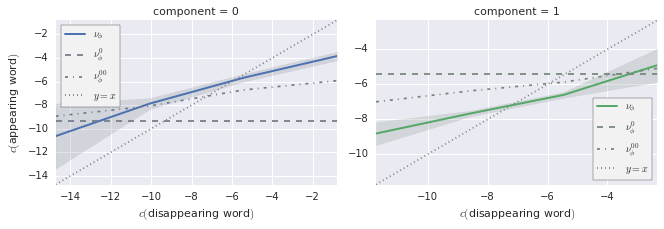

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1002 (cluster-unique) substitutions, but the PCA is in fact computed on 786 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


    * global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 609 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.13458594534634838

intercept                      4.732901
global_aoa                     0.100633
global_clustering              0.068417
global_frequency               0.442892
global_letters_count          -0.032332
global_orthographic_density   -0.000199
global_synonyms_count         -0.078338
dtype: float64

Regressing global frequency with 609 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.170893743423971

intercept                                              13.053435
global_aoa                                             -0.572500
global_clustering                                       2.196326
global_frequency                                        0.034688
global_letters_count                                    0.095987
global_orthographic_density                             2.528096
global_

Regressing rel frequency with 609 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.3165306259587841

intercept                  -1.163446
rel_aoa                     0.095437
rel_clustering              0.180373
rel_frequency               0.654566
rel_letters_count          -0.106076
rel_orthographic_density   -0.184974
rel_synonyms_count         -0.113782
dtype: float64

Regressing rel frequency with 609 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.3413519471665122

intercept                                       -1.196273
rel_aoa                                          0.115264
rel_clustering                                   0.161733
rel_frequency                                    0.687578
rel_letters_count                               -0.107333
rel_orthographic_density                        -0.504287
rel_synonyms_count                              -0.016866
rel_aoa * rel_clustering                        -0.105389
rel_aoa * rel_frequency              

Regressing global aoa with 565 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.19139830506455813

intercept                      5.105384
global_aoa                     0.390833
global_clustering              0.038403
global_frequency              -0.026923
global_letters_count           0.025135
global_orthographic_density   -0.178582
global_synonyms_count          0.057076
dtype: float64

Regressing global aoa with 565 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.2214333087567271

intercept                                              9.298254
global_aoa                                             0.825377
global_clustering                                      0.214761
global_frequency                                       0.069873
global_letters_count                                  -0.849158
global_orthographic_density                           -4.031308
global_synonyms_count                                 -2.072774
global_aoa * global_clustering             

Regressing rel aoa with 565 measures, with interactions
           ^^^^^^^
R^2 = 0.3175760564533403

intercept                                        0.619068
rel_aoa                                          0.473297
rel_clustering                                  -0.112177
rel_frequency                                    0.032841
rel_letters_count                                0.006404
rel_orthographic_density                         0.359374
rel_synonyms_count                               0.293482
rel_aoa * rel_clustering                         0.069385
rel_aoa * rel_frequency                         -0.048337
rel_aoa * rel_letters_count                     -0.049335
rel_aoa * rel_orthographic_density              -0.031068
rel_aoa * rel_synonyms_count                     0.000274
rel_clustering * rel_frequency                   0.003495
rel_clustering * rel_letters_count              -0.039720
rel_clustering * rel_orthographic_density       -0.208399
rel_clustering * rel_synonyms

Regressing global clustering with 510 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.25517745222000443

intercept                                             -4.547827
global_aoa                                             0.392317
global_clustering                                     -0.190823
global_frequency                                      -0.368164
global_letters_count                                   0.088954
global_orthographic_density                            0.329331
global_synonyms_count                                 -1.592748
global_aoa * global_clustering                         0.082869
global_aoa * global_frequency                         -0.004131
global_aoa * global_letters_count                      0.011660
global_aoa * global_orthographic_density               0.017149
global_aoa * global_synonyms_count                     0.018790
global_clustering * global_frequency                  -0.037712
global_clustering * global_letters_count      

Regressing global clustering with 510 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.1881776543945609

intercept                     -1.037244
global_aoa                    -0.043931
global_clustering              0.429133
global_frequency              -0.129101
global_letters_count          -0.076187
global_orthographic_density   -0.107689
global_synonyms_count         -0.049441
rel_aoa                        0.024062
rel_clustering                -0.019453
rel_frequency                  0.083528
rel_letters_count              0.054752
rel_orthographic_density       0.076907
rel_synonyms_count            -0.075732
dtype: float64

Regressing global clustering with 510 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.3551430439079043

intercept                                                 10.141671
global_aoa                                                -0.090860
global_clustering                                          3.483029
global_frequency    

Regressing rel letters_count with 609 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.10287666731398448

intercept                     -0.334681
global_aoa                    -0.046120
global_clustering             -0.153415
global_frequency               0.032783
global_letters_count           0.336031
global_orthographic_density   -0.043435
global_synonyms_count         -0.453793
dtype: float64

Regressing rel letters_count with 609 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.12792986587906563

intercept                                             -4.053557
global_aoa                                             0.514061
global_clustering                                     -1.772502
global_frequency                                       0.380264
global_letters_count                                  -0.510836
global_orthographic_density                           -2.572537
global_synonyms_count                                 -1.924468
global_aoa * g

Regressing global letters_count with 609 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.31665856766364453

intercept                                                -25.162270
global_aoa                                                 3.156662
global_clustering                                         -4.685306
global_frequency                                           1.518827
global_letters_count                                      -1.129975
global_orthographic_density                               -3.804525
global_synonyms_count                                      4.933874
rel_aoa                                                   -5.262951
rel_clustering                                            -0.757940
rel_frequency                                             -0.542928
rel_letters_count                                         -0.021549
rel_orthographic_density                                  -2.689180
rel_synonyms_count                                      

Regressing global synonyms_count with 594 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1243201238076147

intercept                   0.391692
rel_aoa                    -0.006507
rel_clustering              0.008280
rel_frequency              -0.025895
rel_letters_count          -0.025266
rel_orthographic_density    0.014583
rel_synonyms_count          0.330850
dtype: float64

Regressing global synonyms_count with 594 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1506700576385015

intercept                                        0.436817
rel_aoa                                         -0.038782
rel_clustering                                  -0.063988
rel_frequency                                   -0.008560
rel_letters_count                               -0.072376
rel_orthographic_density                         0.010137
rel_synonyms_count                               0.320664
rel_aoa * rel_clustering                         0.006022
rel_a

intercept                      0.996423
global_aoa                    -0.030442
global_clustering              0.123409
global_frequency               0.017873
global_letters_count           0.016830
global_orthographic_density   -0.033831
global_synonyms_count         -0.608601
rel_aoa                        0.010151
rel_clustering                -0.073699
rel_frequency                 -0.031691
rel_letters_count             -0.037166
rel_orthographic_density       0.017756
rel_synonyms_count             1.027281
dtype: float64

Regressing rel synonyms_count with 594 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.39894965916493297

intercept                                                 9.546130
global_aoa                                               -0.070141
global_clustering                                         2.607870
global_frequency                                         -0.396489
global_letters_count                                     -0.073834
globa

Regressing global orthographic_density with 530 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.20635513132280559

intercept                                        1.503145
rel_aoa                                          0.051811
rel_clustering                                   0.075094
rel_frequency                                   -0.046791
rel_letters_count                               -0.002003
rel_orthographic_density                         0.355600
rel_synonyms_count                               0.280923
rel_aoa * rel_clustering                         0.029589
rel_aoa * rel_frequency                          0.011587
rel_aoa * rel_letters_count                     -0.001394
rel_aoa * rel_orthographic_density               0.048067
rel_aoa * rel_synonyms_count                    -0.000378
rel_clustering * rel_frequency                   0.011305
rel_clustering * rel_letters_count              -0.014554
rel_clustering * rel_orthographic_density     

R^2 = 0.41047224253628145

intercept                                                 3.346320
global_aoa                                               -1.287112
global_clustering                                        -0.188827
global_frequency                                          0.022583
global_letters_count                                      0.238350
global_orthographic_density                              -0.472724
global_synonyms_count                                    -2.108467
rel_aoa                                                   0.540334
rel_clustering                                            0.432584
rel_frequency                                            -0.644098
rel_letters_count                                         0.043833
rel_orthographic_density                                 -0.035732
rel_synonyms_count                                        6.664813
global_aoa * global_clustering                           -0.130963
global_aoa * global_frequency      